In [1]:
import numpy as np # to operate on large multidimensional arrays
import pandas as pd #open source data analytics and manipulation tool
import json
import glob # finds pathnames

import matplotlib.pyplot as plt # provides matlab like plotting framework
plt.style.use('ggplot') # create initial plot object

In [2]:
#reading the data
path = 'D:/ITM Sem 2/Data Mining/Project/CORD-19-research-challenge/'
#f' to format the string
#getting metadata path
metadata_path = f'{path}/metadata.csv'
#reading meta data
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})

#displaying first few rows
meta_df.head()

cord_uid                                       sha source_x  \
0  vho70jcx  f056da9c64fbf00a4645ae326e8a4339d015d155  biorxiv   
1  i9tbix2v  daf32e013d325a6feb80e83d15aabc64a48fae33  biorxiv   
2  62gfisc6  f33c6d94b0efaa198f8f3f20e644625fa3fe10d2  biorxiv   
3  058r9486  4da8a87e614373d56070ed272487451266dce919  biorxiv   
4  wich35l7  eccef80cfbe078235df22398f195d5db462d8000  biorxiv   

                                               title             doi pmcid  \
0  SIANN: Strain Identification by Alignment to N...  10.1101/001727   NaN   
1  Spatial epidemiology of networked metapopulati...  10.1101/003889   NaN   
2  Sequencing of the human IG light chain loci fr...  10.1101/006866   NaN   
3  Bayesian mixture analysis for metagenomic comm...  10.1101/007476   NaN   
4  Mapping a viral phylogeny onto outbreak trees ...  10.1101/010389   NaN   

  pubmed_id  license                                           abstract  \
0       NaN  biorxiv  Next-generation sequencing is increasingly bei...   
1       NaN  biorxiv  An emerging disease is one infectious epidemic...   
2       NaN  biorxiv  Germline variation at immunoglobulin gene (IG)...   
3       NaN  biorxiv  Deep sequencing of clinical samples is now an ...   
4       NaN  biorxiv  Developing methods to reconstruct transmission...   

  publish_time                                            authors journal  \
0   2014-01-10  Samuel Minot; Stephen D Turner; Krista L Ternu...     NaN   
1   2014-06-04                                 Lin WANG; Xiang Li     NaN   
2   2014-07-03  Corey T Watson; Karyn Meltz Steinberg; Tina A ...     NaN   
3   2014-07-25                 Sofia Morfopoulou; Vincent Plagnol     NaN   
4   2014-11-11                 Stephen P Velsko; Jonathan E Allen     NaN   

  Microsoft Academic Paper ID WHO #Covidence  has_full_text   full_text_file  \
0                         NaN            NaN           True  biorxiv_medrxiv   
1                         NaN            NaN           True  biorxiv_medrxiv   
2                         NaN            NaN           True  biorxiv_medrxiv   
3                         NaN            NaN           True  biorxiv_medrxiv   
4                         NaN            NaN           True  biorxiv_medrxiv   

                              url  
0  https://doi.org/10.1101/001727  
1  https://doi.org/10.1101/003889  
2  https://doi.org/10.1101/006866  
3  https://doi.org/10.1101/007476  
4  https://doi.org/10.1101/010389

In [3]:
#Displaying summary of the data
meta_df.info()
#We have 45774 entries, and below we can see that we have few missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45774 entries, 0 to 45773
Data columns (total 17 columns):
cord_uid                       45774 non-null object
sha                            31753 non-null object
source_x                       45774 non-null object
title                          45617 non-null object
doi                            42440 non-null object
pmcid                          26243 non-null object
pubmed_id                      34641 non-null object
license                        45774 non-null object
abstract                       37913 non-null object
publish_time                   45765 non-null object
authors                        43774 non-null object
journal                        41707 non-null object
Microsoft Academic Paper ID    964 non-null object
WHO #Covidence                 1768 non-null object
has_full_text                  45774 non-null bool
full_text_file                 35558 non-null object
url                            45472 non-null ob

In [4]:
#Checking null count
meta_df.isnull().sum(axis=0)

cord_uid                           0
sha                            14021
source_x                           0
title                            157
doi                             3334
pmcid                          19531
pubmed_id                      11133
license                            0
abstract                        7861
publish_time                       9
authors                         2000
journal                         4067
Microsoft Academic Paper ID    44810
WHO #Covidence                 44006
has_full_text                      0
full_text_file                 10216
url                              302
dtype: int64

In [5]:
#getting path to all json files
json_files = glob.glob(f'{path}/**/*.json', recursive=True)
len(json_files) # length of all the files, i.e. total number of files found

33375

In [6]:
#Creating file parser class to parse the files, read paper_id and also abstract and body text from the files.
class FileParser:
    def __init__(self, file_path): #initializing the attributes of the class
        with open(file_path) as file:
            content = json.load(file) #loading json file
            self.paper_id = content['paper_id'] # to read the colum_paper_id
            self.abstract = [] # to read read column abstract
            self.body_text = [] # to read column body_text
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text']) # appending abstract text
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])  # appending abstract text
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self): # compute string expression
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
row1 = FileParser(json_files[0])
print(row1)

0015023cc06b5362d332b3baf348d11567ca2fbb: word count: 194 22 Text word count: 5168 23 24 25 author/funder. All rights reserved. No reuse allowed without permission. Abstract 27 The positive stranded RNA genomes of picornaviruses comprise a si... VP3, and VP0 (which is further processed to VP2 and VP4 during virus assembly) (6). The P2 64 and P3 regions encode the non-structural proteins 2B and 2C and 3A, 3B (1-3) (VPg), 3C pro and 4 structura...


In [8]:
#Displaying parsed row
row2 = FileParser(json_files[1])
print(row2)

00340eea543336d54adda18236424de6a5e91c9d: During the past three months, a new coronavirus (SARS-CoV-2) epidemic has been growing exponentially, affecting over 100 thousand people worldwide, and causing enormous distress to economies and socie... In December 2019, a novel coronavirus, SARS-CoV-2, was identified in Wuhan, China, as the etiologic agent of coronavirus disease 2019 , which by March 2020 has already spread across more than 80 count...


In [9]:
#Adding break after every word

def add_breaks(content, length):
    data_a = ""
    words = content.split(' ')
    total_characters = 0

    # add break every length characters
    for i in range(len(words)):
        total_characters += len(words[i])
        if total_characters > length:
            data_a = data_a + "<br>" + words[i]
            total_characters = 0
        else:
            data_a = data_a + " " + words[i]
    return data_a

In [12]:
#string columns in dict variable
dict_array = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for i, entry in enumerate(json_files):
    if i % (len(json_files) // 10) == 0:
        print(f'Processing index number: {i} of {len(json_files)}')
    
    try:
        content = FileParser(entry)
    except Exception as e:
        continue  # invalid format of the paper, skip the step
    
    # getting information of the metadata
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # if no metadata found, skip this paper
    if len(meta_data) == 0:
        continue
    #storing abstract, paper_id and body_text in dict_array
    dict_array['abstract'].append(content.abstract)
    dict_array['paper_id'].append(content.paper_id)
    dict_array['body_text'].append(content.body_text)
    
    # creating a summay column of abstract to be used in the plot
    if len(content.abstract) == 0: 
        # abstract is not provided
        dict_array['abstract_summary'].append("Abstract not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # too long abstract for the plot, take first 100 words
        information = content.abstract.split(' ')[:100]
        summary = add_breaks(' '.join(information), 40)
        dict_array['abstract_summary'].append(summary + "...")
    else:
        # if the abstract is short
        summary = add_breaks(content.abstract, 40)
        dict_array['abstract_summary'].append(summary)
        
    # getting metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author is found for the data
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_array['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_array['authors'].append(". ".join(authors))
    except Exception as e:
        # if there is only one author or there is null value
        dict_array['authors'].append(meta_data['authors'].values[0])
    
    # add the title information and add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_array['title'].append(title)
    # if the title was not given
    except Exception as e:
        dict_array['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_array['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_array['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_array, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index number: 0 of 33375
Processing index number: 3337 of 33375
Processing index number: 6674 of 33375
Processing index number: 10011 of 33375
Processing index number: 13348 of 33375
Processing index number: 16685 of 33375
Processing index number: 20022 of 33375
Processing index number: 23359 of 33375
Processing index number: 26696 of 33375
Processing index number: 30033 of 33375
Processing index number: 33370 of 33375


paper_id                          doi  \
0  0015023cc06b5362d332b3baf348d11567ca2fbb    10.1101/2020.01.10.901801   
1  00340eea543336d54adda18236424de6a5e91c9d  10.1101/2020.03.16.20034470   
2  004f0f8bb66cf446678dc13cf2701feec4f36d76  10.1101/2020.02.11.20022111   
3  00d16927588fb04d4be0e6b269fc02f0d3c2aa7b               10.1101/634600   
4  0139ea4ca580af99b602c6435368e7fdbefacb03    10.1101/2020.03.12.977918   

                                            abstract  \
0  word count: 194 22 Text word count: 5168 23 24...   
1  During the past three months, a new coronaviru...   
2                                                      
3  Infectious bronchitis (IB) causes significant ...   
4  Nipah Virus (NiV) came into limelight recently...   

                                           body_text  \
0  VP3, and VP0 (which is further processed to VP...   
1  In December 2019, a novel coronavirus, SARS-Co...   
2  The 2019-nCoV epidemic has spread across China...   
3  Infectious bronchitis (IB), which is caused by...   
4  Nipah is an infectious negative-sense single-s...   

                                             authors  \
0  Joseph C. Ward; Lidia Lasecka-Dykes; Chris Nei...   
1  Carla Mavian; Simone Marini; Costanza Manes; I...   
2  Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...   
3  Salman L. Butt; Eric C. Erwood; Jian Zhang; Ho...   
4  Nishi Kumari; Ayush Upadhyay; Kishan Kalia; Ra...   

                                               title journal  \
0  The RNA pseudoknots in foot-and-mouth disease ...     NaN   
1  Regaining perspective on SARS-CoV-2 molecular ...     NaN   
2  Healthcare-resource-adjusted vulnerabilities t...     NaN   
3  Real-time, MinION-based, amplicon sequencing f...     NaN   
4  A Combined Evidence Approach to Prioritize Nip...     NaN   

                                    abstract_summary  
0   word count: 194 22 Text word count: 5168 23 2...  
1   During the past three months, a new coronavir...  
2                             ABstract not provided.  
3   Infectious bronchitis (IB) causes<br>signific...  
4   Nipah Virus (NiV) came into limelight recentl...

In [13]:
# abstract word count
#we will use strip() to remove all characters from both left and right based on the argument passed. Here we will remove spaces
#Split will be used to split the words to count number of words
df_covid['wcount_abstract'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))  
# body word count
df_covid['wcount_body'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))  
# unique word count in body
df_covid['wcount_unique']=df_covid['body_text'].apply(lambda x:len(set(str(x).split())))  
df_covid.head()

paper_id                          doi  \
0  0015023cc06b5362d332b3baf348d11567ca2fbb    10.1101/2020.01.10.901801   
1  00340eea543336d54adda18236424de6a5e91c9d  10.1101/2020.03.16.20034470   
2  004f0f8bb66cf446678dc13cf2701feec4f36d76  10.1101/2020.02.11.20022111   
3  00d16927588fb04d4be0e6b269fc02f0d3c2aa7b               10.1101/634600   
4  0139ea4ca580af99b602c6435368e7fdbefacb03    10.1101/2020.03.12.977918   

                                            abstract  \
0  word count: 194 22 Text word count: 5168 23 24...   
1  During the past three months, a new coronaviru...   
2                                                      
3  Infectious bronchitis (IB) causes significant ...   
4  Nipah Virus (NiV) came into limelight recently...   

                                           body_text  \
0  VP3, and VP0 (which is further processed to VP...   
1  In December 2019, a novel coronavirus, SARS-Co...   
2  The 2019-nCoV epidemic has spread across China...   
3  Infectious bronchitis (IB), which is caused by...   
4  Nipah is an infectious negative-sense single-s...   

                                             authors  \
0  Joseph C. Ward; Lidia Lasecka-Dykes; Chris Nei...   
1  Carla Mavian; Simone Marini; Costanza Manes; I...   
2  Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...   
3  Salman L. Butt; Eric C. Erwood; Jian Zhang; Ho...   
4  Nishi Kumari; Ayush Upadhyay; Kishan Kalia; Ra...   

                                               title journal  \
0  The RNA pseudoknots in foot-and-mouth disease ...     NaN   
1  Regaining perspective on SARS-CoV-2 molecular ...     NaN   
2  Healthcare-resource-adjusted vulnerabilities t...     NaN   
3  Real-time, MinION-based, amplicon sequencing f...     NaN   
4  A Combined Evidence Approach to Prioritize Nip...     NaN   

                                    abstract_summary  wcount_abstract  \
0   word count: 194 22 Text word count: 5168 23 2...              241   
1   During the past three months, a new coronavir...              175   
2                             ABstract not provided.                0   
3   Infectious bronchitis (IB) causes<br>signific...             1647   
4   Nipah Virus (NiV) came into limelight recentl...              326   

   wcount_body  wcount_unique  
0         1728            705  
1         2549           1072  
2          755            377  
3         4003           1185  
4         2399           1026

In [14]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30197 entries, 0 to 30196
Data columns (total 11 columns):
paper_id            30197 non-null object
doi                 29891 non-null object
abstract            30197 non-null object
body_text           30197 non-null object
authors             29646 non-null object
title               30162 non-null object
journal             29077 non-null object
abstract_summary    30197 non-null object
wcount_abstract     30197 non-null int64
wcount_body         30197 non-null int64
wcount_unique       30197 non-null int64
dtypes: int64(3), object(8)
memory usage: 2.5+ MB


In [15]:
df_covid['abstract'].describe(include='all')

count     30197
unique    22480
top            
freq       7684
Name: abstract, dtype: object

In [16]:
# removing duplicate values by usung drop_duplicates
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count     30184
unique    22480
top            
freq       7677
Name: abstract, dtype: object

In [17]:
df_covid['body_text'].describe(include='all')

count                                                 30184
unique                                                30183
top       In a global world, knowledge of imported infec...
freq                                                      2
Name: body_text, dtype: object

In [18]:
df_covid.head()

paper_id                          doi  \
0  0015023cc06b5362d332b3baf348d11567ca2fbb    10.1101/2020.01.10.901801   
1  00340eea543336d54adda18236424de6a5e91c9d  10.1101/2020.03.16.20034470   
2  004f0f8bb66cf446678dc13cf2701feec4f36d76  10.1101/2020.02.11.20022111   
3  00d16927588fb04d4be0e6b269fc02f0d3c2aa7b               10.1101/634600   
4  0139ea4ca580af99b602c6435368e7fdbefacb03    10.1101/2020.03.12.977918   

                                            abstract  \
0  word count: 194 22 Text word count: 5168 23 24...   
1  During the past three months, a new coronaviru...   
2                                                      
3  Infectious bronchitis (IB) causes significant ...   
4  Nipah Virus (NiV) came into limelight recently...   

                                           body_text  \
0  VP3, and VP0 (which is further processed to VP...   
1  In December 2019, a novel coronavirus, SARS-Co...   
2  The 2019-nCoV epidemic has spread across China...   
3  Infectious bronchitis (IB), which is caused by...   
4  Nipah is an infectious negative-sense single-s...   

                                             authors  \
0  Joseph C. Ward; Lidia Lasecka-Dykes; Chris Nei...   
1  Carla Mavian; Simone Marini; Costanza Manes; I...   
2  Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...   
3  Salman L. Butt; Eric C. Erwood; Jian Zhang; Ho...   
4  Nishi Kumari; Ayush Upadhyay; Kishan Kalia; Ra...   

                                               title journal  \
0  The RNA pseudoknots in foot-and-mouth disease ...     NaN   
1  Regaining perspective on SARS-CoV-2 molecular ...     NaN   
2  Healthcare-resource-adjusted vulnerabilities t...     NaN   
3  Real-time, MinION-based, amplicon sequencing f...     NaN   
4  A Combined Evidence Approach to Prioritize Nip...     NaN   

                                    abstract_summary  wcount_abstract  \
0   word count: 194 22 Text word count: 5168 23 2...              241   
1   During the past three months, a new coronavir...              175   
2                             ABstract not provided.                0   
3   Infectious bronchitis (IB) causes<br>signific...             1647   
4   Nipah Virus (NiV) came into limelight recentl...              326   

   wcount_body  wcount_unique  
0         1728            705  
1         2549           1072  
2          755            377  
3         4003           1185  
4         2399           1026

In [19]:
#We will work with body text
df_covid.describe()

wcount_abstract    wcount_body  wcount_unique
count     30184.000000   30184.000000   30184.000000
mean        167.169328    4820.864034    1447.541512
std         174.530817    7202.601394    1197.145123
min           0.000000       1.000000       1.000000
25%           0.000000    2489.000000     931.000000
50%         165.000000    3740.000000    1259.000000
75%         240.000000    5503.000000    1685.000000
max        5118.000000  260378.000000   38298.000000

In [20]:
#Renaming data frame for understanding purposes
df = df_covid
#Deleting df_covid data frame
del df_covid

In [21]:
#Removing null values
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28314 entries, 1053 to 30196
Data columns (total 11 columns):
paper_id            28314 non-null object
doi                 28314 non-null object
abstract            28314 non-null object
body_text           28314 non-null object
authors             28314 non-null object
title               28314 non-null object
journal             28314 non-null object
abstract_summary    28314 non-null object
wcount_abstract     28314 non-null int64
wcount_body         28314 non-null int64
wcount_unique       28314 non-null int64
dtypes: int64(3), object(8)
memory usage: 2.6+ MB


In [23]:
#For language detection we will use langdetect module
#conda install -c conda-forge langdetect

In [24]:
#In order to handle multiple languages
from tqdm import tqdm # To show progress bar
from langdetect import detect # to hande multiple different languages
from langdetect import DetectorFactory 

In [25]:
# setting seed
DetectorFactory.seed = 0

# holding language lables in the belo array
languages = []


In [26]:
# going through each and every text
for i in tqdm(range(0,len(df))):
    # splitting by space and take the first x index and join it with space
    text_a = df.iloc[i]['body_text'].split(" ")
    
    lang = "en" #En is the code for english
    try:
        if len(text_a) > 50:
            lang = detect(" ".join(text_a[:50]))
        elif len(text_a) > 0:
            lang = detect(" ".join(text_a[:len(text_a)]))
    
    except Exception as e:
        every_word = set(text_a)
        try:
            lang = detect(" ".join(every_word))
        
        except Exception as e:
            
            try:
                lang = detect(df.iloc[i]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|███████████████████████████████████████████████████████████████████████████| 28314/28314 [01:55<00:00, 244.90it/s]


In [28]:
#Printing python data structures by pretty print module
from pprint import pprint

#Langage disctionary to store different language codes
lang_dictionary = {}
for lang in set(languages):
    lang_dictionary[lang] = languages.count(lang)
    
print("Total count: {}\n".format(len(languages)))
#Printing dictionary of words
pprint(lang_dictionary)

Total count: 28314

{'af': 1,
 'ca': 1,
 'cy': 1,
 'de': 48,
 'en': 27679,
 'es': 257,
 'fr': 297,
 'it': 13,
 'pl': 2,
 'pt': 14,
 'zh-cn': 1}


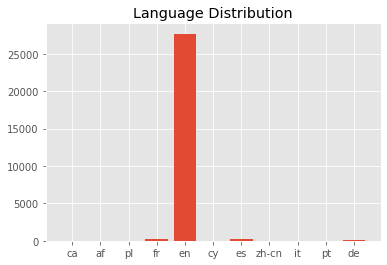

In [29]:
#Plotting different languages in a bar graph
#Using matplotlib
df['language'] = languages
plt.bar(range(len(lang_dictionary)), list(lang_dictionary.values()), align='center')
plt.xticks(range(len(lang_dictionary)), list(lang_dictionary.keys()))
plt.title("Language Distribution")
plt.show()

In [30]:
#We will use English language as we can see the majority
#We will drop all other languages
df = df[df['language'] == 'en'] 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27679 entries, 1053 to 30196
Data columns (total 12 columns):
paper_id            27679 non-null object
doi                 27679 non-null object
abstract            27679 non-null object
body_text           27679 non-null object
authors             27679 non-null object
title               27679 non-null object
journal             27679 non-null object
abstract_summary    27679 non-null object
wcount_abstract     27679 non-null int64
wcount_body         27679 non-null int64
wcount_unique       27679 non-null int64
language            27679 non-null object
dtypes: int64(3), object(9)
memory usage: 2.7+ MB


In [32]:
#conda install -c conda-forge spacy
#Importing spacy for natural language processing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

In [33]:
#We will remove the stopwords
import string # to get punctuations in the string

punctuations = string.punctuation
stop_words = list(STOP_WORDS)
stop_words[:10]

['anyhow',
 'meanwhile',
 'take',
 'say',
 "n't",
 'front',
 'do',
 'since',
 'anywhere',
 'often']

In [35]:
#Appending custom stop words to original spacy stop words
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for words_custom in custom_stop_words:
    if words_custom not in stop_words:
        stop_words.append(words_custom)

In [48]:
#Function to remove stopwords, punctuations, also convert text to lower case
parser = en_core_sci_lg.load(disable=["tagger", "ner"]) # creating a doc by disabling tagger nad
parser.max_length = 7000000

def spacy_tokenizer(sentences):
    my_tokens = parser(sentences)
    #lemma for dictionay form
    my_tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in my_tokens ] 
    my_tokens = [ word for word in my_tokens if word not in stop_words and word not in punctuations ]
    my_tokens = " ".join([i for i in my_tokens])
    return my_tokens

In [49]:
tqdm.pandas() # to show the progress
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)







  0%|                                                                                        | 0/27679 [00:00<?, ?it/s]





  0%|                                                                              | 2/27679 [00:00<1:25:29,  5.40it/s]





  0%|                                                                              | 3/27679 [00:00<2:11:09,  3.52it/s]





  0%|                                                                              | 4/27679 [00:01<2:16:47,  3.37it/s]





  0%|                                                                              | 5/27679 [00:01<2:44:46,  2.80it/s]





  0%|                                                                              | 6/27679 [00:01<2:27:53,  3.12it/s]





  0%|                                                                              | 7/27679 [00:02<2:16:31,  3.38it/s]





  0%|                                                                              | 8/27679 [00:02<2:49:23,  2.72it/s]

  0%|▎                                                                           | 135/27679 [00:42<2:48:19,  2.73it/s]





  0%|▎                                                                           | 136/27679 [00:43<3:05:41,  2.47it/s]





  0%|▍                                                                           | 137/27679 [00:43<2:37:36,  2.91it/s]





  1%|▍                                                                           | 139/27679 [00:43<2:22:51,  3.21it/s]





  1%|▍                                                                           | 140/27679 [00:44<2:25:44,  3.15it/s]





  1%|▍                                                                           | 141/27679 [00:44<2:06:51,  3.62it/s]





  1%|▍                                                                           | 142/27679 [00:44<2:07:59,  3.59it/s]





  1%|▍                                                                           | 143/27679 [00:44<2:04:10,  3.70it/s]







  1%|▋                                                                           | 268/27679 [01:21<2:19:58,  3.26it/s]





  1%|▋                                                                           | 269/27679 [01:22<2:35:24,  2.94it/s]





  1%|▋                                                                           | 270/27679 [01:22<2:37:25,  2.90it/s]





  1%|▋                                                                           | 271/27679 [01:22<2:21:45,  3.22it/s]





  1%|▋                                                                           | 272/27679 [01:23<2:14:23,  3.40it/s]





  1%|▋                                                                           | 273/27679 [01:23<2:02:54,  3.72it/s]





  1%|▊                                                                           | 274/27679 [01:23<1:59:16,  3.83it/s]





  1%|▊                                                                           | 275/27679 [01:24<2:12:35,  3.44it/s]







  1%|█                                                                           | 404/27679 [02:03<2:18:27,  3.28it/s]





  1%|█                                                                           | 405/27679 [02:03<1:51:39,  4.07it/s]





  1%|█                                                                           | 406/27679 [02:03<1:50:59,  4.10it/s]





  1%|█                                                                           | 407/27679 [02:04<2:46:40,  2.73it/s]





  1%|█                                                                           | 408/27679 [02:05<4:13:05,  1.80it/s]





  1%|█                                                                           | 409/27679 [02:05<3:25:56,  2.21it/s]





  1%|█▏                                                                          | 410/27679 [02:05<2:49:33,  2.68it/s]





  1%|█▏                                                                          | 411/27679 [02:05<2:34:02,  2.95it/s]







  2%|█▍                                                                          | 537/27679 [02:48<2:07:42,  3.54it/s]





  2%|█▍                                                                          | 538/27679 [02:48<1:48:02,  4.19it/s]





  2%|█▍                                                                          | 539/27679 [02:48<2:12:46,  3.41it/s]





  2%|█▍                                                                          | 541/27679 [02:49<1:55:39,  3.91it/s]





  2%|█▍                                                                          | 542/27679 [02:49<2:15:49,  3.33it/s]





  2%|█▍                                                                          | 543/27679 [02:49<2:15:11,  3.35it/s]





  2%|█▍                                                                          | 544/27679 [02:50<2:16:33,  3.31it/s]





  2%|█▍                                                                          | 545/27679 [02:50<2:13:24,  3.39it/s]







  2%|█▊                                                                          | 675/27679 [03:28<2:04:48,  3.61it/s]





  2%|█▊                                                                          | 676/27679 [03:28<1:49:43,  4.10it/s]





  2%|█▊                                                                          | 677/27679 [03:28<1:44:17,  4.32it/s]





  2%|█▊                                                                          | 678/27679 [03:29<2:06:00,  3.57it/s]





  2%|█▊                                                                          | 679/27679 [03:29<2:01:41,  3.70it/s]





  2%|█▊                                                                          | 680/27679 [03:29<2:10:45,  3.44it/s]





  2%|█▊                                                                          | 681/27679 [03:30<2:35:29,  2.89it/s]





  2%|█▊                                                                          | 682/27679 [03:30<2:44:17,  2.74it/s]







  3%|██▏                                                                         | 808/27679 [04:09<2:14:27,  3.33it/s]





  3%|██▏                                                                         | 809/27679 [04:09<2:23:44,  3.12it/s]





  3%|██▏                                                                         | 810/27679 [04:10<2:35:52,  2.87it/s]





  3%|██▏                                                                         | 811/27679 [04:10<2:56:44,  2.53it/s]





  3%|██▏                                                                         | 812/27679 [04:11<2:52:16,  2.60it/s]





  3%|██▏                                                                         | 813/27679 [04:11<2:45:08,  2.71it/s]





  3%|██▏                                                                         | 814/27679 [04:11<2:33:03,  2.93it/s]





  3%|██▏                                                                         | 815/27679 [04:12<2:23:39,  3.12it/s]







  3%|██▌                                                                         | 942/27679 [04:51<1:45:44,  4.21it/s]





  3%|██▌                                                                         | 943/27679 [04:52<2:31:01,  2.95it/s]





  3%|██▌                                                                         | 944/27679 [04:52<2:30:03,  2.97it/s]





  3%|██▌                                                                         | 945/27679 [04:52<2:40:06,  2.78it/s]





  3%|██▌                                                                         | 946/27679 [04:53<2:27:14,  3.03it/s]





  3%|██▌                                                                         | 947/27679 [04:53<2:20:17,  3.18it/s]





  3%|██▌                                                                         | 948/27679 [04:53<2:09:11,  3.45it/s]





  3%|██▌                                                                         | 950/27679 [04:54<1:59:47,  3.72it/s]







  4%|██▉                                                                        | 1076/27679 [05:36<1:45:39,  4.20it/s]





  4%|██▉                                                                        | 1077/27679 [05:37<2:25:37,  3.04it/s]





  4%|██▉                                                                        | 1078/27679 [05:37<2:29:07,  2.97it/s]





  4%|██▉                                                                        | 1079/27679 [05:38<2:34:57,  2.86it/s]





  4%|██▉                                                                        | 1080/27679 [05:38<2:27:58,  3.00it/s]





  4%|██▉                                                                        | 1081/27679 [05:38<2:15:11,  3.28it/s]





  4%|██▉                                                                        | 1082/27679 [05:38<2:02:30,  3.62it/s]





  4%|██▉                                                                        | 1083/27679 [05:39<2:12:34,  3.34it/s]







  4%|███▎                                                                       | 1211/27679 [06:21<2:13:59,  3.29it/s]





  4%|███▎                                                                       | 1212/27679 [06:21<2:13:13,  3.31it/s]





  4%|███▎                                                                       | 1213/27679 [06:21<2:04:42,  3.54it/s]





  4%|███▎                                                                       | 1214/27679 [06:22<2:07:02,  3.47it/s]





  4%|███▎                                                                       | 1215/27679 [06:22<2:10:22,  3.38it/s]





  4%|███▎                                                                       | 1216/27679 [06:22<2:40:31,  2.75it/s]





  4%|███▎                                                                       | 1217/27679 [06:23<2:19:32,  3.16it/s]





  4%|███▎                                                                       | 1218/27679 [06:23<2:21:19,  3.12it/s]







  5%|███▋                                                                       | 1347/27679 [07:01<3:06:18,  2.36it/s]





  5%|███▋                                                                       | 1348/27679 [07:01<2:43:01,  2.69it/s]





  5%|███▋                                                                       | 1349/27679 [07:01<2:48:05,  2.61it/s]





  5%|███▋                                                                       | 1350/27679 [07:01<2:14:36,  3.26it/s]





  5%|███▋                                                                       | 1351/27679 [07:02<2:30:09,  2.92it/s]





  5%|███▋                                                                       | 1352/27679 [07:02<2:18:50,  3.16it/s]





  5%|███▋                                                                       | 1354/27679 [07:02<2:02:29,  3.58it/s]





  5%|███▋                                                                       | 1355/27679 [07:03<1:51:53,  3.92it/s]







  5%|████                                                                       | 1485/27679 [07:43<1:58:42,  3.68it/s]





  5%|████                                                                       | 1486/27679 [07:43<1:54:48,  3.80it/s]





  5%|████                                                                       | 1487/27679 [07:44<2:19:56,  3.12it/s]





  5%|████                                                                       | 1489/27679 [07:44<2:05:00,  3.49it/s]





  5%|████                                                                       | 1490/27679 [07:45<3:45:21,  1.94it/s]





  5%|████                                                                       | 1491/27679 [07:45<3:21:59,  2.16it/s]





  5%|████                                                                       | 1492/27679 [07:46<3:01:11,  2.41it/s]





  5%|████                                                                       | 1493/27679 [07:46<3:02:21,  2.39it/s]







  6%|████▍                                                                      | 1619/27679 [08:25<2:27:45,  2.94it/s]





  6%|████▍                                                                      | 1620/27679 [08:26<2:16:38,  3.18it/s]





  6%|████▍                                                                      | 1621/27679 [08:26<2:45:49,  2.62it/s]





  6%|████▍                                                                      | 1622/27679 [08:26<2:26:43,  2.96it/s]





  6%|████▍                                                                      | 1623/27679 [08:27<3:09:07,  2.30it/s]





  6%|████▍                                                                      | 1624/27679 [08:28<3:22:28,  2.14it/s]





  6%|████▍                                                                      | 1625/27679 [08:28<2:57:49,  2.44it/s]





  6%|████▍                                                                      | 1626/27679 [08:28<2:56:14,  2.46it/s]







  6%|████▊                                                                      | 1755/27679 [09:06<2:10:25,  3.31it/s]





  6%|████▊                                                                      | 1756/27679 [09:07<2:03:26,  3.50it/s]





  6%|████▊                                                                      | 1757/27679 [09:07<1:47:03,  4.04it/s]





  6%|████▊                                                                      | 1758/27679 [09:07<2:23:54,  3.00it/s]





  6%|████▊                                                                      | 1759/27679 [09:08<2:26:00,  2.96it/s]





  6%|████▊                                                                      | 1760/27679 [09:08<2:30:13,  2.88it/s]





  6%|████▊                                                                      | 1761/27679 [09:08<2:26:13,  2.95it/s]





  6%|████▊                                                                      | 1762/27679 [09:09<2:17:21,  3.14it/s]







  7%|█████                                                                      | 1888/27679 [09:46<2:18:15,  3.11it/s]





  7%|█████                                                                      | 1889/27679 [09:47<2:34:22,  2.78it/s]





  7%|█████                                                                      | 1890/27679 [09:47<2:12:00,  3.26it/s]





  7%|█████                                                                      | 1891/27679 [09:48<2:20:50,  3.05it/s]





  7%|█████▏                                                                     | 1892/27679 [09:48<2:19:40,  3.08it/s]





  7%|█████▏                                                                     | 1893/27679 [09:48<2:12:35,  3.24it/s]





  7%|█████▏                                                                     | 1894/27679 [09:48<2:02:13,  3.52it/s]





  7%|█████▏                                                                     | 1895/27679 [09:49<1:59:02,  3.61it/s]







  7%|█████▍                                                                     | 2023/27679 [10:25<1:39:19,  4.31it/s]





  7%|█████▍                                                                     | 2024/27679 [10:26<2:04:44,  3.43it/s]





  7%|█████▍                                                                     | 2025/27679 [10:26<1:59:26,  3.58it/s]





  7%|█████▍                                                                     | 2026/27679 [10:27<2:31:26,  2.82it/s]





  7%|█████▍                                                                     | 2028/27679 [10:27<2:05:27,  3.41it/s]





  7%|█████▍                                                                     | 2029/27679 [10:27<2:12:19,  3.23it/s]





  7%|█████▌                                                                     | 2030/27679 [10:27<1:57:08,  3.65it/s]





  7%|█████▌                                                                     | 2031/27679 [10:28<2:41:13,  2.65it/s]







  8%|█████▊                                                                     | 2157/27679 [11:10<2:50:03,  2.50it/s]





  8%|█████▊                                                                     | 2158/27679 [11:10<3:23:35,  2.09it/s]





  8%|█████▊                                                                     | 2160/27679 [11:11<2:44:10,  2.59it/s]





  8%|█████▊                                                                     | 2161/27679 [11:11<2:21:16,  3.01it/s]





  8%|█████▊                                                                     | 2162/27679 [11:11<2:25:17,  2.93it/s]





  8%|█████▊                                                                     | 2163/27679 [11:12<2:24:01,  2.95it/s]





  8%|█████▊                                                                     | 2164/27679 [11:12<2:01:32,  3.50it/s]





  8%|█████▊                                                                     | 2165/27679 [11:12<2:17:36,  3.09it/s]







  8%|██████▏                                                                    | 2293/27679 [11:51<2:43:40,  2.58it/s]





  8%|██████▏                                                                    | 2294/27679 [11:51<2:22:20,  2.97it/s]





  8%|██████▏                                                                    | 2295/27679 [11:51<2:21:32,  2.99it/s]





  8%|██████▏                                                                    | 2296/27679 [11:51<2:28:49,  2.84it/s]





  8%|██████▏                                                                    | 2297/27679 [11:52<2:56:02,  2.40it/s]





  8%|██████▏                                                                    | 2298/27679 [11:52<2:18:43,  3.05it/s]





  8%|██████▏                                                                    | 2299/27679 [11:52<1:58:50,  3.56it/s]





  8%|██████▏                                                                    | 2300/27679 [11:53<2:25:13,  2.91it/s]







  9%|██████▌                                                                    | 2426/27679 [12:31<2:28:48,  2.83it/s]





  9%|██████▌                                                                    | 2427/27679 [12:31<2:01:17,  3.47it/s]





  9%|██████▌                                                                    | 2428/27679 [12:31<1:51:46,  3.77it/s]





  9%|██████▌                                                                    | 2429/27679 [12:31<2:05:27,  3.35it/s]





  9%|██████▌                                                                    | 2430/27679 [12:32<2:10:17,  3.23it/s]





  9%|██████▌                                                                    | 2431/27679 [12:32<2:05:14,  3.36it/s]





  9%|██████▌                                                                    | 2432/27679 [12:32<1:55:35,  3.64it/s]





  9%|██████▌                                                                    | 2433/27679 [12:32<1:37:21,  4.32it/s]







  9%|██████▉                                                                    | 2559/27679 [13:11<2:11:47,  3.18it/s]





  9%|██████▉                                                                    | 2560/27679 [13:11<2:03:53,  3.38it/s]





  9%|██████▉                                                                    | 2561/27679 [13:12<1:59:32,  3.50it/s]





  9%|██████▉                                                                    | 2562/27679 [13:12<1:41:40,  4.12it/s]





  9%|██████▉                                                                    | 2563/27679 [13:12<1:48:44,  3.85it/s]





  9%|██████▉                                                                    | 2564/27679 [13:12<1:51:19,  3.76it/s]





  9%|██████▉                                                                    | 2565/27679 [13:12<1:48:59,  3.84it/s]





  9%|██████▉                                                                    | 2566/27679 [13:13<1:37:46,  4.28it/s]







 10%|███████▎                                                                   | 2694/27679 [13:51<1:57:42,  3.54it/s]





 10%|███████▎                                                                   | 2695/27679 [13:52<2:07:25,  3.27it/s]





 10%|███████▎                                                                   | 2696/27679 [13:52<2:13:49,  3.11it/s]





 10%|███████▎                                                                   | 2697/27679 [13:53<2:53:03,  2.41it/s]





 10%|███████▎                                                                   | 2698/27679 [13:53<2:37:43,  2.64it/s]





 10%|███████▎                                                                   | 2699/27679 [13:53<2:32:37,  2.73it/s]





 10%|███████▎                                                                   | 2700/27679 [13:53<2:09:50,  3.21it/s]





 10%|███████▎                                                                   | 2701/27679 [13:54<2:32:14,  2.73it/s]







 10%|███████▋                                                                   | 2826/27679 [14:34<3:09:09,  2.19it/s]





 10%|███████▋                                                                   | 2827/27679 [14:34<3:00:55,  2.29it/s]





 10%|███████▋                                                                   | 2828/27679 [14:34<2:24:20,  2.87it/s]





 10%|███████▋                                                                   | 2829/27679 [14:34<2:01:57,  3.40it/s]





 10%|███████▋                                                                   | 2831/27679 [14:35<1:44:53,  3.95it/s]





 10%|███████▋                                                                   | 2832/27679 [14:35<1:54:05,  3.63it/s]





 10%|███████▋                                                                   | 2833/27679 [14:35<1:36:30,  4.29it/s]





 10%|███████▋                                                                   | 2834/27679 [14:35<1:22:02,  5.05it/s]







 11%|████████                                                                   | 2962/27679 [15:19<2:20:17,  2.94it/s]





 11%|████████                                                                   | 2963/27679 [15:20<2:02:55,  3.35it/s]





 11%|████████                                                                   | 2964/27679 [15:20<2:27:46,  2.79it/s]





 11%|████████                                                                   | 2965/27679 [15:20<1:59:02,  3.46it/s]





 11%|████████                                                                   | 2966/27679 [15:20<1:39:10,  4.15it/s]





 11%|████████                                                                   | 2967/27679 [15:21<1:51:50,  3.68it/s]





 11%|████████                                                                   | 2968/27679 [15:21<1:54:52,  3.59it/s]





 11%|████████                                                                   | 2969/27679 [15:21<1:53:41,  3.62it/s]







 11%|████████▍                                                                  | 3097/27679 [16:02<2:18:19,  2.96it/s]





 11%|████████▍                                                                  | 3098/27679 [16:02<2:13:32,  3.07it/s]





 11%|████████▍                                                                  | 3099/27679 [16:03<2:27:49,  2.77it/s]





 11%|████████▍                                                                  | 3100/27679 [16:03<2:11:53,  3.11it/s]





 11%|████████▍                                                                  | 3101/27679 [16:03<2:28:35,  2.76it/s]





 11%|████████▍                                                                  | 3102/27679 [16:03<2:08:55,  3.18it/s]





 11%|████████▍                                                                  | 3103/27679 [16:04<1:50:14,  3.72it/s]





 11%|████████▍                                                                  | 3104/27679 [16:04<2:19:50,  2.93it/s]







 12%|████████▊                                                                  | 3231/27679 [16:45<2:18:17,  2.95it/s]





 12%|████████▊                                                                  | 3232/27679 [16:45<2:01:58,  3.34it/s]





 12%|████████▊                                                                  | 3233/27679 [16:46<2:55:59,  2.31it/s]





 12%|████████▊                                                                  | 3234/27679 [16:46<2:29:07,  2.73it/s]





 12%|████████▊                                                                  | 3235/27679 [16:46<2:13:01,  3.06it/s]





 12%|████████▊                                                                  | 3236/27679 [16:47<2:28:30,  2.74it/s]





 12%|████████▊                                                                  | 3237/27679 [16:47<2:22:59,  2.85it/s]





 12%|████████▊                                                                  | 3238/27679 [16:47<2:15:16,  3.01it/s]







 12%|█████████                                                                  | 3363/27679 [17:26<1:51:08,  3.65it/s]





 12%|█████████                                                                  | 3364/27679 [17:26<1:44:05,  3.89it/s]





 12%|█████████                                                                  | 3365/27679 [17:26<1:33:55,  4.31it/s]





 12%|█████████                                                                  | 3366/27679 [17:27<1:55:02,  3.52it/s]





 12%|█████████                                                                  | 3367/27679 [17:27<2:09:00,  3.14it/s]





 12%|█████████▏                                                                 | 3368/27679 [17:27<1:56:49,  3.47it/s]





 12%|█████████▏                                                                 | 3369/27679 [17:28<2:23:52,  2.82it/s]





 12%|█████████▏                                                                 | 3370/27679 [17:28<2:33:57,  2.63it/s]







 13%|█████████▍                                                                 | 3500/27679 [18:07<1:53:41,  3.54it/s]





 13%|█████████▍                                                                 | 3501/27679 [18:07<2:11:51,  3.06it/s]





 13%|█████████▍                                                                 | 3502/27679 [18:07<2:06:03,  3.20it/s]





 13%|█████████▍                                                                 | 3503/27679 [18:08<2:14:03,  3.01it/s]





 13%|█████████▍                                                                 | 3504/27679 [18:08<2:04:12,  3.24it/s]





 13%|█████████▍                                                                 | 3505/27679 [18:08<2:02:52,  3.28it/s]





 13%|█████████▍                                                                 | 3506/27679 [18:09<2:05:33,  3.21it/s]





 13%|█████████▌                                                                 | 3507/27679 [18:09<2:08:15,  3.14it/s]







 13%|█████████▊                                                                 | 3638/27679 [18:52<2:51:07,  2.34it/s]





 13%|█████████▊                                                                 | 3639/27679 [18:52<2:39:13,  2.52it/s]





 13%|█████████▊                                                                 | 3640/27679 [18:53<2:38:42,  2.52it/s]





 13%|█████████▊                                                                 | 3641/27679 [18:53<2:13:57,  2.99it/s]





 13%|█████████▊                                                                 | 3642/27679 [18:53<2:05:48,  3.18it/s]





 13%|█████████▊                                                                 | 3643/27679 [18:53<2:14:18,  2.98it/s]





 13%|█████████▊                                                                 | 3644/27679 [18:54<2:25:31,  2.75it/s]





 13%|█████████▉                                                                 | 3645/27679 [18:54<2:47:29,  2.39it/s]







 14%|██████████▏                                                                | 3773/27679 [19:34<2:03:50,  3.22it/s]





 14%|██████████▏                                                                | 3774/27679 [19:34<1:58:59,  3.35it/s]





 14%|██████████▏                                                                | 3775/27679 [19:34<1:57:10,  3.40it/s]





 14%|██████████▏                                                                | 3776/27679 [19:35<2:00:03,  3.32it/s]





 14%|██████████▏                                                                | 3777/27679 [19:35<1:48:34,  3.67it/s]





 14%|██████████▏                                                                | 3778/27679 [19:35<1:52:32,  3.54it/s]





 14%|██████████▏                                                                | 3779/27679 [19:36<1:57:34,  3.39it/s]





 14%|██████████▏                                                                | 3780/27679 [19:36<2:09:33,  3.07it/s]







 14%|██████████▌                                                                | 3909/27679 [20:15<2:33:35,  2.58it/s]





 14%|██████████▌                                                                | 3910/27679 [20:15<2:23:11,  2.77it/s]





 14%|██████████▌                                                                | 3911/27679 [20:16<2:23:36,  2.76it/s]





 14%|██████████▌                                                                | 3912/27679 [20:16<2:13:11,  2.97it/s]





 14%|██████████▌                                                                | 3914/27679 [20:17<2:07:48,  3.10it/s]





 14%|██████████▌                                                                | 3915/27679 [20:17<2:00:26,  3.29it/s]





 14%|██████████▌                                                                | 3916/27679 [20:17<1:55:19,  3.43it/s]





 14%|██████████▌                                                                | 3917/27679 [20:17<1:46:18,  3.73it/s]







 15%|██████████▉                                                                | 4051/27679 [21:00<1:50:21,  3.57it/s]





 15%|██████████▉                                                                | 4052/27679 [21:01<2:15:21,  2.91it/s]





 15%|██████████▉                                                                | 4053/27679 [21:01<2:13:14,  2.96it/s]





 15%|██████████▉                                                                | 4054/27679 [21:02<2:16:37,  2.88it/s]





 15%|██████████▉                                                                | 4055/27679 [21:02<1:56:15,  3.39it/s]





 15%|██████████▉                                                                | 4056/27679 [21:02<1:58:32,  3.32it/s]





 15%|██████████▉                                                                | 4057/27679 [21:03<2:25:24,  2.71it/s]





 15%|██████████▉                                                                | 4058/27679 [21:03<2:40:56,  2.45it/s]







 15%|███████████▎                                                               | 4185/27679 [21:39<1:50:46,  3.53it/s]





 15%|███████████▎                                                               | 4186/27679 [21:39<1:36:28,  4.06it/s]





 15%|███████████▎                                                               | 4187/27679 [21:39<1:38:56,  3.96it/s]





 15%|███████████▎                                                               | 4188/27679 [21:40<1:31:02,  4.30it/s]





 15%|███████████▎                                                               | 4189/27679 [21:40<1:32:24,  4.24it/s]





 15%|███████████▎                                                               | 4190/27679 [21:40<1:35:28,  4.10it/s]





 15%|███████████▎                                                               | 4191/27679 [21:40<1:52:54,  3.47it/s]





 15%|███████████▎                                                               | 4192/27679 [21:41<2:13:26,  2.93it/s]







 16%|███████████▋                                                               | 4320/27679 [22:19<1:59:12,  3.27it/s]





 16%|███████████▋                                                               | 4321/27679 [22:20<2:00:18,  3.24it/s]





 16%|███████████▋                                                               | 4322/27679 [22:20<1:55:45,  3.36it/s]





 16%|███████████▋                                                               | 4323/27679 [22:20<2:00:04,  3.24it/s]





 16%|███████████▋                                                               | 4324/27679 [22:20<1:37:54,  3.98it/s]





 16%|███████████▋                                                               | 4325/27679 [22:21<2:08:32,  3.03it/s]





 16%|███████████▋                                                               | 4326/27679 [22:21<2:39:19,  2.44it/s]





 16%|███████████▋                                                               | 4327/27679 [22:22<2:19:41,  2.79it/s]







 16%|████████████                                                               | 4457/27679 [23:01<1:31:45,  4.22it/s]





 16%|████████████                                                               | 4459/27679 [23:02<1:38:24,  3.93it/s]





 16%|████████████                                                               | 4460/27679 [23:02<1:48:58,  3.55it/s]





 16%|████████████                                                               | 4461/27679 [23:03<2:50:17,  2.27it/s]





 16%|████████████                                                               | 4462/27679 [23:04<2:45:02,  2.34it/s]





 16%|████████████                                                               | 4463/27679 [23:04<2:23:14,  2.70it/s]





 16%|████████████                                                               | 4464/27679 [23:04<2:06:26,  3.06it/s]





 16%|████████████                                                               | 4465/27679 [23:04<2:22:56,  2.71it/s]







 17%|████████████▍                                                              | 4592/27679 [23:43<1:53:44,  3.38it/s]





 17%|████████████▍                                                              | 4593/27679 [23:43<1:59:20,  3.22it/s]





 17%|████████████▍                                                              | 4594/27679 [23:43<1:35:25,  4.03it/s]





 17%|████████████▍                                                              | 4595/27679 [23:43<1:34:33,  4.07it/s]





 17%|████████████▍                                                              | 4596/27679 [23:44<1:55:07,  3.34it/s]





 17%|████████████▍                                                              | 4597/27679 [23:44<1:37:08,  3.96it/s]





 17%|████████████▍                                                              | 4598/27679 [23:44<2:00:16,  3.20it/s]





 17%|████████████▍                                                              | 4599/27679 [23:45<2:00:03,  3.20it/s]







 17%|████████████▊                                                              | 4725/27679 [24:25<1:43:43,  3.69it/s]





 17%|████████████▊                                                              | 4726/27679 [24:25<1:41:48,  3.76it/s]





 17%|████████████▊                                                              | 4727/27679 [24:26<1:50:29,  3.46it/s]





 17%|████████████▊                                                              | 4728/27679 [24:26<1:46:26,  3.59it/s]





 17%|████████████▊                                                              | 4729/27679 [24:26<1:39:03,  3.86it/s]





 17%|████████████▊                                                              | 4730/27679 [24:27<1:55:43,  3.31it/s]





 17%|████████████▊                                                              | 4731/27679 [24:27<2:12:43,  2.88it/s]





 17%|████████████▊                                                              | 4732/27679 [24:27<2:04:30,  3.07it/s]







 18%|█████████████▏                                                             | 4859/27679 [25:04<1:53:27,  3.35it/s]





 18%|█████████████▏                                                             | 4860/27679 [25:05<1:44:53,  3.63it/s]





 18%|█████████████▏                                                             | 4861/27679 [25:05<1:28:44,  4.29it/s]





 18%|█████████████▏                                                             | 4862/27679 [25:05<1:29:36,  4.24it/s]





 18%|█████████████▏                                                             | 4863/27679 [25:05<1:38:50,  3.85it/s]





 18%|█████████████▏                                                             | 4864/27679 [25:05<1:34:16,  4.03it/s]





 18%|█████████████▏                                                             | 4865/27679 [25:06<1:18:46,  4.83it/s]





 18%|█████████████▏                                                             | 4866/27679 [25:06<1:22:02,  4.63it/s]







 18%|█████████████▌                                                             | 4993/27679 [25:48<2:12:19,  2.86it/s]





 18%|█████████████▌                                                             | 4994/27679 [25:48<1:46:08,  3.56it/s]





 18%|█████████████▌                                                             | 4995/27679 [25:48<1:41:15,  3.73it/s]





 18%|█████████████▌                                                             | 4996/27679 [25:49<1:40:40,  3.75it/s]





 18%|█████████████▌                                                             | 4997/27679 [25:49<2:16:42,  2.77it/s]





 18%|█████████████▌                                                             | 4998/27679 [25:49<1:57:44,  3.21it/s]





 18%|█████████████▌                                                             | 4999/27679 [25:50<1:57:49,  3.21it/s]





 18%|█████████████▌                                                             | 5000/27679 [25:50<1:38:31,  3.84it/s]







 19%|█████████████▉                                                             | 5129/27679 [26:30<2:22:42,  2.63it/s]





 19%|█████████████▉                                                             | 5130/27679 [26:31<2:02:16,  3.07it/s]





 19%|█████████████▉                                                             | 5131/27679 [26:31<2:02:40,  3.06it/s]





 19%|█████████████▉                                                             | 5132/27679 [26:31<1:56:33,  3.22it/s]





 19%|█████████████▉                                                             | 5133/27679 [26:32<2:26:26,  2.57it/s]





 19%|█████████████▉                                                             | 5134/27679 [26:32<2:06:02,  2.98it/s]





 19%|█████████████▉                                                             | 5135/27679 [26:32<1:54:44,  3.27it/s]





 19%|█████████████▉                                                             | 5136/27679 [26:33<1:59:52,  3.13it/s]







 19%|██████████████▎                                                            | 5264/27679 [27:10<2:10:06,  2.87it/s]





 19%|██████████████▎                                                            | 5265/27679 [27:10<1:47:13,  3.48it/s]





 19%|██████████████▎                                                            | 5266/27679 [27:11<1:44:55,  3.56it/s]





 19%|██████████████▎                                                            | 5267/27679 [27:11<1:33:05,  4.01it/s]





 19%|██████████████▎                                                            | 5269/27679 [27:11<1:29:20,  4.18it/s]





 19%|██████████████▎                                                            | 5270/27679 [27:12<1:59:27,  3.13it/s]





 19%|██████████████▎                                                            | 5271/27679 [27:12<1:43:35,  3.61it/s]





 19%|██████████████▎                                                            | 5272/27679 [27:12<1:41:29,  3.68it/s]







 20%|██████████████▋                                                            | 5401/27679 [27:49<1:46:05,  3.50it/s]





 20%|██████████████▋                                                            | 5402/27679 [27:49<1:45:27,  3.52it/s]





 20%|██████████████▋                                                            | 5403/27679 [27:50<2:22:28,  2.61it/s]





 20%|██████████████▋                                                            | 5404/27679 [27:50<2:13:20,  2.78it/s]





 20%|██████████████▋                                                            | 5405/27679 [27:51<2:08:24,  2.89it/s]





 20%|██████████████▋                                                            | 5406/27679 [27:51<1:52:47,  3.29it/s]





 20%|██████████████▋                                                            | 5407/27679 [27:51<1:49:08,  3.40it/s]





 20%|██████████████▋                                                            | 5408/27679 [27:51<1:52:22,  3.30it/s]







 20%|██████████████▉                                                            | 5535/27679 [28:41<1:27:32,  4.22it/s]





 20%|███████████████                                                            | 5536/27679 [28:41<1:31:33,  4.03it/s]





 20%|███████████████                                                            | 5537/27679 [28:41<1:24:56,  4.34it/s]





 20%|███████████████                                                            | 5538/27679 [28:41<1:28:32,  4.17it/s]





 20%|███████████████                                                            | 5539/27679 [28:42<1:28:33,  4.17it/s]





 20%|███████████████                                                            | 5540/27679 [28:42<1:36:47,  3.81it/s]





 20%|███████████████                                                            | 5541/27679 [28:42<1:38:07,  3.76it/s]





 20%|███████████████                                                            | 5542/27679 [28:43<1:51:22,  3.31it/s]







 20%|███████████████▎                                                           | 5670/27679 [29:21<1:15:31,  4.86it/s]





 20%|███████████████▎                                                           | 5671/27679 [29:21<1:26:26,  4.24it/s]





 20%|███████████████▎                                                           | 5672/27679 [29:21<1:14:44,  4.91it/s]





 20%|███████████████▎                                                           | 5673/27679 [29:21<1:24:14,  4.35it/s]





 20%|███████████████▎                                                           | 5674/27679 [29:22<1:20:09,  4.58it/s]





 21%|███████████████▍                                                           | 5675/27679 [29:22<1:13:42,  4.98it/s]





 21%|███████████████▍                                                           | 5676/27679 [29:22<1:42:45,  3.57it/s]





 21%|███████████████▍                                                           | 5677/27679 [29:23<1:40:25,  3.65it/s]







 21%|███████████████▋                                                           | 5805/27679 [30:01<1:34:45,  3.85it/s]





 21%|███████████████▋                                                           | 5806/27679 [30:02<1:52:41,  3.23it/s]





 21%|███████████████▋                                                           | 5808/27679 [30:02<1:37:28,  3.74it/s]





 21%|███████████████▋                                                           | 5809/27679 [30:02<1:46:38,  3.42it/s]





 21%|███████████████▋                                                           | 5810/27679 [30:03<1:41:01,  3.61it/s]





 21%|███████████████▋                                                           | 5811/27679 [30:03<1:29:06,  4.09it/s]





 21%|███████████████▋                                                           | 5812/27679 [30:03<1:37:44,  3.73it/s]





 21%|███████████████▊                                                           | 5813/27679 [30:04<1:57:43,  3.10it/s]







 21%|████████████████                                                           | 5940/27679 [30:45<1:35:24,  3.80it/s]





 21%|████████████████                                                           | 5941/27679 [30:45<1:33:22,  3.88it/s]





 21%|████████████████                                                           | 5943/27679 [30:46<1:31:03,  3.98it/s]





 21%|████████████████                                                           | 5944/27679 [30:46<1:19:49,  4.54it/s]





 21%|████████████████                                                           | 5945/27679 [30:47<2:22:18,  2.55it/s]





 21%|████████████████                                                           | 5946/27679 [30:47<2:12:23,  2.74it/s]





 21%|████████████████                                                           | 5947/27679 [30:47<1:59:25,  3.03it/s]





 21%|████████████████                                                           | 5948/27679 [30:47<1:44:49,  3.45it/s]







 22%|████████████████▍                                                          | 6077/27679 [31:28<1:46:54,  3.37it/s]





 22%|████████████████▍                                                          | 6078/27679 [31:28<1:32:50,  3.88it/s]





 22%|████████████████▍                                                          | 6079/27679 [31:29<1:54:31,  3.14it/s]





 22%|████████████████▍                                                          | 6080/27679 [31:29<2:08:40,  2.80it/s]





 22%|████████████████▍                                                          | 6081/27679 [31:29<1:51:37,  3.22it/s]





 22%|████████████████▍                                                          | 6082/27679 [31:29<1:42:44,  3.50it/s]





 22%|████████████████▍                                                          | 6083/27679 [31:30<1:42:47,  3.50it/s]





 22%|████████████████▍                                                          | 6084/27679 [31:30<2:30:19,  2.39it/s]







 22%|████████████████▊                                                          | 6212/27679 [32:09<1:24:11,  4.25it/s]





 22%|████████████████▊                                                          | 6213/27679 [32:09<1:26:44,  4.12it/s]





 22%|████████████████▊                                                          | 6214/27679 [32:10<1:49:40,  3.26it/s]





 22%|████████████████▊                                                          | 6215/27679 [32:10<1:55:27,  3.10it/s]





 22%|████████████████▊                                                          | 6216/27679 [32:11<2:15:37,  2.64it/s]





 22%|████████████████▊                                                          | 6217/27679 [32:11<2:07:17,  2.81it/s]





 22%|████████████████▊                                                          | 6218/27679 [32:11<1:54:02,  3.14it/s]





 22%|████████████████▊                                                          | 6219/27679 [32:11<1:34:00,  3.80it/s]







 23%|█████████████████▏                                                         | 6350/27679 [32:50<2:03:07,  2.89it/s]





 23%|█████████████████▏                                                         | 6351/27679 [32:50<1:53:05,  3.14it/s]





 23%|█████████████████▏                                                         | 6352/27679 [32:50<1:51:54,  3.18it/s]





 23%|█████████████████▏                                                         | 6353/27679 [32:51<1:43:35,  3.43it/s]





 23%|█████████████████▏                                                         | 6354/27679 [32:51<1:46:24,  3.34it/s]





 23%|█████████████████▏                                                         | 6355/27679 [32:51<1:30:24,  3.93it/s]





 23%|█████████████████▏                                                         | 6356/27679 [32:51<1:15:08,  4.73it/s]





 23%|█████████████████▏                                                         | 6357/27679 [32:52<1:36:52,  3.67it/s]







 23%|█████████████████▌                                                         | 6487/27679 [33:30<1:31:29,  3.86it/s]





 23%|█████████████████▌                                                         | 6488/27679 [33:30<1:34:12,  3.75it/s]





 23%|█████████████████▌                                                         | 6490/27679 [33:30<1:20:42,  4.38it/s]





 23%|█████████████████▌                                                         | 6491/27679 [33:30<1:22:05,  4.30it/s]





 23%|█████████████████▌                                                         | 6492/27679 [33:31<1:38:15,  3.59it/s]





 23%|█████████████████▌                                                         | 6493/27679 [33:31<1:48:08,  3.27it/s]





 23%|█████████████████▌                                                         | 6494/27679 [33:31<1:40:19,  3.52it/s]





 23%|█████████████████▌                                                         | 6495/27679 [33:32<1:41:09,  3.49it/s]







 24%|█████████████████▉                                                         | 6623/27679 [34:12<1:55:02,  3.05it/s]





 24%|█████████████████▉                                                         | 6624/27679 [34:13<2:12:30,  2.65it/s]





 24%|█████████████████▉                                                         | 6625/27679 [34:13<2:00:49,  2.90it/s]





 24%|█████████████████▉                                                         | 6626/27679 [34:13<1:48:40,  3.23it/s]





 24%|█████████████████▉                                                         | 6627/27679 [34:14<1:33:38,  3.75it/s]





 24%|█████████████████▉                                                         | 6628/27679 [34:14<1:37:50,  3.59it/s]





 24%|█████████████████▉                                                         | 6629/27679 [34:14<1:19:44,  4.40it/s]





 24%|█████████████████▉                                                         | 6630/27679 [34:14<1:18:46,  4.45it/s]







 24%|██████████████████▎                                                        | 6763/27679 [34:52<1:39:11,  3.51it/s]





 24%|██████████████████▎                                                        | 6764/27679 [34:52<1:29:15,  3.91it/s]





 24%|██████████████████▎                                                        | 6765/27679 [34:52<1:34:27,  3.69it/s]





 24%|██████████████████▎                                                        | 6767/27679 [34:53<1:29:42,  3.89it/s]





 24%|██████████████████▎                                                        | 6768/27679 [34:53<1:35:26,  3.65it/s]





 24%|██████████████████▎                                                        | 6769/27679 [34:53<1:33:02,  3.75it/s]





 24%|██████████████████▎                                                        | 6770/27679 [34:53<1:24:16,  4.14it/s]





 24%|██████████████████▎                                                        | 6771/27679 [34:54<2:04:12,  2.81it/s]







 25%|██████████████████▋                                                        | 6903/27679 [35:34<2:12:31,  2.61it/s]





 25%|██████████████████▋                                                        | 6904/27679 [35:34<2:11:43,  2.63it/s]





 25%|██████████████████▋                                                        | 6905/27679 [35:34<2:00:55,  2.86it/s]





 25%|██████████████████▋                                                        | 6906/27679 [35:35<1:55:24,  3.00it/s]





 25%|██████████████████▋                                                        | 6907/27679 [35:35<2:02:25,  2.83it/s]





 25%|██████████████████▋                                                        | 6909/27679 [35:35<1:45:14,  3.29it/s]





 25%|██████████████████▋                                                        | 6910/27679 [35:36<1:38:08,  3.53it/s]





 25%|██████████████████▋                                                        | 6911/27679 [35:36<1:37:08,  3.56it/s]







 25%|███████████████████                                                        | 7039/27679 [36:15<1:23:14,  4.13it/s]





 25%|███████████████████                                                        | 7040/27679 [36:15<1:34:35,  3.64it/s]





 25%|███████████████████                                                        | 7041/27679 [36:15<1:35:54,  3.59it/s]





 25%|███████████████████                                                        | 7042/27679 [36:16<1:59:12,  2.89it/s]





 25%|███████████████████                                                        | 7043/27679 [36:16<1:47:53,  3.19it/s]





 25%|███████████████████                                                        | 7044/27679 [36:16<1:46:39,  3.22it/s]





 25%|███████████████████                                                        | 7045/27679 [36:17<2:00:05,  2.86it/s]





 25%|███████████████████                                                        | 7046/27679 [36:17<1:51:50,  3.07it/s]







 26%|███████████████████▍                                                       | 7174/27679 [36:57<1:46:36,  3.21it/s]





 26%|███████████████████▍                                                       | 7175/27679 [36:57<1:39:02,  3.45it/s]





 26%|███████████████████▍                                                       | 7176/27679 [36:58<1:45:16,  3.25it/s]





 26%|███████████████████▍                                                       | 7177/27679 [36:58<1:30:04,  3.79it/s]





 26%|███████████████████▍                                                       | 7178/27679 [36:58<1:41:05,  3.38it/s]





 26%|███████████████████▍                                                       | 7179/27679 [36:58<1:31:58,  3.72it/s]





 26%|███████████████████▍                                                       | 7180/27679 [36:59<1:43:55,  3.29it/s]





 26%|███████████████████▍                                                       | 7181/27679 [36:59<1:36:57,  3.52it/s]







 26%|███████████████████▊                                                       | 7307/27679 [37:36<1:59:56,  2.83it/s]





 26%|███████████████████▊                                                       | 7308/27679 [37:37<2:06:25,  2.69it/s]





 26%|███████████████████▊                                                       | 7309/27679 [37:37<1:49:07,  3.11it/s]





 26%|███████████████████▊                                                       | 7310/27679 [37:37<1:40:04,  3.39it/s]





 26%|███████████████████▊                                                       | 7311/27679 [37:37<1:44:27,  3.25it/s]





 26%|███████████████████▊                                                       | 7312/27679 [37:38<1:38:18,  3.45it/s]





 26%|███████████████████▊                                                       | 7313/27679 [37:38<1:40:29,  3.38it/s]





 26%|███████████████████▊                                                       | 7314/27679 [37:38<1:30:05,  3.77it/s]







 27%|████████████████████▏                                                      | 7443/27679 [38:18<1:34:46,  3.56it/s]





 27%|████████████████████▏                                                      | 7444/27679 [38:18<1:46:54,  3.15it/s]





 27%|████████████████████▏                                                      | 7445/27679 [38:18<1:49:39,  3.08it/s]





 27%|████████████████████▏                                                      | 7446/27679 [38:18<1:33:08,  3.62it/s]





 27%|████████████████████▏                                                      | 7447/27679 [38:19<1:38:21,  3.43it/s]





 27%|████████████████████▏                                                      | 7448/27679 [38:19<1:28:59,  3.79it/s]





 27%|████████████████████▏                                                      | 7449/27679 [38:19<1:17:04,  4.37it/s]





 27%|████████████████████▏                                                      | 7450/27679 [38:19<1:13:29,  4.59it/s]







 27%|████████████████████▌                                                      | 7579/27679 [38:58<2:13:00,  2.52it/s]





 27%|████████████████████▌                                                      | 7580/27679 [38:58<2:32:36,  2.19it/s]





 27%|████████████████████▌                                                      | 7581/27679 [38:59<2:30:18,  2.23it/s]





 27%|████████████████████▌                                                      | 7582/27679 [38:59<2:44:40,  2.03it/s]





 27%|████████████████████▌                                                      | 7583/27679 [39:00<2:17:59,  2.43it/s]





 27%|████████████████████▌                                                      | 7584/27679 [39:00<1:49:20,  3.06it/s]





 27%|████████████████████▌                                                      | 7585/27679 [39:00<1:42:56,  3.25it/s]





 27%|████████████████████▌                                                      | 7586/27679 [39:01<2:14:17,  2.49it/s]







 28%|████████████████████▉                                                      | 7715/27679 [39:39<1:28:26,  3.76it/s]





 28%|████████████████████▉                                                      | 7716/27679 [39:39<1:51:59,  2.97it/s]





 28%|████████████████████▉                                                      | 7717/27679 [39:39<1:29:18,  3.72it/s]





 28%|████████████████████▉                                                      | 7718/27679 [39:40<1:34:57,  3.50it/s]





 28%|████████████████████▉                                                      | 7719/27679 [39:40<2:15:47,  2.45it/s]





 28%|████████████████████▉                                                      | 7720/27679 [39:41<2:12:27,  2.51it/s]





 28%|████████████████████▉                                                      | 7721/27679 [39:41<2:33:26,  2.17it/s]





 28%|████████████████████▉                                                      | 7722/27679 [39:42<2:14:59,  2.46it/s]







 28%|█████████████████████▎                                                     | 7851/27679 [40:22<1:49:13,  3.03it/s]





 28%|█████████████████████▎                                                     | 7852/27679 [40:22<1:43:03,  3.21it/s]





 28%|█████████████████████▎                                                     | 7853/27679 [40:22<1:35:21,  3.47it/s]





 28%|█████████████████████▎                                                     | 7854/27679 [40:23<2:02:47,  2.69it/s]





 28%|█████████████████████▎                                                     | 7855/27679 [40:23<2:04:16,  2.66it/s]





 28%|█████████████████████▎                                                     | 7856/27679 [40:24<2:01:43,  2.71it/s]





 28%|█████████████████████▎                                                     | 7857/27679 [40:24<1:50:24,  2.99it/s]





 28%|█████████████████████▎                                                     | 7858/27679 [40:24<1:46:10,  3.11it/s]







 29%|█████████████████████▋                                                     | 7985/27679 [41:16<2:23:52,  2.28it/s]





 29%|█████████████████████▋                                                     | 7986/27679 [41:17<2:05:21,  2.62it/s]





 29%|█████████████████████▋                                                     | 7987/27679 [41:17<2:08:33,  2.55it/s]





 29%|█████████████████████▋                                                     | 7988/27679 [41:17<2:04:58,  2.63it/s]





 29%|█████████████████████▋                                                     | 7989/27679 [41:18<2:14:32,  2.44it/s]





 29%|█████████████████████▋                                                     | 7991/27679 [41:18<2:02:19,  2.68it/s]





 29%|█████████████████████▋                                                     | 7992/27679 [41:19<1:51:16,  2.95it/s]





 29%|█████████████████████▋                                                     | 7993/27679 [41:19<1:45:00,  3.12it/s]







 29%|█████████████████████▉                                                     | 8119/27679 [42:13<2:43:07,  2.00it/s]





 29%|██████████████████████                                                     | 8120/27679 [42:13<2:35:52,  2.09it/s]





 29%|██████████████████████                                                     | 8121/27679 [42:13<2:27:50,  2.20it/s]





 29%|██████████████████████                                                     | 8122/27679 [42:14<2:07:11,  2.56it/s]





 29%|██████████████████████                                                     | 8123/27679 [42:14<1:58:39,  2.75it/s]





 29%|██████████████████████                                                     | 8124/27679 [42:14<1:49:57,  2.96it/s]





 29%|██████████████████████                                                     | 8125/27679 [42:15<1:47:00,  3.05it/s]





 29%|██████████████████████                                                     | 8126/27679 [42:15<2:12:26,  2.46it/s]







 30%|██████████████████████▎                                                    | 8254/27679 [43:07<1:52:15,  2.88it/s]





 30%|██████████████████████▎                                                    | 8255/27679 [43:07<1:33:59,  3.44it/s]





 30%|██████████████████████▎                                                    | 8256/27679 [43:07<1:18:46,  4.11it/s]





 30%|██████████████████████▎                                                    | 8257/27679 [43:08<1:38:14,  3.30it/s]





 30%|██████████████████████▍                                                    | 8258/27679 [43:08<1:51:17,  2.91it/s]





 30%|██████████████████████▍                                                    | 8259/27679 [43:08<1:36:22,  3.36it/s]





 30%|██████████████████████▍                                                    | 8260/27679 [43:09<1:43:42,  3.12it/s]





 30%|██████████████████████▍                                                    | 8261/27679 [43:10<2:18:53,  2.33it/s]







 30%|██████████████████████▋                                                    | 8385/27679 [44:00<3:41:20,  1.45it/s]





 30%|██████████████████████▋                                                    | 8386/27679 [44:00<3:20:15,  1.61it/s]





 30%|██████████████████████▋                                                    | 8387/27679 [44:01<2:59:37,  1.79it/s]





 30%|██████████████████████▋                                                    | 8388/27679 [44:01<2:42:30,  1.98it/s]





 30%|██████████████████████▋                                                    | 8389/27679 [44:02<2:52:19,  1.87it/s]





 30%|██████████████████████▋                                                    | 8390/27679 [44:02<2:31:14,  2.13it/s]





 30%|██████████████████████▋                                                    | 8391/27679 [44:02<2:08:19,  2.51it/s]





 30%|██████████████████████▋                                                    | 8392/27679 [44:03<1:57:38,  2.73it/s]







 31%|███████████████████████                                                    | 8521/27679 [44:58<1:41:27,  3.15it/s]





 31%|███████████████████████                                                    | 8522/27679 [44:58<1:23:30,  3.82it/s]





 31%|███████████████████████                                                    | 8523/27679 [44:59<1:29:03,  3.58it/s]





 31%|███████████████████████                                                    | 8524/27679 [44:59<1:14:31,  4.28it/s]





 31%|███████████████████████                                                    | 8525/27679 [44:59<1:08:45,  4.64it/s]





 31%|███████████████████████▋                                                     | 8526/27679 [44:59<57:51,  5.52it/s]





 31%|███████████████████████                                                    | 8527/27679 [44:59<1:15:22,  4.24it/s]





 31%|███████████████████████                                                    | 8528/27679 [44:59<1:06:13,  4.82it/s]







 31%|███████████████████████▍                                                   | 8663/27679 [45:52<2:37:45,  2.01it/s]





 31%|███████████████████████▍                                                   | 8664/27679 [45:52<2:28:26,  2.13it/s]





 31%|███████████████████████▍                                                   | 8665/27679 [45:52<2:08:09,  2.47it/s]





 31%|███████████████████████▍                                                   | 8666/27679 [45:53<1:54:17,  2.77it/s]





 31%|███████████████████████▍                                                   | 8667/27679 [45:53<2:26:10,  2.17it/s]





 31%|███████████████████████▍                                                   | 8668/27679 [45:54<2:17:12,  2.31it/s]





 31%|███████████████████████▍                                                   | 8669/27679 [45:54<2:15:42,  2.33it/s]





 31%|███████████████████████▍                                                   | 8670/27679 [45:54<2:06:05,  2.51it/s]







 32%|███████████████████████▊                                                   | 8805/27679 [46:43<2:10:16,  2.41it/s]





 32%|███████████████████████▊                                                   | 8806/27679 [46:43<2:09:18,  2.43it/s]





 32%|███████████████████████▊                                                   | 8807/27679 [46:43<2:03:49,  2.54it/s]





 32%|███████████████████████▊                                                   | 8808/27679 [46:44<2:19:15,  2.26it/s]





 32%|███████████████████████▊                                                   | 8809/27679 [46:44<2:11:54,  2.38it/s]





 32%|███████████████████████▊                                                   | 8810/27679 [46:45<2:25:53,  2.16it/s]





 32%|███████████████████████▊                                                   | 8811/27679 [46:45<2:10:31,  2.41it/s]





 32%|███████████████████████▉                                                   | 8812/27679 [46:45<1:57:27,  2.68it/s]







 32%|████████████████████████▏                                                  | 8942/27679 [47:37<2:13:12,  2.34it/s]





 32%|████████████████████████▏                                                  | 8943/27679 [47:37<2:03:04,  2.54it/s]





 32%|████████████████████████▏                                                  | 8944/27679 [47:37<1:51:33,  2.80it/s]





 32%|████████████████████████▏                                                  | 8945/27679 [47:38<2:46:28,  1.88it/s]





 32%|████████████████████████▏                                                  | 8946/27679 [47:39<2:33:46,  2.03it/s]





 32%|████████████████████████▏                                                  | 8947/27679 [47:39<2:38:07,  1.97it/s]





 32%|████████████████████████▏                                                  | 8948/27679 [47:39<2:01:19,  2.57it/s]





 32%|████████████████████████▏                                                  | 8949/27679 [47:40<2:04:09,  2.51it/s]







 33%|████████████████████████▌                                                  | 9082/27679 [48:27<3:07:33,  1.65it/s]





 33%|████████████████████████▌                                                  | 9083/27679 [48:28<3:00:27,  1.72it/s]





 33%|████████████████████████▌                                                  | 9084/27679 [48:28<2:26:41,  2.11it/s]





 33%|████████████████████████▌                                                  | 9085/27679 [48:28<1:56:35,  2.66it/s]





 33%|████████████████████████▌                                                  | 9086/27679 [48:28<1:51:24,  2.78it/s]





 33%|████████████████████████▌                                                  | 9087/27679 [48:29<1:47:05,  2.89it/s]





 33%|████████████████████████▋                                                  | 9088/27679 [48:29<1:27:19,  3.55it/s]





 33%|████████████████████████▋                                                  | 9089/27679 [48:29<1:23:38,  3.70it/s]







 33%|████████████████████████▉                                                  | 9217/27679 [49:28<1:25:45,  3.59it/s]





 33%|████████████████████████▉                                                  | 9218/27679 [49:28<1:33:45,  3.28it/s]





 33%|████████████████████████▉                                                  | 9219/27679 [49:29<1:34:25,  3.26it/s]





 33%|████████████████████████▉                                                  | 9220/27679 [49:29<1:51:14,  2.77it/s]





 33%|████████████████████████▉                                                  | 9221/27679 [49:31<3:37:51,  1.41it/s]





 33%|████████████████████████▉                                                  | 9222/27679 [49:31<3:16:15,  1.57it/s]





 33%|████████████████████████▉                                                  | 9223/27679 [49:32<3:03:30,  1.68it/s]





 33%|████████████████████████▉                                                  | 9224/27679 [49:32<2:56:16,  1.74it/s]







 34%|█████████████████████████▎                                                 | 9352/27679 [50:24<2:13:25,  2.29it/s]





 34%|█████████████████████████▎                                                 | 9353/27679 [50:25<2:40:17,  1.91it/s]





 34%|█████████████████████████▎                                                 | 9354/27679 [50:25<2:12:15,  2.31it/s]





 34%|█████████████████████████▎                                                 | 9355/27679 [50:26<3:09:11,  1.61it/s]





 34%|█████████████████████████▎                                                 | 9356/27679 [50:26<2:47:41,  1.82it/s]





 34%|█████████████████████████▎                                                 | 9357/27679 [50:27<2:38:23,  1.93it/s]





 34%|█████████████████████████▎                                                 | 9358/27679 [50:28<3:46:21,  1.35it/s]





 34%|█████████████████████████▎                                                 | 9359/27679 [50:29<3:57:48,  1.28it/s]







 34%|█████████████████████████▋                                                 | 9488/27679 [51:26<3:25:10,  1.48it/s]





 34%|█████████████████████████▋                                                 | 9489/27679 [51:27<2:47:24,  1.81it/s]





 34%|█████████████████████████▋                                                 | 9490/27679 [51:27<2:41:25,  1.88it/s]





 34%|█████████████████████████▋                                                 | 9491/27679 [51:27<2:10:06,  2.33it/s]





 34%|█████████████████████████▋                                                 | 9492/27679 [51:28<1:49:15,  2.77it/s]





 34%|█████████████████████████▋                                                 | 9493/27679 [51:28<1:28:19,  3.43it/s]





 34%|█████████████████████████▋                                                 | 9494/27679 [51:28<1:16:42,  3.95it/s]





 34%|█████████████████████████▋                                                 | 9496/27679 [51:28<1:20:44,  3.75it/s]







 35%|██████████████████████████                                                 | 9626/27679 [52:23<2:31:26,  1.99it/s]





 35%|██████████████████████████                                                 | 9627/27679 [52:23<2:17:51,  2.18it/s]





 35%|██████████████████████████                                                 | 9628/27679 [52:26<6:32:48,  1.31s/it]





 35%|██████████████████████████                                                 | 9629/27679 [52:27<4:54:27,  1.02it/s]





 35%|██████████████████████████                                                 | 9630/27679 [52:27<3:47:23,  1.32it/s]





 35%|██████████████████████████                                                 | 9631/27679 [52:27<3:05:17,  1.62it/s]





 35%|██████████████████████████                                                 | 9632/27679 [52:28<2:45:44,  1.81it/s]





 35%|██████████████████████████                                                 | 9633/27679 [52:28<2:48:39,  1.78it/s]







 35%|██████████████████████████▍                                                | 9768/27679 [53:22<1:10:00,  4.26it/s]





 35%|██████████████████████████▍                                                | 9769/27679 [53:22<1:03:06,  4.73it/s]





 35%|██████████████████████████▍                                                | 9770/27679 [53:22<1:07:02,  4.45it/s]





 35%|██████████████████████████▍                                                | 9771/27679 [53:23<1:44:10,  2.87it/s]





 35%|██████████████████████████▍                                                | 9772/27679 [53:23<1:38:53,  3.02it/s]





 35%|██████████████████████████▍                                                | 9773/27679 [53:24<1:37:21,  3.07it/s]





 35%|██████████████████████████▍                                                | 9774/27679 [53:24<1:28:03,  3.39it/s]





 35%|██████████████████████████▍                                                | 9775/27679 [53:24<1:16:37,  3.89it/s]







 36%|██████████████████████████▊                                                | 9909/27679 [54:06<1:10:36,  4.19it/s]





 36%|██████████████████████████▊                                                | 9910/27679 [54:08<2:51:05,  1.73it/s]





 36%|██████████████████████████▊                                                | 9911/27679 [54:08<2:21:22,  2.09it/s]





 36%|██████████████████████████▊                                                | 9912/27679 [54:08<1:58:48,  2.49it/s]





 36%|██████████████████████████▊                                                | 9914/27679 [54:08<1:32:11,  3.21it/s]





 36%|██████████████████████████▊                                                | 9915/27679 [54:08<1:23:34,  3.54it/s]





 36%|██████████████████████████▊                                                | 9917/27679 [54:09<1:15:03,  3.94it/s]





 36%|██████████████████████████▊                                                | 9918/27679 [54:09<1:28:50,  3.33it/s]







 36%|██████████████████████████▉                                               | 10059/27679 [54:49<1:17:03,  3.81it/s]





 36%|██████████████████████████▉                                               | 10060/27679 [54:50<2:23:07,  2.05it/s]





 36%|██████████████████████████▉                                               | 10061/27679 [54:50<1:53:42,  2.58it/s]





 36%|██████████████████████████▉                                               | 10062/27679 [54:50<1:51:07,  2.64it/s]





 36%|██████████████████████████▉                                               | 10063/27679 [54:51<2:15:14,  2.17it/s]





 36%|██████████████████████████▉                                               | 10064/27679 [54:52<2:42:12,  1.81it/s]





 36%|██████████████████████████▉                                               | 10065/27679 [54:52<2:21:17,  2.08it/s]





 36%|██████████████████████████▉                                               | 10066/27679 [54:52<2:01:38,  2.41it/s]







 37%|███████████████████████████▎                                              | 10206/27679 [55:30<1:51:10,  2.62it/s]





 37%|███████████████████████████▎                                              | 10207/27679 [55:30<1:31:03,  3.20it/s]





 37%|███████████████████████████▎                                              | 10208/27679 [55:30<1:26:02,  3.38it/s]





 37%|███████████████████████████▎                                              | 10209/27679 [55:31<1:18:10,  3.72it/s]





 37%|███████████████████████████▎                                              | 10210/27679 [55:31<1:50:44,  2.63it/s]





 37%|███████████████████████████▎                                              | 10211/27679 [55:32<2:15:52,  2.14it/s]





 37%|███████████████████████████▎                                              | 10212/27679 [55:32<1:47:07,  2.72it/s]





 37%|███████████████████████████▎                                              | 10213/27679 [55:33<2:33:11,  1.90it/s]







 37%|███████████████████████████▋                                              | 10346/27679 [56:17<1:29:28,  3.23it/s]





 37%|███████████████████████████▋                                              | 10347/27679 [56:18<1:35:07,  3.04it/s]





 37%|███████████████████████████▋                                              | 10348/27679 [56:18<1:17:28,  3.73it/s]





 37%|███████████████████████████▋                                              | 10349/27679 [56:18<1:04:10,  4.50it/s]





 37%|███████████████████████████▋                                              | 10350/27679 [56:18<1:11:37,  4.03it/s]





 37%|███████████████████████████▋                                              | 10351/27679 [56:19<1:35:45,  3.02it/s]





 37%|███████████████████████████▋                                              | 10352/27679 [56:19<1:19:59,  3.61it/s]





 37%|███████████████████████████▋                                              | 10353/27679 [56:19<1:34:20,  3.06it/s]







 38%|████████████████████████████                                              | 10486/27679 [57:10<1:11:52,  3.99it/s]





 38%|████████████████████████████                                              | 10487/27679 [57:11<1:25:47,  3.34it/s]





 38%|████████████████████████████                                              | 10488/27679 [57:11<1:17:58,  3.67it/s]





 38%|████████████████████████████                                              | 10490/27679 [57:11<1:04:05,  4.47it/s]





 38%|████████████████████████████                                              | 10491/27679 [57:11<1:17:15,  3.71it/s]





 38%|████████████████████████████                                              | 10492/27679 [57:12<1:20:49,  3.54it/s]





 38%|████████████████████████████                                              | 10493/27679 [57:12<1:36:45,  2.96it/s]





 38%|████████████████████████████                                              | 10494/27679 [57:13<2:36:41,  1.83it/s]







 38%|████████████████████████████▍                                             | 10624/27679 [57:57<1:00:18,  4.71it/s]





 38%|████████████████████████████▍                                             | 10625/27679 [57:58<1:28:54,  3.20it/s]





 38%|████████████████████████████▍                                             | 10626/27679 [57:58<1:32:35,  3.07it/s]





 38%|████████████████████████████▍                                             | 10627/27679 [57:58<1:19:41,  3.57it/s]





 38%|████████████████████████████▍                                             | 10628/27679 [57:58<1:13:07,  3.89it/s]





 38%|████████████████████████████▍                                             | 10629/27679 [57:59<1:00:21,  4.71it/s]





 38%|████████████████████████████▍                                             | 10630/27679 [57:59<1:08:51,  4.13it/s]





 38%|████████████████████████████▍                                             | 10631/27679 [57:59<1:14:12,  3.83it/s]







 39%|████████████████████████████▊                                             | 10772/27679 [58:37<1:06:52,  4.21it/s]





 39%|█████████████████████████████▌                                              | 10773/27679 [58:37<57:56,  4.86it/s]





 39%|█████████████████████████████▌                                              | 10774/27679 [58:37<52:51,  5.33it/s]





 39%|████████████████████████████▊                                             | 10775/27679 [58:38<1:07:36,  4.17it/s]





 39%|████████████████████████████▊                                             | 10776/27679 [58:38<1:15:33,  3.73it/s]





 39%|████████████████████████████▊                                             | 10778/27679 [58:40<1:59:45,  2.35it/s]





 39%|████████████████████████████▊                                             | 10779/27679 [58:40<2:00:49,  2.33it/s]





 39%|████████████████████████████▊                                             | 10780/27679 [58:40<1:48:19,  2.60it/s]







 39%|█████████████████████████████▏                                            | 10921/27679 [59:25<2:41:24,  1.73it/s]





 39%|█████████████████████████████▏                                            | 10922/27679 [59:25<2:07:50,  2.18it/s]





 39%|█████████████████████████████▏                                            | 10923/27679 [59:25<1:49:47,  2.54it/s]





 39%|█████████████████████████████▏                                            | 10925/27679 [59:26<1:34:51,  2.94it/s]





 39%|█████████████████████████████▏                                            | 10926/27679 [59:26<1:31:22,  3.06it/s]





 39%|█████████████████████████████▏                                            | 10927/27679 [59:26<1:38:57,  2.82it/s]





 39%|█████████████████████████████▏                                            | 10928/27679 [59:27<1:29:53,  3.11it/s]





 39%|█████████████████████████████▏                                            | 10930/27679 [59:27<1:15:57,  3.68it/s]







 40%|████████████████████████████▊                                           | 11071/27679 [1:00:10<1:15:33,  3.66it/s]





 40%|████████████████████████████▊                                           | 11072/27679 [1:00:10<1:21:02,  3.42it/s]





 40%|████████████████████████████▊                                           | 11073/27679 [1:00:10<1:11:28,  3.87it/s]





 40%|████████████████████████████▊                                           | 11074/27679 [1:00:10<1:10:18,  3.94it/s]





 40%|█████████████████████████████▌                                            | 11076/27679 [1:00:10<53:40,  5.15it/s]





 40%|█████████████████████████████▌                                            | 11077/27679 [1:00:11<57:41,  4.80it/s]





 40%|█████████████████████████████▌                                            | 11078/27679 [1:00:11<48:59,  5.65it/s]





 40%|█████████████████████████████▌                                            | 11080/27679 [1:00:11<43:23,  6.38it/s]







 41%|█████████████████████████████▏                                          | 11212/27679 [1:00:53<1:25:16,  3.22it/s]





 41%|█████████████████████████████▏                                          | 11213/27679 [1:00:53<1:48:03,  2.54it/s]





 41%|█████████████████████████████▏                                          | 11214/27679 [1:00:53<1:27:27,  3.14it/s]





 41%|█████████████████████████████▏                                          | 11215/27679 [1:00:54<1:10:34,  3.89it/s]





 41%|█████████████████████████████▏                                          | 11216/27679 [1:00:54<1:13:12,  3.75it/s]





 41%|█████████████████████████████▏                                          | 11217/27679 [1:00:54<1:12:15,  3.80it/s]





 41%|█████████████████████████████▏                                          | 11218/27679 [1:00:55<1:26:56,  3.16it/s]





 41%|█████████████████████████████▏                                          | 11220/27679 [1:00:55<1:13:54,  3.71it/s]







 41%|█████████████████████████████▌                                          | 11358/27679 [1:01:35<1:16:19,  3.56it/s]





 41%|█████████████████████████████▌                                          | 11359/27679 [1:01:35<1:16:37,  3.55it/s]





 41%|█████████████████████████████▌                                          | 11360/27679 [1:01:36<1:22:16,  3.31it/s]





 41%|█████████████████████████████▌                                          | 11361/27679 [1:01:36<1:22:00,  3.32it/s]





 41%|█████████████████████████████▌                                          | 11362/27679 [1:01:36<1:21:14,  3.35it/s]





 41%|█████████████████████████████▌                                          | 11363/27679 [1:01:37<1:13:27,  3.70it/s]





 41%|█████████████████████████████▌                                          | 11364/27679 [1:01:37<1:31:12,  2.98it/s]





 41%|█████████████████████████████▌                                          | 11366/27679 [1:01:37<1:11:55,  3.78it/s]







 42%|█████████████████████████████▉                                          | 11504/27679 [1:02:21<1:13:59,  3.64it/s]





 42%|█████████████████████████████▉                                          | 11505/27679 [1:02:22<1:11:42,  3.76it/s]





 42%|█████████████████████████████▉                                          | 11507/27679 [1:02:22<1:10:47,  3.81it/s]





 42%|█████████████████████████████▉                                          | 11508/27679 [1:02:22<1:03:39,  4.23it/s]





 42%|█████████████████████████████▉                                          | 11509/27679 [1:02:22<1:00:55,  4.42it/s]





 42%|█████████████████████████████▉                                          | 11510/27679 [1:02:23<1:00:03,  4.49it/s]





 42%|██████████████████████████████▊                                           | 11511/27679 [1:02:23<51:43,  5.21it/s]





 42%|██████████████████████████████▊                                           | 11512/27679 [1:02:23<52:53,  5.09it/s]







 42%|██████████████████████████████▎                                         | 11653/27679 [1:03:12<1:42:51,  2.60it/s]





 42%|██████████████████████████████▎                                         | 11654/27679 [1:03:12<1:29:01,  3.00it/s]





 42%|██████████████████████████████▎                                         | 11655/27679 [1:03:13<1:44:39,  2.55it/s]





 42%|██████████████████████████████▎                                         | 11656/27679 [1:03:13<1:33:33,  2.85it/s]





 42%|██████████████████████████████▎                                         | 11657/27679 [1:03:13<1:19:13,  3.37it/s]





 42%|██████████████████████████████▎                                         | 11658/27679 [1:03:14<1:30:36,  2.95it/s]





 42%|██████████████████████████████▎                                         | 11659/27679 [1:03:14<1:22:06,  3.25it/s]





 42%|██████████████████████████████▎                                         | 11660/27679 [1:03:14<1:10:58,  3.76it/s]







 43%|██████████████████████████████▋                                         | 11793/27679 [1:03:58<1:27:39,  3.02it/s]





 43%|██████████████████████████████▋                                         | 11794/27679 [1:03:58<1:16:43,  3.45it/s]





 43%|██████████████████████████████▋                                         | 11795/27679 [1:03:58<1:04:33,  4.10it/s]





 43%|███████████████████████████████▌                                          | 11797/27679 [1:03:59<51:40,  5.12it/s]





 43%|███████████████████████████████▌                                          | 11798/27679 [1:03:59<53:40,  4.93it/s]





 43%|██████████████████████████████▋                                         | 11799/27679 [1:03:59<1:03:18,  4.18it/s]





 43%|███████████████████████████████▌                                          | 11800/27679 [1:03:59<59:59,  4.41it/s]





 43%|██████████████████████████████▋                                         | 11802/27679 [1:04:00<1:00:45,  4.36it/s]







 43%|███████████████████████████████                                         | 11947/27679 [1:04:42<1:34:16,  2.78it/s]





 43%|███████████████████████████████                                         | 11948/27679 [1:04:43<1:36:25,  2.72it/s]





 43%|███████████████████████████████                                         | 11949/27679 [1:04:43<1:46:19,  2.47it/s]





 43%|███████████████████████████████                                         | 11950/27679 [1:04:43<1:43:45,  2.53it/s]





 43%|███████████████████████████████                                         | 11951/27679 [1:04:44<1:38:16,  2.67it/s]





 43%|███████████████████████████████                                         | 11953/27679 [1:04:44<1:21:21,  3.22it/s]





 43%|███████████████████████████████                                         | 11954/27679 [1:04:44<1:14:12,  3.53it/s]





 43%|███████████████████████████████                                         | 11956/27679 [1:04:45<1:04:28,  4.06it/s]







 44%|███████████████████████████████▍                                        | 12097/27679 [1:05:27<1:11:59,  3.61it/s]





 44%|███████████████████████████████▍                                        | 12098/27679 [1:05:27<1:16:53,  3.38it/s]





 44%|███████████████████████████████▍                                        | 12099/27679 [1:05:28<1:19:22,  3.27it/s]





 44%|███████████████████████████████▍                                        | 12100/27679 [1:05:28<1:31:18,  2.84it/s]





 44%|███████████████████████████████▍                                        | 12101/27679 [1:05:28<1:11:59,  3.61it/s]





 44%|███████████████████████████████▍                                        | 12102/27679 [1:05:28<1:20:12,  3.24it/s]





 44%|███████████████████████████████▍                                        | 12103/27679 [1:05:29<1:24:48,  3.06it/s]





 44%|███████████████████████████████▍                                        | 12104/27679 [1:05:29<1:12:33,  3.58it/s]







 44%|███████████████████████████████▊                                        | 12247/27679 [1:06:13<1:16:16,  3.37it/s]





 44%|███████████████████████████████▊                                        | 12248/27679 [1:06:13<1:26:19,  2.98it/s]





 44%|███████████████████████████████▊                                        | 12249/27679 [1:06:14<1:15:02,  3.43it/s]





 44%|███████████████████████████████▊                                        | 12250/27679 [1:06:14<1:22:36,  3.11it/s]





 44%|███████████████████████████████▊                                        | 12251/27679 [1:06:14<1:24:31,  3.04it/s]





 44%|███████████████████████████████▊                                        | 12252/27679 [1:06:15<1:32:19,  2.79it/s]





 44%|███████████████████████████████▊                                        | 12253/27679 [1:06:15<1:25:13,  3.02it/s]





 44%|███████████████████████████████▉                                        | 12254/27679 [1:06:15<1:32:21,  2.78it/s]







 45%|████████████████████████████████▏                                       | 12391/27679 [1:07:03<1:06:04,  3.86it/s]





 45%|█████████████████████████████████▏                                        | 12393/27679 [1:07:03<51:48,  4.92it/s]





 45%|████████████████████████████████▏                                       | 12394/27679 [1:07:03<1:04:50,  3.93it/s]





 45%|████████████████████████████████▏                                       | 12395/27679 [1:07:04<1:20:22,  3.17it/s]





 45%|████████████████████████████████▏                                       | 12396/27679 [1:07:04<1:26:21,  2.95it/s]





 45%|████████████████████████████████▏                                       | 12397/27679 [1:07:04<1:09:31,  3.66it/s]





 45%|████████████████████████████████▎                                       | 12398/27679 [1:07:04<1:09:41,  3.65it/s]





 45%|████████████████████████████████▎                                       | 12399/27679 [1:07:05<1:02:25,  4.08it/s]







 45%|████████████████████████████████▌                                       | 12536/27679 [1:07:48<1:13:28,  3.44it/s]





 45%|████████████████████████████████▌                                       | 12537/27679 [1:07:48<1:04:29,  3.91it/s]





 45%|████████████████████████████████▌                                       | 12538/27679 [1:07:49<1:43:25,  2.44it/s]





 45%|████████████████████████████████▌                                       | 12539/27679 [1:07:49<1:35:47,  2.63it/s]





 45%|████████████████████████████████▌                                       | 12541/27679 [1:07:49<1:11:16,  3.54it/s]





 45%|█████████████████████████████████▌                                        | 12542/27679 [1:07:49<59:05,  4.27it/s]





 45%|████████████████████████████████▋                                       | 12543/27679 [1:07:50<1:04:54,  3.89it/s]





 45%|████████████████████████████████▋                                       | 12544/27679 [1:07:50<1:12:41,  3.47it/s]







 46%|█████████████████████████████████▉                                        | 12686/27679 [1:08:34<57:47,  4.32it/s]





 46%|█████████████████████████████████▉                                        | 12688/27679 [1:08:35<46:25,  5.38it/s]





 46%|█████████████████████████████████▉                                        | 12689/27679 [1:08:35<53:34,  4.66it/s]





 46%|█████████████████████████████████                                       | 12690/27679 [1:08:36<2:04:43,  2.00it/s]





 46%|█████████████████████████████████                                       | 12691/27679 [1:08:36<1:41:43,  2.46it/s]





 46%|█████████████████████████████████                                       | 12692/27679 [1:08:37<1:34:44,  2.64it/s]





 46%|█████████████████████████████████                                       | 12693/27679 [1:08:37<1:22:05,  3.04it/s]





 46%|█████████████████████████████████                                       | 12695/27679 [1:08:37<1:09:49,  3.58it/s]







 46%|█████████████████████████████████▍                                      | 12831/27679 [1:09:19<1:10:49,  3.49it/s]





 46%|█████████████████████████████████▍                                      | 12832/27679 [1:09:19<1:21:33,  3.03it/s]





 46%|█████████████████████████████████▍                                      | 12833/27679 [1:09:20<1:23:48,  2.95it/s]





 46%|█████████████████████████████████▍                                      | 12835/27679 [1:09:20<1:14:19,  3.33it/s]





 46%|█████████████████████████████████▍                                      | 12836/27679 [1:09:21<1:12:17,  3.42it/s]





 46%|█████████████████████████████████▍                                      | 12837/27679 [1:09:21<1:32:12,  2.68it/s]





 46%|█████████████████████████████████▍                                      | 12838/27679 [1:09:21<1:21:29,  3.04it/s]





 46%|█████████████████████████████████▍                                      | 12840/27679 [1:09:22<1:36:12,  2.57it/s]







 47%|█████████████████████████████████▊                                      | 12980/27679 [1:10:08<1:06:33,  3.68it/s]





 47%|█████████████████████████████████▊                                      | 12981/27679 [1:10:08<1:10:02,  3.50it/s]





 47%|█████████████████████████████████▊                                      | 12982/27679 [1:10:08<1:03:06,  3.88it/s]





 47%|██████████████████████████████████▋                                       | 12984/27679 [1:10:08<56:26,  4.34it/s]





 47%|█████████████████████████████████▊                                      | 12985/27679 [1:10:09<1:05:09,  3.76it/s]





 47%|█████████████████████████████████▊                                      | 12986/27679 [1:10:09<1:07:26,  3.63it/s]





 47%|█████████████████████████████████▊                                      | 12987/27679 [1:10:09<1:18:07,  3.13it/s]





 47%|█████████████████████████████████▊                                      | 12988/27679 [1:10:10<1:18:33,  3.12it/s]







 47%|██████████████████████████████████▏                                     | 13126/27679 [1:10:49<1:03:51,  3.80it/s]





 47%|██████████████████████████████████▏                                     | 13127/27679 [1:10:49<1:15:10,  3.23it/s]





 47%|██████████████████████████████████▏                                     | 13128/27679 [1:10:49<1:17:34,  3.13it/s]





 47%|██████████████████████████████████▏                                     | 13129/27679 [1:10:50<1:11:38,  3.38it/s]





 47%|██████████████████████████████████▏                                     | 13130/27679 [1:10:50<1:03:03,  3.85it/s]





 47%|███████████████████████████████████                                       | 13131/27679 [1:10:50<51:49,  4.68it/s]





 47%|███████████████████████████████████                                       | 13132/27679 [1:10:50<57:40,  4.20it/s]





 47%|███████████████████████████████████                                       | 13135/27679 [1:10:50<47:34,  5.10it/s]







 48%|██████████████████████████████████▌                                     | 13274/27679 [1:11:32<1:08:05,  3.53it/s]





 48%|███████████████████████████████████▍                                      | 13276/27679 [1:11:32<59:30,  4.03it/s]





 48%|██████████████████████████████████▌                                     | 13277/27679 [1:11:33<1:04:03,  3.75it/s]





 48%|██████████████████████████████████▌                                     | 13278/27679 [1:11:34<2:06:59,  1.89it/s]





 48%|██████████████████████████████████▌                                     | 13279/27679 [1:11:34<1:51:52,  2.15it/s]





 48%|██████████████████████████████████▌                                     | 13280/27679 [1:11:34<1:36:10,  2.50it/s]





 48%|██████████████████████████████████▌                                     | 13282/27679 [1:11:35<1:19:57,  3.00it/s]





 48%|██████████████████████████████████▌                                     | 13283/27679 [1:11:35<1:03:12,  3.80it/s]







 48%|██████████████████████████████████▉                                     | 13418/27679 [1:12:16<1:38:27,  2.41it/s]





 48%|██████████████████████████████████▉                                     | 13419/27679 [1:12:17<1:42:12,  2.33it/s]





 48%|██████████████████████████████████▉                                     | 13420/27679 [1:12:17<1:24:54,  2.80it/s]





 48%|██████████████████████████████████▉                                     | 13421/27679 [1:12:17<1:13:38,  3.23it/s]





 48%|██████████████████████████████████▉                                     | 13422/27679 [1:12:17<1:09:10,  3.43it/s]





 48%|██████████████████████████████████▉                                     | 13423/27679 [1:12:18<1:24:32,  2.81it/s]





 48%|██████████████████████████████████▉                                     | 13424/27679 [1:12:18<1:40:11,  2.37it/s]





 49%|██████████████████████████████████▉                                     | 13425/27679 [1:12:19<2:26:53,  1.62it/s]







 49%|███████████████████████████████████▎                                    | 13565/27679 [1:13:03<1:20:11,  2.93it/s]





 49%|███████████████████████████████████▎                                    | 13566/27679 [1:13:04<2:13:15,  1.77it/s]





 49%|███████████████████████████████████▎                                    | 13567/27679 [1:13:04<2:06:25,  1.86it/s]





 49%|███████████████████████████████████▎                                    | 13569/27679 [1:13:05<1:53:42,  2.07it/s]





 49%|███████████████████████████████████▎                                    | 13570/27679 [1:13:05<1:30:46,  2.59it/s]





 49%|███████████████████████████████████▎                                    | 13571/27679 [1:13:06<1:29:50,  2.62it/s]





 49%|███████████████████████████████████▎                                    | 13572/27679 [1:13:06<1:17:22,  3.04it/s]





 49%|███████████████████████████████████▎                                    | 13573/27679 [1:13:07<2:13:05,  1.77it/s]







 50%|████████████████████████████████████▋                                     | 13708/27679 [1:13:49<58:51,  3.96it/s]





 50%|███████████████████████████████████▋                                    | 13709/27679 [1:13:50<1:01:11,  3.81it/s]





 50%|███████████████████████████████████▋                                    | 13710/27679 [1:13:50<1:28:10,  2.64it/s]





 50%|███████████████████████████████████▋                                    | 13711/27679 [1:13:51<1:27:00,  2.68it/s]





 50%|███████████████████████████████████▋                                    | 13712/27679 [1:13:51<1:25:20,  2.73it/s]





 50%|███████████████████████████████████▋                                    | 13713/27679 [1:13:51<1:25:09,  2.73it/s]





 50%|███████████████████████████████████▋                                    | 13714/27679 [1:13:51<1:13:19,  3.17it/s]





 50%|███████████████████████████████████▋                                    | 13715/27679 [1:13:52<1:10:45,  3.29it/s]







 50%|█████████████████████████████████████                                     | 13854/27679 [1:14:32<49:18,  4.67it/s]





 50%|█████████████████████████████████████                                     | 13856/27679 [1:14:33<42:59,  5.36it/s]





 50%|█████████████████████████████████████                                     | 13857/27679 [1:14:33<38:58,  5.91it/s]





 50%|█████████████████████████████████████                                     | 13858/27679 [1:14:33<44:06,  5.22it/s]





 50%|█████████████████████████████████████                                     | 13859/27679 [1:14:33<46:06,  5.00it/s]





 50%|█████████████████████████████████████                                     | 13860/27679 [1:14:33<45:38,  5.05it/s]





 50%|█████████████████████████████████████                                     | 13861/27679 [1:14:34<50:32,  4.56it/s]





 50%|█████████████████████████████████████                                     | 13862/27679 [1:14:34<47:34,  4.84it/s]







 51%|████████████████████████████████████▍                                   | 13991/27679 [1:15:15<1:24:58,  2.68it/s]





 51%|████████████████████████████████████▍                                   | 13992/27679 [1:15:15<1:20:46,  2.82it/s]





 51%|████████████████████████████████████▍                                   | 13993/27679 [1:15:15<1:15:14,  3.03it/s]





 51%|████████████████████████████████████▍                                   | 13994/27679 [1:15:15<1:00:55,  3.74it/s]





 51%|████████████████████████████████████▍                                   | 13995/27679 [1:15:16<1:12:03,  3.17it/s]





 51%|████████████████████████████████████▍                                   | 13996/27679 [1:15:17<1:49:39,  2.08it/s]





 51%|████████████████████████████████████▍                                   | 13997/27679 [1:15:17<1:27:40,  2.60it/s]





 51%|████████████████████████████████████▍                                   | 13998/27679 [1:15:18<2:09:35,  1.76it/s]







 51%|████████████████████████████████████▊                                   | 14133/27679 [1:16:03<1:06:36,  3.39it/s]





 51%|█████████████████████████████████████▊                                    | 14134/27679 [1:16:03<59:06,  3.82it/s]





 51%|█████████████████████████████████████▊                                    | 14135/27679 [1:16:03<55:25,  4.07it/s]





 51%|█████████████████████████████████████▊                                    | 14136/27679 [1:16:03<59:31,  3.79it/s]





 51%|████████████████████████████████████▊                                   | 14137/27679 [1:16:04<1:08:12,  3.31it/s]





 51%|█████████████████████████████████████▊                                    | 14138/27679 [1:16:04<59:33,  3.79it/s]





 51%|████████████████████████████████████▊                                   | 14139/27679 [1:16:04<1:11:52,  3.14it/s]





 51%|████████████████████████████████████▊                                   | 14140/27679 [1:16:05<1:20:38,  2.80it/s]







 52%|██████████████████████████████████████▏                                   | 14279/27679 [1:16:40<48:20,  4.62it/s]





 52%|█████████████████████████████████████▏                                  | 14280/27679 [1:16:41<1:26:29,  2.58it/s]





 52%|█████████████████████████████████████▏                                  | 14281/27679 [1:16:42<1:54:27,  1.95it/s]





 52%|█████████████████████████████████████▏                                  | 14282/27679 [1:16:42<1:31:35,  2.44it/s]





 52%|█████████████████████████████████████▏                                  | 14283/27679 [1:16:42<1:14:28,  3.00it/s]





 52%|██████████████████████████████████████▏                                   | 14285/27679 [1:16:42<55:59,  3.99it/s]





 52%|██████████████████████████████████████▏                                   | 14287/27679 [1:16:42<46:50,  4.77it/s]





 52%|█████████████████████████████████████▏                                  | 14288/27679 [1:16:44<1:52:51,  1.98it/s]







 52%|█████████████████████████████████████▌                                  | 14424/27679 [1:17:27<1:57:09,  1.89it/s]





 52%|█████████████████████████████████████▌                                  | 14426/27679 [1:17:27<1:35:01,  2.32it/s]





 52%|█████████████████████████████████████▌                                  | 14427/27679 [1:17:27<1:28:58,  2.48it/s]





 52%|█████████████████████████████████████▌                                  | 14428/27679 [1:17:28<1:20:11,  2.75it/s]





 52%|█████████████████████████████████████▌                                  | 14429/27679 [1:17:28<1:12:34,  3.04it/s]





 52%|█████████████████████████████████████▌                                  | 14430/27679 [1:17:28<1:11:28,  3.09it/s]





 52%|█████████████████████████████████████▌                                  | 14431/27679 [1:17:28<1:05:41,  3.36it/s]





 52%|██████████████████████████████████████▌                                   | 14432/27679 [1:17:29<57:32,  3.84it/s]







 53%|██████████████████████████████████████▉                                   | 14570/27679 [1:18:11<59:17,  3.69it/s]





 53%|██████████████████████████████████████▉                                   | 14571/27679 [1:18:12<55:17,  3.95it/s]





 53%|█████████████████████████████████████▉                                  | 14572/27679 [1:18:12<1:03:47,  3.42it/s]





 53%|██████████████████████████████████████▉                                   | 14573/27679 [1:18:12<54:00,  4.05it/s]





 53%|█████████████████████████████████████▉                                  | 14574/27679 [1:18:13<1:48:30,  2.01it/s]





 53%|█████████████████████████████████████▉                                  | 14575/27679 [1:18:14<1:38:41,  2.21it/s]





 53%|█████████████████████████████████████▉                                  | 14576/27679 [1:18:14<1:22:00,  2.66it/s]





 53%|█████████████████████████████████████▉                                  | 14578/27679 [1:18:14<1:13:26,  2.97it/s]







 53%|███████████████████████████████████████▎                                  | 14711/27679 [1:19:06<34:42,  6.23it/s]





 53%|███████████████████████████████████████▎                                  | 14712/27679 [1:19:06<42:39,  5.07it/s]





 53%|██████████████████████████████████████▎                                 | 14713/27679 [1:19:07<1:04:03,  3.37it/s]





 53%|██████████████████████████████████████▎                                 | 14714/27679 [1:19:07<1:01:50,  3.49it/s]





 53%|██████████████████████████████████████▎                                 | 14715/27679 [1:19:07<1:10:49,  3.05it/s]





 53%|██████████████████████████████████████▎                                 | 14716/27679 [1:19:07<1:01:00,  3.54it/s]





 53%|███████████████████████████████████████▎                                  | 14718/27679 [1:19:08<49:43,  4.34it/s]





 53%|██████████████████████████████████████▎                                 | 14719/27679 [1:19:08<1:07:37,  3.19it/s]







 54%|██████████████████████████████████████▋                                 | 14859/27679 [1:19:53<1:47:05,  2.00it/s]





 54%|██████████████████████████████████████▋                                 | 14860/27679 [1:19:53<1:21:28,  2.62it/s]





 54%|██████████████████████████████████████▋                                 | 14861/27679 [1:19:54<1:19:20,  2.69it/s]





 54%|██████████████████████████████████████▋                                 | 14862/27679 [1:19:54<1:09:01,  3.10it/s]





 54%|██████████████████████████████████████▋                                 | 14863/27679 [1:19:54<1:14:57,  2.85it/s]





 54%|██████████████████████████████████████▋                                 | 14864/27679 [1:19:54<1:05:45,  3.25it/s]





 54%|██████████████████████████████████████▋                                 | 14865/27679 [1:19:55<1:22:27,  2.59it/s]





 54%|██████████████████████████████████████▋                                 | 14866/27679 [1:19:55<1:11:38,  2.98it/s]







 54%|███████████████████████████████████████                                 | 15006/27679 [1:20:37<1:21:45,  2.58it/s]





 54%|███████████████████████████████████████                                 | 15007/27679 [1:20:38<1:23:57,  2.52it/s]





 54%|███████████████████████████████████████                                 | 15009/27679 [1:20:40<2:09:27,  1.63it/s]





 54%|███████████████████████████████████████                                 | 15010/27679 [1:20:40<1:51:46,  1.89it/s]





 54%|███████████████████████████████████████                                 | 15011/27679 [1:20:41<1:38:30,  2.14it/s]





 54%|███████████████████████████████████████                                 | 15012/27679 [1:20:41<1:23:02,  2.54it/s]





 54%|███████████████████████████████████████                                 | 15014/27679 [1:20:41<1:14:02,  2.85it/s]





 54%|███████████████████████████████████████                                 | 15016/27679 [1:20:42<1:11:38,  2.95it/s]







 55%|███████████████████████████████████████▍                                | 15149/27679 [1:21:34<1:01:54,  3.37it/s]





 55%|████████████████████████████████████████▌                                 | 15150/27679 [1:21:35<55:27,  3.77it/s]





 55%|████████████████████████████████████████▌                                 | 15151/27679 [1:21:35<52:33,  3.97it/s]





 55%|███████████████████████████████████████▍                                | 15152/27679 [1:21:35<1:10:20,  2.97it/s]





 55%|███████████████████████████████████████▍                                | 15153/27679 [1:21:36<1:11:42,  2.91it/s]





 55%|████████████████████████████████████████▌                                 | 15154/27679 [1:21:36<59:00,  3.54it/s]





 55%|████████████████████████████████████████▌                                 | 15155/27679 [1:21:36<55:58,  3.73it/s]





 55%|████████████████████████████████████████▌                                 | 15156/27679 [1:21:36<59:43,  3.49it/s]







 55%|████████████████████████████████████████▉                                 | 15290/27679 [1:22:17<50:52,  4.06it/s]





 55%|████████████████████████████████████████▉                                 | 15291/27679 [1:22:17<58:38,  3.52it/s]





 55%|███████████████████████████████████████▊                                | 15292/27679 [1:22:17<1:01:14,  3.37it/s]





 55%|███████████████████████████████████████▊                                | 15293/27679 [1:22:18<1:00:02,  3.44it/s]





 55%|████████████████████████████████████████▉                                 | 15294/27679 [1:22:18<59:59,  3.44it/s]





 55%|████████████████████████████████████████▉                                 | 15295/27679 [1:22:18<52:48,  3.91it/s]





 55%|████████████████████████████████████████▉                                 | 15296/27679 [1:22:19<55:06,  3.74it/s]





 55%|████████████████████████████████████████▉                                 | 15297/27679 [1:22:19<56:25,  3.66it/s]







 56%|█████████████████████████████████████████▎                                | 15434/27679 [1:23:03<36:09,  5.65it/s]





 56%|█████████████████████████████████████████▎                                | 15435/27679 [1:23:03<36:54,  5.53it/s]





 56%|█████████████████████████████████████████▎                                | 15436/27679 [1:23:03<38:46,  5.26it/s]





 56%|█████████████████████████████████████████▎                                | 15437/27679 [1:23:03<40:23,  5.05it/s]





 56%|████████████████████████████████████████▏                               | 15439/27679 [1:23:05<1:15:14,  2.71it/s]





 56%|████████████████████████████████████████▏                               | 15440/27679 [1:23:05<1:02:29,  3.26it/s]





 56%|████████████████████████████████████████▏                               | 15441/27679 [1:23:06<1:20:54,  2.52it/s]





 56%|████████████████████████████████████████▏                               | 15442/27679 [1:23:06<1:31:53,  2.22it/s]







 56%|████████████████████████████████████████▌                               | 15582/27679 [1:23:48<1:13:58,  2.73it/s]





 56%|████████████████████████████████████████▌                               | 15583/27679 [1:23:48<1:01:32,  3.28it/s]





 56%|█████████████████████████████████████████▋                                | 15584/27679 [1:23:48<57:18,  3.52it/s]





 56%|█████████████████████████████████████████▋                                | 15585/27679 [1:23:48<50:40,  3.98it/s]





 56%|█████████████████████████████████████████▋                                | 15586/27679 [1:23:48<46:37,  4.32it/s]





 56%|█████████████████████████████████████████▋                                | 15587/27679 [1:23:49<49:05,  4.11it/s]





 56%|█████████████████████████████████████████▋                                | 15588/27679 [1:23:49<52:23,  3.85it/s]





 56%|█████████████████████████████████████████▋                                | 15589/27679 [1:23:49<58:33,  3.44it/s]







 57%|██████████████████████████████████████████                                | 15724/27679 [1:24:33<43:59,  4.53it/s]





 57%|██████████████████████████████████████████                                | 15725/27679 [1:24:33<42:03,  4.74it/s]





 57%|██████████████████████████████████████████                                | 15726/27679 [1:24:33<44:06,  4.52it/s]





 57%|████████████████████████████████████████▉                               | 15727/27679 [1:24:34<1:00:50,  3.27it/s]





 57%|██████████████████████████████████████████                                | 15728/27679 [1:24:34<52:32,  3.79it/s]





 57%|██████████████████████████████████████████                                | 15729/27679 [1:24:34<49:03,  4.06it/s]





 57%|██████████████████████████████████████████                                | 15730/27679 [1:24:34<51:40,  3.85it/s]





 57%|██████████████████████████████████████████                                | 15731/27679 [1:24:35<53:41,  3.71it/s]







 57%|██████████████████████████████████████████▍                               | 15874/27679 [1:25:21<45:29,  4.33it/s]





 57%|█████████████████████████████████████████▎                              | 15875/27679 [1:25:22<1:22:52,  2.37it/s]





 57%|█████████████████████████████████████████▎                              | 15877/27679 [1:25:22<1:03:30,  3.10it/s]





 57%|█████████████████████████████████████████▎                              | 15878/27679 [1:25:22<1:05:52,  2.99it/s]





 57%|██████████████████████████████████████████▍                               | 15880/27679 [1:25:22<54:00,  3.64it/s]





 57%|██████████████████████████████████████████▍                               | 15882/27679 [1:25:23<47:05,  4.17it/s]





 57%|██████████████████████████████████████████▍                               | 15883/27679 [1:25:23<39:36,  4.96it/s]





 57%|█████████████████████████████████████████▎                              | 15884/27679 [1:25:24<1:23:18,  2.36it/s]







 58%|██████████████████████████████████████████▊                               | 16022/27679 [1:26:05<58:23,  3.33it/s]





 58%|█████████████████████████████████████████▋                              | 16023/27679 [1:26:05<1:02:05,  3.13it/s]





 58%|██████████████████████████████████████████▊                               | 16025/27679 [1:26:05<53:33,  3.63it/s]





 58%|██████████████████████████████████████████▊                               | 16026/27679 [1:26:06<56:26,  3.44it/s]





 58%|██████████████████████████████████████████▊                               | 16027/27679 [1:26:06<46:00,  4.22it/s]





 58%|██████████████████████████████████████████▊                               | 16028/27679 [1:26:06<42:46,  4.54it/s]





 58%|██████████████████████████████████████████▊                               | 16029/27679 [1:26:06<54:45,  3.55it/s]





 58%|█████████████████████████████████████████▋                              | 16030/27679 [1:26:07<1:06:40,  2.91it/s]







 58%|███████████████████████████████████████████▎                              | 16179/27679 [1:26:50<48:17,  3.97it/s]





 58%|███████████████████████████████████████████▎                              | 16180/27679 [1:26:51<54:26,  3.52it/s]





 58%|██████████████████████████████████████████                              | 16181/27679 [1:26:51<1:11:28,  2.68it/s]





 58%|███████████████████████████████████████████▎                              | 16182/27679 [1:26:52<57:59,  3.30it/s]





 58%|███████████████████████████████████████████▎                              | 16183/27679 [1:26:52<53:53,  3.56it/s]





 58%|███████████████████████████████████████████▎                              | 16184/27679 [1:26:52<46:15,  4.14it/s]





 58%|███████████████████████████████████████████▎                              | 16185/27679 [1:26:52<40:45,  4.70it/s]





 58%|███████████████████████████████████████████▎                              | 16186/27679 [1:26:52<36:01,  5.32it/s]







 59%|██████████████████████████████████████████▍                             | 16322/27679 [1:27:32<1:11:17,  2.65it/s]





 59%|██████████████████████████████████████████▍                             | 16323/27679 [1:27:32<1:15:09,  2.52it/s]





 59%|██████████████████████████████████████████▍                             | 16324/27679 [1:27:33<1:18:59,  2.40it/s]





 59%|██████████████████████████████████████████▍                             | 16325/27679 [1:27:33<1:10:31,  2.68it/s]





 59%|██████████████████████████████████████████▍                             | 16326/27679 [1:27:33<1:03:27,  2.98it/s]





 59%|██████████████████████████████████████████▍                             | 16327/27679 [1:27:34<1:07:24,  2.81it/s]





 59%|██████████████████████████████████████████▍                             | 16328/27679 [1:27:34<1:12:35,  2.61it/s]





 59%|██████████████████████████████████████████▍                             | 16329/27679 [1:27:34<1:00:22,  3.13it/s]







 59%|██████████████████████████████████████████▊                             | 16469/27679 [1:28:22<1:01:12,  3.05it/s]





 60%|██████████████████████████████████████████▊                             | 16470/27679 [1:28:22<1:01:37,  3.03it/s]





 60%|████████████████████████████████████████████                              | 16471/27679 [1:28:22<56:49,  3.29it/s]





 60%|██████████████████████████████████████████▊                             | 16472/27679 [1:28:22<1:01:37,  3.03it/s]





 60%|████████████████████████████████████████████                              | 16474/27679 [1:28:23<51:47,  3.61it/s]





 60%|████████████████████████████████████████████                              | 16475/27679 [1:28:23<50:59,  3.66it/s]





 60%|██████████████████████████████████████████▊                             | 16476/27679 [1:28:24<1:01:26,  3.04it/s]





 60%|██████████████████████████████████████████▊                             | 16477/27679 [1:28:24<1:00:56,  3.06it/s]







 60%|████████████████████████████████████████████▍                             | 16609/27679 [1:29:13<52:49,  3.49it/s]





 60%|████████████████████████████████████████████▍                             | 16610/27679 [1:29:13<50:36,  3.65it/s]





 60%|████████████████████████████████████████████▍                             | 16611/27679 [1:29:13<46:50,  3.94it/s]





 60%|████████████████████████████████████████████▍                             | 16612/27679 [1:29:14<49:34,  3.72it/s]





 60%|████████████████████████████████████████████▍                             | 16613/27679 [1:29:14<55:59,  3.29it/s]





 60%|███████████████████████████████████████████▏                            | 16614/27679 [1:29:14<1:00:36,  3.04it/s]





 60%|████████████████████████████████████████████▍                             | 16615/27679 [1:29:14<52:57,  3.48it/s]





 60%|████████████████████████████████████████████▍                             | 16616/27679 [1:29:15<54:16,  3.40it/s]







 61%|████████████████████████████████████████████▊                             | 16749/27679 [1:29:56<45:33,  4.00it/s]





 61%|███████████████████████████████████████████▌                            | 16750/27679 [1:29:57<1:09:29,  2.62it/s]





 61%|███████████████████████████████████████████▌                            | 16751/27679 [1:29:58<2:01:06,  1.50it/s]





 61%|███████████████████████████████████████████▌                            | 16752/27679 [1:29:58<1:42:38,  1.77it/s]





 61%|███████████████████████████████████████████▌                            | 16753/27679 [1:29:59<1:20:56,  2.25it/s]





 61%|███████████████████████████████████████████▌                            | 16754/27679 [1:29:59<1:07:42,  2.69it/s]





 61%|████████████████████████████████████████████▊                             | 16755/27679 [1:29:59<56:45,  3.21it/s]





 61%|████████████████████████████████████████████▊                             | 16757/27679 [1:29:59<46:51,  3.88it/s]







 61%|███████████████████████████████████████████▉                            | 16888/27679 [1:30:47<1:21:42,  2.20it/s]





 61%|███████████████████████████████████████████▉                            | 16889/27679 [1:30:47<1:08:13,  2.64it/s]





 61%|█████████████████████████████████████████████▏                            | 16891/27679 [1:30:47<59:05,  3.04it/s]





 61%|███████████████████████████████████████████▉                            | 16892/27679 [1:30:48<1:11:39,  2.51it/s]





 61%|███████████████████████████████████████████▉                            | 16893/27679 [1:30:48<1:03:29,  2.83it/s]





 61%|█████████████████████████████████████████████▏                            | 16894/27679 [1:30:48<57:30,  3.13it/s]





 61%|███████████████████████████████████████████▉                            | 16895/27679 [1:30:49<1:17:02,  2.33it/s]





 61%|███████████████████████████████████████████▉                            | 16896/27679 [1:30:49<1:09:17,  2.59it/s]







 62%|█████████████████████████████████████████████▌                            | 17034/27679 [1:31:32<43:02,  4.12it/s]





 62%|█████████████████████████████████████████████▌                            | 17035/27679 [1:31:32<40:03,  4.43it/s]





 62%|█████████████████████████████████████████████▌                            | 17036/27679 [1:31:32<50:38,  3.50it/s]





 62%|█████████████████████████████████████████████▌                            | 17037/27679 [1:31:33<41:58,  4.23it/s]





 62%|█████████████████████████████████████████████▌                            | 17038/27679 [1:31:33<46:59,  3.77it/s]





 62%|█████████████████████████████████████████████▌                            | 17039/27679 [1:31:33<50:11,  3.53it/s]





 62%|█████████████████████████████████████████████▌                            | 17040/27679 [1:31:34<53:06,  3.34it/s]





 62%|█████████████████████████████████████████████▌                            | 17041/27679 [1:31:34<49:57,  3.55it/s]







 62%|█████████████████████████████████████████████▉                            | 17177/27679 [1:32:14<44:05,  3.97it/s]





 62%|█████████████████████████████████████████████▉                            | 17178/27679 [1:32:14<44:47,  3.91it/s]





 62%|█████████████████████████████████████████████▉                            | 17179/27679 [1:32:14<54:57,  3.18it/s]





 62%|█████████████████████████████████████████████▉                            | 17181/27679 [1:32:14<41:14,  4.24it/s]





 62%|█████████████████████████████████████████████▉                            | 17183/27679 [1:32:15<41:05,  4.26it/s]





 62%|█████████████████████████████████████████████▉                            | 17184/27679 [1:32:15<38:23,  4.56it/s]





 62%|█████████████████████████████████████████████▉                            | 17185/27679 [1:32:15<46:54,  3.73it/s]





 62%|█████████████████████████████████████████████▉                            | 17186/27679 [1:32:16<43:36,  4.01it/s]







 63%|██████████████████████████████████████████████▎                           | 17328/27679 [1:32:57<44:55,  3.84it/s]





 63%|██████████████████████████████████████████████▎                           | 17329/27679 [1:32:57<45:50,  3.76it/s]





 63%|██████████████████████████████████████████████▎                           | 17330/27679 [1:32:58<45:39,  3.78it/s]





 63%|██████████████████████████████████████████████▎                           | 17331/27679 [1:32:58<41:11,  4.19it/s]





 63%|██████████████████████████████████████████████▎                           | 17332/27679 [1:32:58<41:28,  4.16it/s]





 63%|██████████████████████████████████████████████▎                           | 17333/27679 [1:32:58<41:37,  4.14it/s]





 63%|██████████████████████████████████████████████▎                           | 17334/27679 [1:32:58<38:49,  4.44it/s]





 63%|█████████████████████████████████████████████                           | 17335/27679 [1:32:59<1:04:34,  2.67it/s]







 63%|██████████████████████████████████████████████▋                           | 17470/27679 [1:33:41<53:50,  3.16it/s]





 63%|██████████████████████████████████████████████▋                           | 17471/27679 [1:33:42<47:27,  3.59it/s]





 63%|██████████████████████████████████████████████▋                           | 17472/27679 [1:33:42<42:47,  3.98it/s]





 63%|██████████████████████████████████████████████▋                           | 17473/27679 [1:33:42<36:06,  4.71it/s]





 63%|██████████████████████████████████████████████▋                           | 17475/27679 [1:33:42<32:50,  5.18it/s]





 63%|██████████████████████████████████████████████▋                           | 17476/27679 [1:33:42<36:40,  4.64it/s]





 63%|██████████████████████████████████████████████▋                           | 17478/27679 [1:33:43<30:31,  5.57it/s]





 63%|██████████████████████████████████████████████▋                           | 17479/27679 [1:33:43<30:52,  5.51it/s]







 64%|█████████████████████████████████████████████▊                          | 17615/27679 [1:34:25<1:03:50,  2.63it/s]





 64%|█████████████████████████████████████████████▊                          | 17616/27679 [1:34:26<1:22:31,  2.03it/s]





 64%|█████████████████████████████████████████████▊                          | 17617/27679 [1:34:26<1:07:14,  2.49it/s]





 64%|█████████████████████████████████████████████▊                          | 17618/27679 [1:34:26<1:00:33,  2.77it/s]





 64%|███████████████████████████████████████████████                           | 17619/27679 [1:34:26<57:53,  2.90it/s]





 64%|█████████████████████████████████████████████▊                          | 17620/27679 [1:34:27<1:00:04,  2.79it/s]





 64%|███████████████████████████████████████████████                           | 17621/27679 [1:34:27<50:37,  3.31it/s]





 64%|███████████████████████████████████████████████                           | 17622/27679 [1:34:27<45:49,  3.66it/s]







 64%|██████████████████████████████████████████████▏                         | 17760/27679 [1:35:13<3:10:03,  1.15s/it]





 64%|██████████████████████████████████████████████▏                         | 17761/27679 [1:35:14<2:23:18,  1.15it/s]





 64%|██████████████████████████████████████████████▏                         | 17762/27679 [1:35:14<1:48:36,  1.52it/s]





 64%|██████████████████████████████████████████████▏                         | 17763/27679 [1:35:14<1:26:24,  1.91it/s]





 64%|██████████████████████████████████████████████▏                         | 17764/27679 [1:35:14<1:15:42,  2.18it/s]





 64%|███████████████████████████████████████████████▍                          | 17765/27679 [1:35:14<59:45,  2.76it/s]





 64%|███████████████████████████████████████████████▌                          | 17767/27679 [1:35:15<49:35,  3.33it/s]





 64%|███████████████████████████████████████████████▌                          | 17768/27679 [1:35:15<45:14,  3.65it/s]







 65%|███████████████████████████████████████████████▉                          | 17915/27679 [1:36:00<30:36,  5.32it/s]





 65%|███████████████████████████████████████████████▉                          | 17916/27679 [1:36:00<39:58,  4.07it/s]





 65%|███████████████████████████████████████████████▉                          | 17917/27679 [1:36:01<54:21,  2.99it/s]





 65%|███████████████████████████████████████████████▉                          | 17918/27679 [1:36:01<48:21,  3.36it/s]





 65%|███████████████████████████████████████████████▉                          | 17919/27679 [1:36:02<48:18,  3.37it/s]





 65%|██████████████████████████████████████████████▌                         | 17920/27679 [1:36:02<1:12:35,  2.24it/s]





 65%|██████████████████████████████████████████████▌                         | 17921/27679 [1:36:03<1:02:20,  2.61it/s]





 65%|███████████████████████████████████████████████▉                          | 17923/27679 [1:36:03<50:25,  3.22it/s]







 65%|████████████████████████████████████████████████▎                         | 18057/27679 [1:36:50<39:24,  4.07it/s]





 65%|████████████████████████████████████████████████▎                         | 18058/27679 [1:36:50<41:41,  3.85it/s]





 65%|████████████████████████████████████████████████▎                         | 18059/27679 [1:36:50<38:00,  4.22it/s]





 65%|██████████████████████████████████████████████▉                         | 18060/27679 [1:36:51<1:09:00,  2.32it/s]





 65%|████████████████████████████████████████████████▎                         | 18062/27679 [1:36:51<56:13,  2.85it/s]





 65%|████████████████████████████████████████████████▎                         | 18063/27679 [1:36:51<44:57,  3.56it/s]





 65%|████████████████████████████████████████████████▎                         | 18064/27679 [1:36:52<40:37,  3.94it/s]





 65%|████████████████████████████████████████████████▎                         | 18065/27679 [1:36:52<41:51,  3.83it/s]







 66%|████████████████████████████████████████████████▋                         | 18204/27679 [1:37:39<56:10,  2.81it/s]





 66%|████████████████████████████████████████████████▋                         | 18205/27679 [1:37:39<49:28,  3.19it/s]





 66%|████████████████████████████████████████████████▋                         | 18206/27679 [1:37:39<40:00,  3.95it/s]





 66%|████████████████████████████████████████████████▋                         | 18207/27679 [1:37:39<49:21,  3.20it/s]





 66%|███████████████████████████████████████████████▎                        | 18208/27679 [1:37:40<1:04:26,  2.45it/s]





 66%|███████████████████████████████████████████████▎                        | 18209/27679 [1:37:41<1:09:53,  2.26it/s]





 66%|████████████████████████████████████████████████▋                         | 18210/27679 [1:37:41<59:24,  2.66it/s]





 66%|████████████████████████████████████████████████▋                         | 18211/27679 [1:37:41<47:20,  3.33it/s]







 66%|█████████████████████████████████████████████████                         | 18348/27679 [1:38:24<49:16,  3.16it/s]





 66%|█████████████████████████████████████████████████                         | 18349/27679 [1:38:25<55:00,  2.83it/s]





 66%|█████████████████████████████████████████████████                         | 18350/27679 [1:38:25<49:51,  3.12it/s]





 66%|█████████████████████████████████████████████████                         | 18351/27679 [1:38:25<51:27,  3.02it/s]





 66%|█████████████████████████████████████████████████                         | 18353/27679 [1:38:26<39:33,  3.93it/s]





 66%|█████████████████████████████████████████████████                         | 18354/27679 [1:38:26<37:38,  4.13it/s]





 66%|█████████████████████████████████████████████████                         | 18355/27679 [1:38:26<44:31,  3.49it/s]





 66%|█████████████████████████████████████████████████                         | 18356/27679 [1:38:27<44:24,  3.50it/s]







 67%|█████████████████████████████████████████████████▍                        | 18491/27679 [1:39:08<41:42,  3.67it/s]





 67%|█████████████████████████████████████████████████▍                        | 18492/27679 [1:39:09<44:18,  3.46it/s]





 67%|█████████████████████████████████████████████████▍                        | 18493/27679 [1:39:09<40:46,  3.75it/s]





 67%|█████████████████████████████████████████████████▍                        | 18494/27679 [1:39:09<39:09,  3.91it/s]





 67%|█████████████████████████████████████████████████▍                        | 18495/27679 [1:39:10<43:34,  3.51it/s]





 67%|█████████████████████████████████████████████████▍                        | 18496/27679 [1:39:10<40:29,  3.78it/s]





 67%|█████████████████████████████████████████████████▍                        | 18497/27679 [1:39:10<40:22,  3.79it/s]





 67%|█████████████████████████████████████████████████▍                        | 18498/27679 [1:39:10<49:57,  3.06it/s]







 67%|█████████████████████████████████████████████████▊                        | 18638/27679 [1:39:49<48:18,  3.12it/s]





 67%|█████████████████████████████████████████████████▊                        | 18639/27679 [1:39:49<44:13,  3.41it/s]





 67%|█████████████████████████████████████████████████▊                        | 18640/27679 [1:39:49<35:35,  4.23it/s]





 67%|█████████████████████████████████████████████████▊                        | 18642/27679 [1:39:49<38:00,  3.96it/s]





 67%|█████████████████████████████████████████████████▊                        | 18643/27679 [1:39:50<37:51,  3.98it/s]





 67%|█████████████████████████████████████████████████▊                        | 18644/27679 [1:39:50<50:39,  2.97it/s]





 67%|████████████████████████████████████████████████▌                       | 18645/27679 [1:39:51<1:09:00,  2.18it/s]





 67%|████████████████████████████████████████████████▌                       | 18647/27679 [1:39:52<1:03:07,  2.38it/s]







 68%|████████████████████████████████████████████████▊                       | 18780/27679 [1:40:37<1:14:08,  2.00it/s]





 68%|████████████████████████████████████████████████▊                       | 18781/27679 [1:40:37<1:03:15,  2.34it/s]





 68%|██████████████████████████████████████████████████▏                       | 18782/27679 [1:40:37<51:27,  2.88it/s]





 68%|██████████████████████████████████████████████████▏                       | 18783/27679 [1:40:38<46:39,  3.18it/s]





 68%|██████████████████████████████████████████████████▏                       | 18784/27679 [1:40:38<50:13,  2.95it/s]





 68%|████████████████████████████████████████████████▊                       | 18785/27679 [1:40:43<4:30:31,  1.83s/it]





 68%|████████████████████████████████████████████████▊                       | 18787/27679 [1:40:44<3:17:07,  1.33s/it]





 68%|████████████████████████████████████████████████▊                       | 18788/27679 [1:40:45<3:13:31,  1.31s/it]







 68%|██████████████████████████████████████████████████▌                       | 18924/27679 [1:41:25<48:49,  2.99it/s]





 68%|██████████████████████████████████████████████████▌                       | 18925/27679 [1:41:25<41:41,  3.50it/s]





 68%|██████████████████████████████████████████████████▌                       | 18926/27679 [1:41:25<38:31,  3.79it/s]





 68%|██████████████████████████████████████████████████▌                       | 18928/27679 [1:41:25<32:58,  4.42it/s]





 68%|██████████████████████████████████████████████████▌                       | 18929/27679 [1:41:26<39:26,  3.70it/s]





 68%|██████████████████████████████████████████████████▌                       | 18930/27679 [1:41:26<36:43,  3.97it/s]





 68%|██████████████████████████████████████████████████▌                       | 18931/27679 [1:41:26<46:51,  3.11it/s]





 68%|█████████████████████████████████████████████████▏                      | 18932/27679 [1:41:27<1:01:51,  2.36it/s]







 69%|██████████████████████████████████████████████████▉                       | 19070/27679 [1:42:07<53:59,  2.66it/s]





 69%|██████████████████████████████████████████████████▉                       | 19071/27679 [1:42:07<50:12,  2.86it/s]





 69%|██████████████████████████████████████████████████▉                       | 19072/27679 [1:42:08<52:23,  2.74it/s]





 69%|██████████████████████████████████████████████████▉                       | 19073/27679 [1:42:08<59:53,  2.40it/s]





 69%|█████████████████████████████████████████████████▌                      | 19074/27679 [1:42:08<1:00:45,  2.36it/s]





 69%|██████████████████████████████████████████████████▉                       | 19075/27679 [1:42:09<56:51,  2.52it/s]





 69%|██████████████████████████████████████████████████▉                       | 19076/27679 [1:42:09<53:23,  2.69it/s]





 69%|███████████████████████████████████████████████████                       | 19077/27679 [1:42:09<46:38,  3.07it/s]







 69%|███████████████████████████████████████████████████▎                      | 19210/27679 [1:42:50<31:29,  4.48it/s]





 69%|███████████████████████████████████████████████████▎                      | 19211/27679 [1:42:50<38:07,  3.70it/s]





 69%|███████████████████████████████████████████████████▎                      | 19212/27679 [1:42:51<44:58,  3.14it/s]





 69%|███████████████████████████████████████████████████▎                      | 19213/27679 [1:42:51<40:28,  3.49it/s]





 69%|███████████████████████████████████████████████████▎                      | 19214/27679 [1:42:52<52:51,  2.67it/s]





 69%|███████████████████████████████████████████████████▎                      | 19215/27679 [1:42:52<46:03,  3.06it/s]





 69%|███████████████████████████████████████████████████▎                      | 19216/27679 [1:42:52<46:02,  3.06it/s]





 69%|███████████████████████████████████████████████████▍                      | 19217/27679 [1:42:52<40:27,  3.49it/s]







 70%|███████████████████████████████████████████████████▋                      | 19351/27679 [1:43:36<37:50,  3.67it/s]





 70%|███████████████████████████████████████████████████▋                      | 19352/27679 [1:43:37<59:27,  2.33it/s]





 70%|███████████████████████████████████████████████████▋                      | 19353/27679 [1:43:38<53:59,  2.57it/s]





 70%|███████████████████████████████████████████████████▋                      | 19354/27679 [1:43:38<43:08,  3.22it/s]





 70%|███████████████████████████████████████████████████▋                      | 19355/27679 [1:43:38<37:20,  3.72it/s]





 70%|███████████████████████████████████████████████████▋                      | 19356/27679 [1:43:38<32:26,  4.28it/s]





 70%|███████████████████████████████████████████████████▊                      | 19358/27679 [1:43:38<28:23,  4.89it/s]





 70%|███████████████████████████████████████████████████▊                      | 19359/27679 [1:43:38<28:44,  4.82it/s]







 70%|████████████████████████████████████████████████████▏                     | 19503/27679 [1:44:25<38:01,  3.58it/s]





 70%|████████████████████████████████████████████████████▏                     | 19504/27679 [1:44:26<33:34,  4.06it/s]





 70%|████████████████████████████████████████████████████▏                     | 19505/27679 [1:44:26<48:54,  2.79it/s]





 70%|████████████████████████████████████████████████████▏                     | 19506/27679 [1:44:27<44:51,  3.04it/s]





 70%|████████████████████████████████████████████████████▏                     | 19507/27679 [1:44:27<38:48,  3.51it/s]





 70%|████████████████████████████████████████████████████▏                     | 19508/27679 [1:44:27<32:47,  4.15it/s]





 70%|████████████████████████████████████████████████████▏                     | 19509/27679 [1:44:27<37:54,  3.59it/s]





 70%|████████████████████████████████████████████████████▏                     | 19510/27679 [1:44:27<30:55,  4.40it/s]







 71%|████████████████████████████████████████████████████▌                     | 19655/27679 [1:45:13<24:44,  5.41it/s]





 71%|████████████████████████████████████████████████████▌                     | 19656/27679 [1:45:13<25:45,  5.19it/s]





 71%|████████████████████████████████████████████████████▌                     | 19657/27679 [1:45:13<30:30,  4.38it/s]





 71%|████████████████████████████████████████████████████▌                     | 19658/27679 [1:45:14<28:28,  4.70it/s]





 71%|████████████████████████████████████████████████████▌                     | 19659/27679 [1:45:14<47:26,  2.82it/s]





 71%|████████████████████████████████████████████████████▌                     | 19660/27679 [1:45:15<54:40,  2.44it/s]





 71%|████████████████████████████████████████████████████▌                     | 19662/27679 [1:45:15<43:08,  3.10it/s]





 71%|████████████████████████████████████████████████████▌                     | 19664/27679 [1:45:15<36:25,  3.67it/s]







 72%|████████████████████████████████████████████████████▉                     | 19807/27679 [1:45:54<30:17,  4.33it/s]





 72%|████████████████████████████████████████████████████▉                     | 19808/27679 [1:45:54<31:19,  4.19it/s]





 72%|████████████████████████████████████████████████████▉                     | 19809/27679 [1:45:55<38:40,  3.39it/s]





 72%|████████████████████████████████████████████████████▉                     | 19810/27679 [1:45:55<41:12,  3.18it/s]





 72%|████████████████████████████████████████████████████▉                     | 19811/27679 [1:45:56<43:16,  3.03it/s]





 72%|████████████████████████████████████████████████████▉                     | 19814/27679 [1:45:56<34:09,  3.84it/s]





 72%|████████████████████████████████████████████████████▉                     | 19816/27679 [1:45:56<28:25,  4.61it/s]





 72%|████████████████████████████████████████████████████▉                     | 19817/27679 [1:45:56<30:37,  4.28it/s]







 72%|█████████████████████████████████████████████████████▎                    | 19955/27679 [1:46:36<37:55,  3.39it/s]





 72%|█████████████████████████████████████████████████████▎                    | 19957/27679 [1:46:36<32:24,  3.97it/s]





 72%|█████████████████████████████████████████████████████▎                    | 19958/27679 [1:46:36<26:43,  4.81it/s]





 72%|█████████████████████████████████████████████████████▎                    | 19959/27679 [1:46:36<26:06,  4.93it/s]





 72%|█████████████████████████████████████████████████████▎                    | 19960/27679 [1:46:37<32:09,  4.00it/s]





 72%|█████████████████████████████████████████████████████▎                    | 19961/27679 [1:46:37<33:17,  3.86it/s]





 72%|█████████████████████████████████████████████████████▎                    | 19962/27679 [1:46:37<40:55,  3.14it/s]





 72%|█████████████████████████████████████████████████████▎                    | 19963/27679 [1:46:38<44:32,  2.89it/s]







 73%|█████████████████████████████████████████████████████▋                    | 20101/27679 [1:47:20<37:24,  3.38it/s]





 73%|█████████████████████████████████████████████████████▋                    | 20102/27679 [1:47:21<36:25,  3.47it/s]





 73%|█████████████████████████████████████████████████████▋                    | 20103/27679 [1:47:21<42:00,  3.01it/s]





 73%|█████████████████████████████████████████████████████▋                    | 20104/27679 [1:47:21<43:17,  2.92it/s]





 73%|█████████████████████████████████████████████████████▊                    | 20105/27679 [1:47:22<46:25,  2.72it/s]





 73%|█████████████████████████████████████████████████████▊                    | 20106/27679 [1:47:22<44:41,  2.82it/s]





 73%|█████████████████████████████████████████████████████▊                    | 20107/27679 [1:47:22<41:10,  3.06it/s]





 73%|█████████████████████████████████████████████████████▊                    | 20108/27679 [1:47:23<42:33,  2.96it/s]







 73%|██████████████████████████████████████████████████████                    | 20244/27679 [1:48:10<47:59,  2.58it/s]





 73%|██████████████████████████████████████████████████████▏                   | 20245/27679 [1:48:10<42:25,  2.92it/s]





 73%|██████████████████████████████████████████████████████▏                   | 20246/27679 [1:48:10<34:28,  3.59it/s]





 73%|██████████████████████████████████████████████████████▏                   | 20247/27679 [1:48:10<30:54,  4.01it/s]





 73%|██████████████████████████████████████████████████████▏                   | 20248/27679 [1:48:10<28:51,  4.29it/s]





 73%|██████████████████████████████████████████████████████▏                   | 20249/27679 [1:48:11<28:52,  4.29it/s]





 73%|██████████████████████████████████████████████████████▏                   | 20250/27679 [1:48:11<30:56,  4.00it/s]





 73%|██████████████████████████████████████████████████████▏                   | 20251/27679 [1:48:11<30:15,  4.09it/s]







 74%|██████████████████████████████████████████████████████▌                   | 20386/27679 [1:48:49<45:35,  2.67it/s]





 74%|█████████████████████████████████████████████████████                   | 20387/27679 [1:48:53<2:26:05,  1.20s/it]





 74%|█████████████████████████████████████████████████████                   | 20388/27679 [1:48:53<1:50:14,  1.10it/s]





 74%|█████████████████████████████████████████████████████                   | 20389/27679 [1:48:53<1:25:53,  1.41it/s]





 74%|█████████████████████████████████████████████████████                   | 20390/27679 [1:48:54<1:25:50,  1.42it/s]





 74%|█████████████████████████████████████████████████████                   | 20391/27679 [1:48:54<1:06:48,  1.82it/s]





 74%|█████████████████████████████████████████████████████                   | 20392/27679 [1:48:54<1:00:57,  1.99it/s]





 74%|█████████████████████████████████████████████████████                   | 20393/27679 [1:48:55<1:01:29,  1.97it/s]







 74%|██████████████████████████████████████████████████████▉                   | 20530/27679 [1:49:35<36:52,  3.23it/s]





 74%|██████████████████████████████████████████████████████▉                   | 20531/27679 [1:49:35<32:41,  3.64it/s]





 74%|██████████████████████████████████████████████████████▉                   | 20532/27679 [1:49:35<28:58,  4.11it/s]





 74%|██████████████████████████████████████████████████████▉                   | 20533/27679 [1:49:35<27:20,  4.36it/s]





 74%|██████████████████████████████████████████████████████▉                   | 20534/27679 [1:49:36<32:23,  3.68it/s]





 74%|██████████████████████████████████████████████████████▉                   | 20535/27679 [1:49:36<42:47,  2.78it/s]





 74%|██████████████████████████████████████████████████████▉                   | 20536/27679 [1:49:36<33:56,  3.51it/s]





 74%|██████████████████████████████████████████████████████▉                   | 20537/27679 [1:49:37<33:43,  3.53it/s]







 75%|███████████████████████████████████████████████████████▎                  | 20673/27679 [1:50:22<49:39,  2.35it/s]





 75%|███████████████████████████████████████████████████████▎                  | 20674/27679 [1:50:22<39:55,  2.92it/s]





 75%|███████████████████████████████████████████████████████▎                  | 20675/27679 [1:50:23<36:23,  3.21it/s]





 75%|███████████████████████████████████████████████████████▎                  | 20676/27679 [1:50:23<37:54,  3.08it/s]





 75%|███████████████████████████████████████████████████████▎                  | 20677/27679 [1:50:23<39:52,  2.93it/s]





 75%|███████████████████████████████████████████████████████▎                  | 20678/27679 [1:50:24<37:32,  3.11it/s]





 75%|███████████████████████████████████████████████████████▎                  | 20680/27679 [1:50:24<36:16,  3.22it/s]





 75%|███████████████████████████████████████████████████████▎                  | 20681/27679 [1:50:25<35:15,  3.31it/s]







 75%|███████████████████████████████████████████████████████▋                  | 20817/27679 [1:51:08<34:00,  3.36it/s]





 75%|███████████████████████████████████████████████████████▋                  | 20818/27679 [1:51:08<32:45,  3.49it/s]





 75%|███████████████████████████████████████████████████████▋                  | 20820/27679 [1:51:09<31:22,  3.64it/s]





 75%|███████████████████████████████████████████████████████▋                  | 20822/27679 [1:51:09<27:21,  4.18it/s]





 75%|███████████████████████████████████████████████████████▋                  | 20823/27679 [1:51:09<25:24,  4.50it/s]





 75%|███████████████████████████████████████████████████████▋                  | 20824/27679 [1:51:09<21:32,  5.30it/s]





 75%|███████████████████████████████████████████████████████▋                  | 20826/27679 [1:51:10<21:10,  5.39it/s]





 75%|███████████████████████████████████████████████████████▋                  | 20827/27679 [1:51:10<20:56,  5.45it/s]







 76%|████████████████████████████████████████████████████████                  | 20968/27679 [1:51:47<26:30,  4.22it/s]





 76%|████████████████████████████████████████████████████████                  | 20969/27679 [1:51:48<35:44,  3.13it/s]





 76%|████████████████████████████████████████████████████████                  | 20970/27679 [1:51:48<33:17,  3.36it/s]





 76%|████████████████████████████████████████████████████████                  | 20971/27679 [1:51:48<29:47,  3.75it/s]





 76%|████████████████████████████████████████████████████████                  | 20972/27679 [1:51:49<28:02,  3.99it/s]





 76%|████████████████████████████████████████████████████████                  | 20973/27679 [1:51:49<28:55,  3.86it/s]





 76%|████████████████████████████████████████████████████████                  | 20974/27679 [1:51:49<28:13,  3.96it/s]





 76%|████████████████████████████████████████████████████████                  | 20975/27679 [1:51:49<28:45,  3.89it/s]







 76%|████████████████████████████████████████████████████████▍                 | 21116/27679 [1:52:34<20:29,  5.34it/s]





 76%|████████████████████████████████████████████████████████▍                 | 21117/27679 [1:52:34<22:46,  4.80it/s]





 76%|████████████████████████████████████████████████████████▍                 | 21118/27679 [1:52:34<26:01,  4.20it/s]





 76%|████████████████████████████████████████████████████████▍                 | 21119/27679 [1:52:35<26:37,  4.11it/s]





 76%|████████████████████████████████████████████████████████▍                 | 21120/27679 [1:52:35<25:18,  4.32it/s]





 76%|████████████████████████████████████████████████████████▍                 | 21121/27679 [1:52:35<21:24,  5.11it/s]





 76%|████████████████████████████████████████████████████████▍                 | 21122/27679 [1:52:35<23:23,  4.67it/s]





 76%|████████████████████████████████████████████████████████▍                 | 21123/27679 [1:52:36<29:10,  3.74it/s]







 77%|████████████████████████████████████████████████████████▊                 | 21258/27679 [1:53:22<23:57,  4.47it/s]





 77%|████████████████████████████████████████████████████████▊                 | 21259/27679 [1:53:22<29:09,  3.67it/s]





 77%|████████████████████████████████████████████████████████▊                 | 21261/27679 [1:53:23<29:07,  3.67it/s]





 77%|████████████████████████████████████████████████████████▊                 | 21262/27679 [1:53:23<24:13,  4.42it/s]





 77%|████████████████████████████████████████████████████████▊                 | 21263/27679 [1:53:23<29:14,  3.66it/s]





 77%|████████████████████████████████████████████████████████▊                 | 21264/27679 [1:53:24<29:02,  3.68it/s]





 77%|████████████████████████████████████████████████████████▊                 | 21265/27679 [1:53:24<26:45,  4.00it/s]





 77%|████████████████████████████████████████████████████████▊                 | 21266/27679 [1:53:24<30:16,  3.53it/s]







 77%|█████████████████████████████████████████████████████████▏                | 21409/27679 [1:54:08<31:44,  3.29it/s]





 77%|█████████████████████████████████████████████████████████▏                | 21410/27679 [1:54:08<27:27,  3.80it/s]





 77%|█████████████████████████████████████████████████████████▏                | 21411/27679 [1:54:09<46:38,  2.24it/s]





 77%|█████████████████████████████████████████████████████████▏                | 21412/27679 [1:54:09<40:55,  2.55it/s]





 77%|█████████████████████████████████████████████████████████▏                | 21413/27679 [1:54:09<36:19,  2.87it/s]





 77%|█████████████████████████████████████████████████████████▎                | 21414/27679 [1:54:10<37:32,  2.78it/s]





 77%|█████████████████████████████████████████████████████████▎                | 21416/27679 [1:54:10<38:03,  2.74it/s]





 77%|█████████████████████████████████████████████████████████▎                | 21417/27679 [1:54:11<40:43,  2.56it/s]







 78%|█████████████████████████████████████████████████████████▌                | 21547/27679 [1:54:49<43:29,  2.35it/s]





 78%|█████████████████████████████████████████████████████████▌                | 21548/27679 [1:54:49<40:35,  2.52it/s]





 78%|█████████████████████████████████████████████████████████▌                | 21549/27679 [1:54:50<36:03,  2.83it/s]





 78%|█████████████████████████████████████████████████████████▌                | 21550/27679 [1:54:50<40:18,  2.53it/s]





 78%|█████████████████████████████████████████████████████████▌                | 21551/27679 [1:54:51<43:52,  2.33it/s]





 78%|█████████████████████████████████████████████████████████▌                | 21552/27679 [1:54:51<41:02,  2.49it/s]





 78%|█████████████████████████████████████████████████████████▌                | 21553/27679 [1:54:51<33:54,  3.01it/s]





 78%|█████████████████████████████████████████████████████████▌                | 21554/27679 [1:54:51<31:26,  3.25it/s]







 78%|████████████████████████████████████████████████████████▍               | 21690/27679 [1:55:38<2:13:54,  1.34s/it]





 78%|████████████████████████████████████████████████████████▍               | 21691/27679 [1:55:38<1:37:12,  1.03it/s]





 78%|████████████████████████████████████████████████████████▍               | 21692/27679 [1:55:38<1:19:35,  1.25it/s]





 78%|█████████████████████████████████████████████████████████▉                | 21693/27679 [1:55:38<59:02,  1.69it/s]





 78%|█████████████████████████████████████████████████████████▉                | 21694/27679 [1:55:38<46:04,  2.17it/s]





 78%|██████████████████████████████████████████████████████████                | 21695/27679 [1:55:39<39:52,  2.50it/s]





 78%|██████████████████████████████████████████████████████████                | 21696/27679 [1:55:39<33:33,  2.97it/s]





 78%|██████████████████████████████████████████████████████████                | 21697/27679 [1:55:39<29:05,  3.43it/s]







 79%|██████████████████████████████████████████████████████████▎               | 21832/27679 [1:56:17<27:23,  3.56it/s]





 79%|██████████████████████████████████████████████████████████▎               | 21833/27679 [1:56:17<30:06,  3.24it/s]





 79%|██████████████████████████████████████████████████████████▎               | 21834/27679 [1:56:18<26:48,  3.63it/s]





 79%|██████████████████████████████████████████████████████████▍               | 21836/27679 [1:56:18<21:57,  4.44it/s]





 79%|██████████████████████████████████████████████████████████▍               | 21838/27679 [1:56:18<19:50,  4.91it/s]





 79%|██████████████████████████████████████████████████████████▍               | 21839/27679 [1:56:19<40:53,  2.38it/s]





 79%|██████████████████████████████████████████████████████████▍               | 21840/27679 [1:56:20<44:41,  2.18it/s]





 79%|██████████████████████████████████████████████████████████▍               | 21841/27679 [1:56:20<52:12,  1.86it/s]







 79%|██████████████████████████████████████████████████████████▊               | 21981/27679 [1:56:57<32:49,  2.89it/s]





 79%|██████████████████████████████████████████████████████████▊               | 21982/27679 [1:56:58<49:01,  1.94it/s]





 79%|██████████████████████████████████████████████████████████▊               | 21983/27679 [1:56:58<37:26,  2.54it/s]





 79%|██████████████████████████████████████████████████████████▊               | 21984/27679 [1:56:59<51:59,  1.83it/s]





 79%|██████████████████████████████████████████████████████████▊               | 21985/27679 [1:56:59<45:43,  2.08it/s]





 79%|██████████████████████████████████████████████████████████▊               | 21986/27679 [1:57:00<47:33,  2.00it/s]





 79%|█████████████████████████████████████████████████████████▏              | 21987/27679 [1:57:01<1:06:02,  1.44it/s]





 79%|██████████████████████████████████████████████████████████▊               | 21988/27679 [1:57:01<56:29,  1.68it/s]







 80%|███████████████████████████████████████████████████████████▏              | 22118/27679 [1:57:42<22:05,  4.19it/s]





 80%|███████████████████████████████████████████████████████████▏              | 22119/27679 [1:57:42<22:02,  4.21it/s]





 80%|███████████████████████████████████████████████████████████▏              | 22120/27679 [1:57:42<25:54,  3.58it/s]





 80%|███████████████████████████████████████████████████████████▏              | 22121/27679 [1:57:43<25:46,  3.59it/s]





 80%|███████████████████████████████████████████████████████████▏              | 22122/27679 [1:57:43<24:59,  3.71it/s]





 80%|███████████████████████████████████████████████████████████▏              | 22123/27679 [1:57:43<22:40,  4.08it/s]





 80%|███████████████████████████████████████████████████████████▏              | 22124/27679 [1:57:43<21:51,  4.24it/s]





 80%|███████████████████████████████████████████████████████████▏              | 22125/27679 [1:57:43<19:33,  4.73it/s]







 80%|███████████████████████████████████████████████████████████▌              | 22266/27679 [1:58:21<24:12,  3.73it/s]





 80%|███████████████████████████████████████████████████████████▌              | 22268/27679 [1:58:22<20:13,  4.46it/s]





 80%|███████████████████████████████████████████████████████████▌              | 22269/27679 [1:58:22<23:16,  3.87it/s]





 80%|███████████████████████████████████████████████████████████▌              | 22270/27679 [1:58:23<37:40,  2.39it/s]





 80%|███████████████████████████████████████████████████████████▌              | 22271/27679 [1:58:23<31:52,  2.83it/s]





 80%|███████████████████████████████████████████████████████████▌              | 22272/27679 [1:58:24<43:36,  2.07it/s]





 80%|███████████████████████████████████████████████████████████▌              | 22273/27679 [1:58:24<36:31,  2.47it/s]





 80%|███████████████████████████████████████████████████████████▌              | 22274/27679 [1:58:24<33:10,  2.72it/s]







 81%|███████████████████████████████████████████████████████████▉              | 22413/27679 [1:59:10<20:44,  4.23it/s]





 81%|███████████████████████████████████████████████████████████▉              | 22414/27679 [1:59:11<38:37,  2.27it/s]





 81%|███████████████████████████████████████████████████████████▉              | 22415/27679 [1:59:11<32:48,  2.67it/s]





 81%|███████████████████████████████████████████████████████████▉              | 22416/27679 [1:59:11<30:45,  2.85it/s]





 81%|███████████████████████████████████████████████████████████▉              | 22418/27679 [1:59:12<31:34,  2.78it/s]





 81%|███████████████████████████████████████████████████████████▉              | 22419/27679 [1:59:12<27:37,  3.17it/s]





 81%|███████████████████████████████████████████████████████████▉              | 22420/27679 [1:59:12<25:09,  3.48it/s]





 81%|███████████████████████████████████████████████████████████▉              | 22421/27679 [1:59:13<23:05,  3.80it/s]







 82%|████████████████████████████████████████████████████████████▎             | 22566/27679 [1:59:52<22:10,  3.84it/s]





 82%|████████████████████████████████████████████████████████████▎             | 22567/27679 [1:59:52<29:55,  2.85it/s]





 82%|████████████████████████████████████████████████████████████▎             | 22568/27679 [1:59:53<27:23,  3.11it/s]





 82%|████████████████████████████████████████████████████████████▎             | 22569/27679 [1:59:53<25:18,  3.36it/s]





 82%|████████████████████████████████████████████████████████████▎             | 22570/27679 [1:59:53<32:28,  2.62it/s]





 82%|████████████████████████████████████████████████████████████▎             | 22571/27679 [1:59:54<26:40,  3.19it/s]





 82%|████████████████████████████████████████████████████████████▎             | 22572/27679 [1:59:54<24:32,  3.47it/s]





 82%|████████████████████████████████████████████████████████████▎             | 22573/27679 [1:59:54<24:23,  3.49it/s]







 82%|████████████████████████████████████████████████████████████▋             | 22715/27679 [2:00:47<18:04,  4.58it/s]





 82%|████████████████████████████████████████████████████████████▋             | 22716/27679 [2:00:47<16:03,  5.15it/s]





 82%|████████████████████████████████████████████████████████████▋             | 22717/27679 [2:00:47<14:18,  5.78it/s]





 82%|████████████████████████████████████████████████████████████▋             | 22718/27679 [2:00:47<13:45,  6.01it/s]





 82%|████████████████████████████████████████████████████████████▋             | 22719/27679 [2:00:47<16:31,  5.00it/s]





 82%|████████████████████████████████████████████████████████████▋             | 22720/27679 [2:00:48<19:15,  4.29it/s]





 82%|████████████████████████████████████████████████████████████▋             | 22721/27679 [2:00:48<19:43,  4.19it/s]





 82%|████████████████████████████████████████████████████████████▋             | 22722/27679 [2:00:48<18:54,  4.37it/s]







 83%|█████████████████████████████████████████████████████████████             | 22859/27679 [2:01:33<51:00,  1.57it/s]





 83%|█████████████████████████████████████████████████████████████             | 22860/27679 [2:01:34<40:56,  1.96it/s]





 83%|█████████████████████████████████████████████████████████████             | 22861/27679 [2:01:34<31:30,  2.55it/s]





 83%|█████████████████████████████████████████████████████████████             | 22862/27679 [2:01:34<25:19,  3.17it/s]





 83%|█████████████████████████████████████████████████████████████             | 22863/27679 [2:01:34<26:59,  2.97it/s]





 83%|█████████████████████████████████████████████████████████████▏            | 22864/27679 [2:01:35<47:30,  1.69it/s]





 83%|█████████████████████████████████████████████████████████████▏            | 22865/27679 [2:01:36<39:58,  2.01it/s]





 83%|█████████████████████████████████████████████████████████████▏            | 22868/27679 [2:01:36<30:48,  2.60it/s]







 83%|█████████████████████████████████████████████████████████████▍            | 23003/27679 [2:02:20<20:43,  3.76it/s]





 83%|█████████████████████████████████████████████████████████████▌            | 23004/27679 [2:02:21<19:57,  3.90it/s]





 83%|█████████████████████████████████████████████████████████████▌            | 23006/27679 [2:02:21<15:54,  4.90it/s]





 83%|█████████████████████████████████████████████████████████████▌            | 23007/27679 [2:02:21<14:10,  5.49it/s]





 83%|█████████████████████████████████████████████████████████████▌            | 23009/27679 [2:02:21<13:04,  5.96it/s]





 83%|█████████████████████████████████████████████████████████████▌            | 23010/27679 [2:02:21<13:57,  5.57it/s]





 83%|█████████████████████████████████████████████████████████████▌            | 23011/27679 [2:02:23<36:14,  2.15it/s]





 83%|█████████████████████████████████████████████████████████████▌            | 23012/27679 [2:02:23<31:09,  2.50it/s]







 84%|█████████████████████████████████████████████████████████████▉            | 23151/27679 [2:03:08<31:37,  2.39it/s]





 84%|█████████████████████████████████████████████████████████████▉            | 23152/27679 [2:03:08<31:00,  2.43it/s]





 84%|█████████████████████████████████████████████████████████████▉            | 23154/27679 [2:03:09<24:40,  3.06it/s]





 84%|█████████████████████████████████████████████████████████████▉            | 23155/27679 [2:03:09<24:45,  3.04it/s]





 84%|█████████████████████████████████████████████████████████████▉            | 23157/27679 [2:03:09<19:52,  3.79it/s]





 84%|█████████████████████████████████████████████████████████████▉            | 23158/27679 [2:03:09<19:54,  3.79it/s]





 84%|█████████████████████████████████████████████████████████████▉            | 23159/27679 [2:03:10<21:04,  3.57it/s]





 84%|█████████████████████████████████████████████████████████████▉            | 23160/27679 [2:03:10<17:58,  4.19it/s]







 84%|██████████████████████████████████████████████████████████████▎           | 23294/27679 [2:03:49<28:46,  2.54it/s]





 84%|██████████████████████████████████████████████████████████████▎           | 23295/27679 [2:03:50<25:24,  2.88it/s]





 84%|██████████████████████████████████████████████████████████████▎           | 23296/27679 [2:03:50<26:14,  2.78it/s]





 84%|██████████████████████████████████████████████████████████████▎           | 23297/27679 [2:03:50<29:48,  2.45it/s]





 84%|██████████████████████████████████████████████████████████████▎           | 23298/27679 [2:03:51<25:30,  2.86it/s]





 84%|██████████████████████████████████████████████████████████████▎           | 23299/27679 [2:03:51<25:27,  2.87it/s]





 84%|██████████████████████████████████████████████████████████████▎           | 23301/27679 [2:03:51<21:43,  3.36it/s]





 84%|██████████████████████████████████████████████████████████████▎           | 23302/27679 [2:03:52<30:29,  2.39it/s]







 85%|██████████████████████████████████████████████████████████████▋           | 23445/27679 [2:04:30<22:59,  3.07it/s]





 85%|██████████████████████████████████████████████████████████████▋           | 23446/27679 [2:04:30<20:55,  3.37it/s]





 85%|██████████████████████████████████████████████████████████████▋           | 23447/27679 [2:04:31<19:38,  3.59it/s]





 85%|██████████████████████████████████████████████████████████████▋           | 23448/27679 [2:04:31<17:55,  3.93it/s]





 85%|██████████████████████████████████████████████████████████████▋           | 23449/27679 [2:04:31<17:18,  4.07it/s]





 85%|██████████████████████████████████████████████████████████████▋           | 23450/27679 [2:04:31<16:19,  4.32it/s]





 85%|██████████████████████████████████████████████████████████████▋           | 23451/27679 [2:04:31<16:45,  4.20it/s]





 85%|██████████████████████████████████████████████████████████████▋           | 23452/27679 [2:04:32<19:25,  3.63it/s]







 85%|███████████████████████████████████████████████████████████████           | 23593/27679 [2:05:10<19:40,  3.46it/s]





 85%|███████████████████████████████████████████████████████████████           | 23594/27679 [2:05:10<17:49,  3.82it/s]





 85%|███████████████████████████████████████████████████████████████           | 23595/27679 [2:05:10<16:25,  4.15it/s]





 85%|███████████████████████████████████████████████████████████████           | 23596/27679 [2:05:10<15:43,  4.33it/s]





 85%|███████████████████████████████████████████████████████████████           | 23597/27679 [2:05:11<17:47,  3.83it/s]





 85%|███████████████████████████████████████████████████████████████           | 23598/27679 [2:05:11<18:36,  3.65it/s]





 85%|███████████████████████████████████████████████████████████████           | 23599/27679 [2:05:11<21:18,  3.19it/s]





 85%|███████████████████████████████████████████████████████████████           | 23600/27679 [2:05:11<17:05,  3.98it/s]







 86%|███████████████████████████████████████████████████████████████▍          | 23736/27679 [2:06:11<12:40,  5.19it/s]





 86%|███████████████████████████████████████████████████████████████▍          | 23737/27679 [2:06:11<10:51,  6.05it/s]





 86%|███████████████████████████████████████████████████████████████▍          | 23738/27679 [2:06:11<10:04,  6.52it/s]





 86%|███████████████████████████████████████████████████████████████▍          | 23739/27679 [2:06:11<11:46,  5.57it/s]





 86%|███████████████████████████████████████████████████████████████▍          | 23740/27679 [2:06:11<11:49,  5.55it/s]





 86%|███████████████████████████████████████████████████████████████▍          | 23741/27679 [2:06:12<15:54,  4.12it/s]





 86%|███████████████████████████████████████████████████████████████▍          | 23743/27679 [2:06:12<13:25,  4.89it/s]





 86%|███████████████████████████████████████████████████████████████▍          | 23744/27679 [2:06:12<15:11,  4.32it/s]







 86%|███████████████████████████████████████████████████████████████▊          | 23883/27679 [2:06:53<16:49,  3.76it/s]





 86%|███████████████████████████████████████████████████████████████▊          | 23884/27679 [2:06:53<14:52,  4.25it/s]





 86%|███████████████████████████████████████████████████████████████▊          | 23885/27679 [2:06:53<13:21,  4.73it/s]





 86%|███████████████████████████████████████████████████████████████▊          | 23886/27679 [2:06:53<13:35,  4.65it/s]





 86%|███████████████████████████████████████████████████████████████▊          | 23887/27679 [2:06:53<13:14,  4.77it/s]





 86%|███████████████████████████████████████████████████████████████▊          | 23889/27679 [2:06:55<21:00,  3.01it/s]





 86%|███████████████████████████████████████████████████████████████▊          | 23890/27679 [2:06:55<19:37,  3.22it/s]





 86%|███████████████████████████████████████████████████████████████▊          | 23891/27679 [2:06:55<18:42,  3.37it/s]







 87%|████████████████████████████████████████████████████████████████▏         | 24026/27679 [2:07:37<14:37,  4.16it/s]





 87%|████████████████████████████████████████████████████████████████▏         | 24027/27679 [2:07:37<15:12,  4.00it/s]





 87%|████████████████████████████████████████████████████████████████▏         | 24028/27679 [2:07:37<14:46,  4.12it/s]





 87%|████████████████████████████████████████████████████████████████▏         | 24029/27679 [2:07:37<13:22,  4.55it/s]





 87%|████████████████████████████████████████████████████████████████▏         | 24030/27679 [2:07:38<20:00,  3.04it/s]





 87%|████████████████████████████████████████████████████████████████▏         | 24031/27679 [2:07:38<19:55,  3.05it/s]





 87%|████████████████████████████████████████████████████████████████▏         | 24032/27679 [2:07:39<19:12,  3.17it/s]





 87%|████████████████████████████████████████████████████████████████▎         | 24033/27679 [2:07:39<20:01,  3.04it/s]







 87%|████████████████████████████████████████████████████████████████▋         | 24176/27679 [2:08:20<21:12,  2.75it/s]





 87%|████████████████████████████████████████████████████████████████▋         | 24177/27679 [2:08:21<20:11,  2.89it/s]





 87%|████████████████████████████████████████████████████████████████▋         | 24178/27679 [2:08:21<16:13,  3.60it/s]





 87%|████████████████████████████████████████████████████████████████▋         | 24179/27679 [2:08:21<15:04,  3.87it/s]





 87%|████████████████████████████████████████████████████████████████▋         | 24181/27679 [2:08:21<11:58,  4.87it/s]





 87%|████████████████████████████████████████████████████████████████▋         | 24183/27679 [2:08:21<09:52,  5.90it/s]





 87%|████████████████████████████████████████████████████████████████▋         | 24184/27679 [2:08:22<09:15,  6.29it/s]





 87%|████████████████████████████████████████████████████████████████▋         | 24185/27679 [2:08:22<09:26,  6.17it/s]







 88%|█████████████████████████████████████████████████████████████████         | 24325/27679 [2:09:06<15:11,  3.68it/s]





 88%|█████████████████████████████████████████████████████████████████         | 24327/27679 [2:09:07<12:25,  4.49it/s]





 88%|█████████████████████████████████████████████████████████████████         | 24328/27679 [2:09:07<14:05,  3.96it/s]





 88%|█████████████████████████████████████████████████████████████████         | 24330/27679 [2:09:07<13:30,  4.13it/s]





 88%|█████████████████████████████████████████████████████████████████         | 24332/27679 [2:09:10<32:38,  1.71it/s]





 88%|█████████████████████████████████████████████████████████████████         | 24333/27679 [2:09:10<25:50,  2.16it/s]





 88%|█████████████████████████████████████████████████████████████████         | 24334/27679 [2:09:11<23:35,  2.36it/s]





 88%|█████████████████████████████████████████████████████████████████         | 24335/27679 [2:09:11<18:48,  2.96it/s]







 88%|█████████████████████████████████████████████████████████████████▍        | 24466/27679 [2:09:56<17:03,  3.14it/s]





 88%|█████████████████████████████████████████████████████████████████▍        | 24467/27679 [2:09:57<26:15,  2.04it/s]





 88%|█████████████████████████████████████████████████████████████████▍        | 24468/27679 [2:09:57<21:04,  2.54it/s]





 88%|█████████████████████████████████████████████████████████████████▍        | 24469/27679 [2:09:57<16:54,  3.16it/s]





 88%|█████████████████████████████████████████████████████████████████▍        | 24471/27679 [2:09:58<13:41,  3.90it/s]





 88%|█████████████████████████████████████████████████████████████████▍        | 24472/27679 [2:09:58<11:14,  4.75it/s]





 88%|█████████████████████████████████████████████████████████████████▍        | 24473/27679 [2:09:58<11:52,  4.50it/s]





 88%|█████████████████████████████████████████████████████████████████▍        | 24474/27679 [2:09:59<19:14,  2.78it/s]







 89%|█████████████████████████████████████████████████████████████████▊        | 24614/27679 [2:10:41<15:01,  3.40it/s]





 89%|█████████████████████████████████████████████████████████████████▊        | 24615/27679 [2:10:41<13:30,  3.78it/s]





 89%|█████████████████████████████████████████████████████████████████▊        | 24616/27679 [2:10:42<18:33,  2.75it/s]





 89%|█████████████████████████████████████████████████████████████████▊        | 24617/27679 [2:10:42<15:14,  3.35it/s]





 89%|█████████████████████████████████████████████████████████████████▊        | 24618/27679 [2:10:42<14:38,  3.49it/s]





 89%|█████████████████████████████████████████████████████████████████▊        | 24619/27679 [2:10:42<15:19,  3.33it/s]





 89%|█████████████████████████████████████████████████████████████████▊        | 24620/27679 [2:10:43<15:47,  3.23it/s]





 89%|█████████████████████████████████████████████████████████████████▊        | 24621/27679 [2:10:43<16:04,  3.17it/s]







 89%|██████████████████████████████████████████████████████████████████▏       | 24754/27679 [2:11:21<25:11,  1.94it/s]





 89%|██████████████████████████████████████████████████████████████████▏       | 24755/27679 [2:11:21<22:25,  2.17it/s]





 89%|██████████████████████████████████████████████████████████████████▏       | 24757/27679 [2:11:21<18:06,  2.69it/s]





 89%|██████████████████████████████████████████████████████████████████▏       | 24759/27679 [2:11:23<20:14,  2.40it/s]





 89%|██████████████████████████████████████████████████████████████████▏       | 24760/27679 [2:11:23<16:34,  2.93it/s]





 89%|██████████████████████████████████████████████████████████████████▏       | 24761/27679 [2:11:23<18:42,  2.60it/s]





 89%|██████████████████████████████████████████████████████████████████▏       | 24763/27679 [2:11:23<15:00,  3.24it/s]





 89%|██████████████████████████████████████████████████████████████████▏       | 24765/27679 [2:11:24<11:43,  4.14it/s]







 90%|██████████████████████████████████████████████████████████████████▌       | 24904/27679 [2:12:06<11:42,  3.95it/s]





 90%|██████████████████████████████████████████████████████████████████▌       | 24905/27679 [2:12:06<11:07,  4.15it/s]





 90%|██████████████████████████████████████████████████████████████████▌       | 24906/27679 [2:12:07<12:45,  3.62it/s]





 90%|██████████████████████████████████████████████████████████████████▌       | 24907/27679 [2:12:07<14:45,  3.13it/s]





 90%|██████████████████████████████████████████████████████████████████▌       | 24908/27679 [2:12:07<13:20,  3.46it/s]





 90%|██████████████████████████████████████████████████████████████████▌       | 24909/27679 [2:12:08<15:03,  3.06it/s]





 90%|██████████████████████████████████████████████████████████████████▌       | 24910/27679 [2:12:10<37:35,  1.23it/s]





 90%|██████████████████████████████████████████████████████████████████▌       | 24911/27679 [2:12:10<28:32,  1.62it/s]







 90%|██████████████████████████████████████████████████████████████████▉       | 25041/27679 [2:12:55<12:08,  3.62it/s]





 90%|██████████████████████████████████████████████████████████████████▉       | 25042/27679 [2:12:55<15:39,  2.81it/s]





 90%|██████████████████████████████████████████████████████████████████▉       | 25043/27679 [2:12:56<16:50,  2.61it/s]





 90%|██████████████████████████████████████████████████████████████████▉       | 25044/27679 [2:12:56<15:07,  2.90it/s]





 90%|██████████████████████████████████████████████████████████████████▉       | 25045/27679 [2:12:57<15:10,  2.89it/s]





 90%|██████████████████████████████████████████████████████████████████▉       | 25046/27679 [2:12:57<13:57,  3.14it/s]





 90%|██████████████████████████████████████████████████████████████████▉       | 25047/27679 [2:12:57<17:10,  2.55it/s]





 90%|██████████████████████████████████████████████████████████████████▉       | 25048/27679 [2:12:58<17:36,  2.49it/s]







 91%|███████████████████████████████████████████████████████████████████▎      | 25187/27679 [2:13:53<24:46,  1.68it/s]





 91%|███████████████████████████████████████████████████████████████████▎      | 25188/27679 [2:13:54<20:53,  1.99it/s]





 91%|███████████████████████████████████████████████████████████████████▎      | 25190/27679 [2:13:54<15:43,  2.64it/s]





 91%|███████████████████████████████████████████████████████████████████▎      | 25192/27679 [2:13:54<12:32,  3.31it/s]





 91%|███████████████████████████████████████████████████████████████████▎      | 25193/27679 [2:13:54<10:49,  3.83it/s]





 91%|███████████████████████████████████████████████████████████████████▎      | 25194/27679 [2:13:55<11:48,  3.51it/s]





 91%|███████████████████████████████████████████████████████████████████▎      | 25195/27679 [2:13:55<12:40,  3.27it/s]





 91%|███████████████████████████████████████████████████████████████████▎      | 25196/27679 [2:13:55<12:33,  3.29it/s]







 92%|███████████████████████████████████████████████████████████████████▋      | 25338/27679 [2:14:38<09:50,  3.96it/s]





 92%|███████████████████████████████████████████████████████████████████▋      | 25339/27679 [2:14:38<09:47,  3.98it/s]





 92%|███████████████████████████████████████████████████████████████████▋      | 25340/27679 [2:14:38<08:22,  4.65it/s]





 92%|███████████████████████████████████████████████████████████████████▋      | 25341/27679 [2:14:39<07:27,  5.23it/s]





 92%|███████████████████████████████████████████████████████████████████▊      | 25342/27679 [2:14:39<13:52,  2.81it/s]





 92%|███████████████████████████████████████████████████████████████████▊      | 25343/27679 [2:14:40<13:02,  2.98it/s]





 92%|███████████████████████████████████████████████████████████████████▊      | 25344/27679 [2:14:40<12:05,  3.22it/s]





 92%|███████████████████████████████████████████████████████████████████▊      | 25345/27679 [2:14:40<12:25,  3.13it/s]







 92%|████████████████████████████████████████████████████████████████████▏     | 25488/27679 [2:15:19<10:48,  3.38it/s]





 92%|████████████████████████████████████████████████████████████████████▏     | 25489/27679 [2:15:19<11:00,  3.32it/s]





 92%|████████████████████████████████████████████████████████████████████▏     | 25490/27679 [2:15:19<10:42,  3.40it/s]





 92%|████████████████████████████████████████████████████████████████████▏     | 25491/27679 [2:15:20<10:52,  3.35it/s]





 92%|████████████████████████████████████████████████████████████████████▏     | 25492/27679 [2:15:20<10:59,  3.32it/s]





 92%|████████████████████████████████████████████████████████████████████▏     | 25493/27679 [2:15:20<10:23,  3.51it/s]





 92%|████████████████████████████████████████████████████████████████████▏     | 25494/27679 [2:15:21<17:03,  2.13it/s]





 92%|████████████████████████████████████████████████████████████████████▏     | 25495/27679 [2:15:21<14:31,  2.51it/s]







 93%|████████████████████████████████████████████████████████████████████▌     | 25636/27679 [2:16:06<08:44,  3.90it/s]





 93%|████████████████████████████████████████████████████████████████████▌     | 25637/27679 [2:16:07<08:13,  4.13it/s]





 93%|████████████████████████████████████████████████████████████████████▌     | 25638/27679 [2:16:07<06:50,  4.97it/s]





 93%|████████████████████████████████████████████████████████████████████▌     | 25639/27679 [2:16:07<05:50,  5.82it/s]





 93%|████████████████████████████████████████████████████████████████████▌     | 25640/27679 [2:16:07<06:37,  5.14it/s]





 93%|████████████████████████████████████████████████████████████████████▌     | 25641/27679 [2:16:07<07:46,  4.37it/s]





 93%|████████████████████████████████████████████████████████████████████▌     | 25643/27679 [2:16:08<08:40,  3.91it/s]





 93%|████████████████████████████████████████████████████████████████████▌     | 25644/27679 [2:16:08<07:37,  4.45it/s]







 93%|████████████████████████████████████████████████████████████████████▉     | 25781/27679 [2:16:48<10:20,  3.06it/s]





 93%|████████████████████████████████████████████████████████████████████▉     | 25782/27679 [2:16:48<09:53,  3.20it/s]





 93%|████████████████████████████████████████████████████████████████████▉     | 25783/27679 [2:16:49<13:14,  2.39it/s]





 93%|████████████████████████████████████████████████████████████████████▉     | 25784/27679 [2:16:49<11:53,  2.66it/s]





 93%|████████████████████████████████████████████████████████████████████▉     | 25786/27679 [2:16:50<09:43,  3.24it/s]





 93%|████████████████████████████████████████████████████████████████████▉     | 25787/27679 [2:16:50<08:23,  3.75it/s]





 93%|████████████████████████████████████████████████████████████████████▉     | 25788/27679 [2:16:50<07:15,  4.35it/s]





 93%|████████████████████████████████████████████████████████████████████▉     | 25789/27679 [2:16:50<08:56,  3.52it/s]







 94%|█████████████████████████████████████████████████████████████████████▎    | 25923/27679 [2:17:35<12:53,  2.27it/s]





 94%|█████████████████████████████████████████████████████████████████████▎    | 25924/27679 [2:17:36<12:29,  2.34it/s]





 94%|█████████████████████████████████████████████████████████████████████▎    | 25925/27679 [2:17:36<13:29,  2.17it/s]





 94%|█████████████████████████████████████████████████████████████████████▎    | 25926/27679 [2:17:36<10:24,  2.81it/s]





 94%|█████████████████████████████████████████████████████████████████████▎    | 25927/27679 [2:17:37<09:04,  3.22it/s]





 94%|█████████████████████████████████████████████████████████████████████▎    | 25928/27679 [2:17:37<09:45,  2.99it/s]





 94%|█████████████████████████████████████████████████████████████████████▎    | 25929/27679 [2:17:37<09:05,  3.21it/s]





 94%|█████████████████████████████████████████████████████████████████████▎    | 25931/27679 [2:17:38<07:16,  4.00it/s]







 94%|█████████████████████████████████████████████████████████████████████▋    | 26066/27679 [2:18:23<05:27,  4.92it/s]





 94%|█████████████████████████████████████████████████████████████████████▋    | 26068/27679 [2:18:23<04:53,  5.49it/s]





 94%|█████████████████████████████████████████████████████████████████████▋    | 26069/27679 [2:18:23<06:08,  4.37it/s]





 94%|█████████████████████████████████████████████████████████████████████▋    | 26070/27679 [2:18:24<08:49,  3.04it/s]





 94%|█████████████████████████████████████████████████████████████████████▋    | 26071/27679 [2:18:24<07:40,  3.49it/s]





 94%|█████████████████████████████████████████████████████████████████████▋    | 26072/27679 [2:18:24<08:01,  3.33it/s]





 94%|█████████████████████████████████████████████████████████████████████▋    | 26073/27679 [2:18:25<07:53,  3.39it/s]





 94%|█████████████████████████████████████████████████████████████████████▋    | 26074/27679 [2:18:25<06:48,  3.93it/s]







 95%|██████████████████████████████████████████████████████████████████████    | 26211/27679 [2:19:08<05:29,  4.45it/s]





 95%|██████████████████████████████████████████████████████████████████████    | 26212/27679 [2:19:08<04:53,  5.01it/s]





 95%|██████████████████████████████████████████████████████████████████████    | 26213/27679 [2:19:09<05:07,  4.77it/s]





 95%|██████████████████████████████████████████████████████████████████████    | 26214/27679 [2:19:09<05:27,  4.47it/s]





 95%|██████████████████████████████████████████████████████████████████████    | 26215/27679 [2:19:09<05:17,  4.62it/s]





 95%|██████████████████████████████████████████████████████████████████████    | 26216/27679 [2:19:09<04:54,  4.96it/s]





 95%|██████████████████████████████████████████████████████████████████████    | 26217/27679 [2:19:09<05:06,  4.78it/s]





 95%|██████████████████████████████████████████████████████████████████████    | 26218/27679 [2:19:10<04:21,  5.59it/s]







 95%|██████████████████████████████████████████████████████████████████████▍   | 26362/27679 [2:19:45<04:01,  5.45it/s]





 95%|██████████████████████████████████████████████████████████████████████▍   | 26363/27679 [2:19:45<03:48,  5.76it/s]





 95%|██████████████████████████████████████████████████████████████████████▍   | 26364/27679 [2:19:45<05:30,  3.98it/s]





 95%|██████████████████████████████████████████████████████████████████████▍   | 26365/27679 [2:19:46<09:28,  2.31it/s]





 95%|██████████████████████████████████████████████████████████████████████▍   | 26366/27679 [2:19:46<07:54,  2.77it/s]





 95%|██████████████████████████████████████████████████████████████████████▍   | 26367/27679 [2:19:47<09:48,  2.23it/s]





 95%|██████████████████████████████████████████████████████████████████████▍   | 26368/27679 [2:19:47<10:08,  2.16it/s]





 95%|██████████████████████████████████████████████████████████████████████▍   | 26369/27679 [2:19:48<09:34,  2.28it/s]







 96%|██████████████████████████████████████████████████████████████████████▊   | 26504/27679 [2:20:20<05:38,  3.47it/s]





 96%|██████████████████████████████████████████████████████████████████████▊   | 26505/27679 [2:20:20<04:36,  4.25it/s]





 96%|██████████████████████████████████████████████████████████████████████▊   | 26506/27679 [2:20:20<04:03,  4.82it/s]





 96%|██████████████████████████████████████████████████████████████████████▊   | 26508/27679 [2:20:20<03:09,  6.17it/s]





 96%|██████████████████████████████████████████████████████████████████████▊   | 26509/27679 [2:20:20<04:19,  4.51it/s]





 96%|██████████████████████████████████████████████████████████████████████▊   | 26510/27679 [2:20:21<05:02,  3.86it/s]





 96%|██████████████████████████████████████████████████████████████████████▉   | 26512/27679 [2:20:21<04:17,  4.54it/s]





 96%|██████████████████████████████████████████████████████████████████████▉   | 26513/27679 [2:20:21<03:58,  4.89it/s]







 96%|███████████████████████████████████████████████████████████████████████▎  | 26655/27679 [2:21:00<11:31,  1.48it/s]





 96%|███████████████████████████████████████████████████████████████████████▎  | 26656/27679 [2:21:00<08:55,  1.91it/s]





 96%|███████████████████████████████████████████████████████████████████████▎  | 26657/27679 [2:21:00<07:22,  2.31it/s]





 96%|███████████████████████████████████████████████████████████████████████▎  | 26658/27679 [2:21:01<06:13,  2.74it/s]





 96%|███████████████████████████████████████████████████████████████████████▎  | 26659/27679 [2:21:01<06:31,  2.60it/s]





 96%|███████████████████████████████████████████████████████████████████████▎  | 26661/27679 [2:21:01<05:16,  3.21it/s]





 96%|███████████████████████████████████████████████████████████████████████▎  | 26662/27679 [2:21:01<04:13,  4.01it/s]





 96%|███████████████████████████████████████████████████████████████████████▎  | 26663/27679 [2:21:02<04:08,  4.10it/s]







 97%|███████████████████████████████████████████████████████████████████████▋  | 26803/27679 [2:21:36<02:40,  5.46it/s]





 97%|███████████████████████████████████████████████████████████████████████▋  | 26804/27679 [2:21:36<02:27,  5.93it/s]





 97%|███████████████████████████████████████████████████████████████████████▋  | 26805/27679 [2:21:36<02:50,  5.13it/s]





 97%|███████████████████████████████████████████████████████████████████████▋  | 26806/27679 [2:21:36<02:43,  5.35it/s]





 97%|███████████████████████████████████████████████████████████████████████▋  | 26807/27679 [2:21:36<02:41,  5.39it/s]





 97%|███████████████████████████████████████████████████████████████████████▋  | 26809/27679 [2:21:37<02:23,  6.07it/s]





 97%|███████████████████████████████████████████████████████████████████████▋  | 26810/27679 [2:21:37<02:43,  5.30it/s]





 97%|███████████████████████████████████████████████████████████████████████▋  | 26811/27679 [2:21:37<02:28,  5.83it/s]







 97%|████████████████████████████████████████████████████████████████████████  | 26950/27679 [2:22:10<02:45,  4.39it/s]





 97%|████████████████████████████████████████████████████████████████████████  | 26952/27679 [2:22:10<02:18,  5.24it/s]





 97%|████████████████████████████████████████████████████████████████████████  | 26953/27679 [2:22:11<02:17,  5.29it/s]





 97%|████████████████████████████████████████████████████████████████████████  | 26954/27679 [2:22:11<03:09,  3.83it/s]





 97%|████████████████████████████████████████████████████████████████████████  | 26955/27679 [2:22:11<02:47,  4.33it/s]





 97%|████████████████████████████████████████████████████████████████████████  | 26956/27679 [2:22:11<03:15,  3.70it/s]





 97%|████████████████████████████████████████████████████████████████████████  | 26958/27679 [2:22:12<02:41,  4.47it/s]





 97%|████████████████████████████████████████████████████████████████████████  | 26959/27679 [2:22:12<02:41,  4.46it/s]







 98%|████████████████████████████████████████████████████████████████████████▍ | 27095/27679 [2:22:45<02:06,  4.61it/s]





 98%|████████████████████████████████████████████████████████████████████████▍ | 27097/27679 [2:22:45<01:53,  5.15it/s]





 98%|████████████████████████████████████████████████████████████████████████▍ | 27098/27679 [2:22:45<02:37,  3.68it/s]





 98%|████████████████████████████████████████████████████████████████████████▍ | 27099/27679 [2:22:46<02:54,  3.33it/s]





 98%|████████████████████████████████████████████████████████████████████████▍ | 27100/27679 [2:22:46<02:47,  3.46it/s]





 98%|████████████████████████████████████████████████████████████████████████▍ | 27102/27679 [2:22:46<02:16,  4.23it/s]





 98%|████████████████████████████████████████████████████████████████████████▍ | 27103/27679 [2:22:46<02:00,  4.77it/s]





 98%|████████████████████████████████████████████████████████████████████████▍ | 27104/27679 [2:22:47<02:23,  4.00it/s]







 98%|████████████████████████████████████████████████████████████████████████▊ | 27241/27679 [2:23:19<01:14,  5.86it/s]





 98%|████████████████████████████████████████████████████████████████████████▊ | 27242/27679 [2:23:19<01:17,  5.61it/s]





 98%|████████████████████████████████████████████████████████████████████████▊ | 27243/27679 [2:23:20<02:12,  3.30it/s]





 98%|████████████████████████████████████████████████████████████████████████▊ | 27244/27679 [2:23:20<01:56,  3.72it/s]





 98%|████████████████████████████████████████████████████████████████████████▊ | 27245/27679 [2:23:20<01:36,  4.51it/s]





 98%|████████████████████████████████████████████████████████████████████████▊ | 27246/27679 [2:23:20<01:32,  4.67it/s]





 98%|████████████████████████████████████████████████████████████████████████▊ | 27247/27679 [2:23:21<01:58,  3.65it/s]





 98%|████████████████████████████████████████████████████████████████████████▊ | 27248/27679 [2:23:21<01:53,  3.79it/s]







 99%|█████████████████████████████████████████████████████████████████████████▏| 27389/27679 [2:23:54<01:06,  4.35it/s]





 99%|█████████████████████████████████████████████████████████████████████████▏| 27391/27679 [2:23:54<00:55,  5.17it/s]





 99%|█████████████████████████████████████████████████████████████████████████▏| 27392/27679 [2:23:55<01:27,  3.28it/s]





 99%|█████████████████████████████████████████████████████████████████████████▏| 27393/27679 [2:23:55<01:55,  2.48it/s]





 99%|█████████████████████████████████████████████████████████████████████████▏| 27394/27679 [2:23:55<01:35,  2.98it/s]





 99%|█████████████████████████████████████████████████████████████████████████▏| 27395/27679 [2:23:56<01:24,  3.36it/s]





 99%|█████████████████████████████████████████████████████████████████████████▏| 27396/27679 [2:23:56<01:28,  3.19it/s]





 99%|█████████████████████████████████████████████████████████████████████████▏| 27398/27679 [2:23:56<01:14,  3.77it/s]







100%|█████████████████████████████████████████████████████████████████████████▋| 27541/27679 [2:24:30<00:32,  4.29it/s]





100%|█████████████████████████████████████████████████████████████████████████▋| 27542/27679 [2:24:30<00:28,  4.81it/s]





100%|█████████████████████████████████████████████████████████████████████████▋| 27543/27679 [2:24:30<00:25,  5.24it/s]





100%|█████████████████████████████████████████████████████████████████████████▋| 27544/27679 [2:24:30<00:28,  4.73it/s]





100%|█████████████████████████████████████████████████████████████████████████▋| 27546/27679 [2:24:31<00:25,  5.28it/s]





100%|█████████████████████████████████████████████████████████████████████████▋| 27548/27679 [2:24:31<00:20,  6.36it/s]





100%|█████████████████████████████████████████████████████████████████████████▋| 27549/27679 [2:24:31<00:20,  6.25it/s]





100%|█████████████████████████████████████████████████████████████████████████▋| 27550/27679 [2:24:31<00:18,  6.95it/s]







In [50]:
#To visualize the data
import seaborn as sns

count     27679.000000
mean       4672.184508
std        5165.128423
min          12.000000
25%        2595.000000
50%        3809.000000
75%        5528.000000
max      232431.000000
Name: wcount_body, dtype: float64

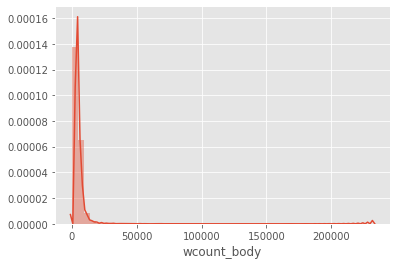

In [52]:
sns.distplot(df['wcount_body']) #plotting word count
df['wcount_body'].describe()

count    27679.000000
mean      1431.322194
std        929.678683
min         12.000000
25%        960.000000
50%       1277.000000
75%       1689.000000
max      30523.000000
Name: wcount_unique, dtype: float64

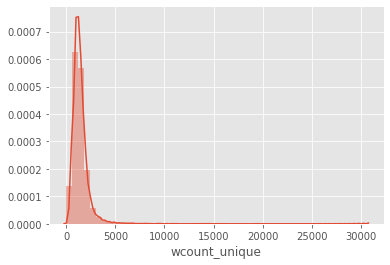

In [54]:
sns.distplot(df['wcount_unique']) #plotting unique word count
df['wcount_unique'].describe()
#from the graphs we can see that most of the papers are 5000 words in length. 

In [55]:
#Vectorization to perform machine learning on text
#using tf-idf to format the data based on every word 
#we will convert a raw document to matrix of tf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [56]:
#Vectorise the data based on body text
text_body = df['processed_text'].values
#Using top 12 features
X = vectorize(text_body, 2 ** 12)
X.shape

(27679, 4096)

In [57]:
#Using Principal Component analusis to reduce the dimensions of vectorized data to speed up the algorithm
#PCA and clustering
from sklearn.decomposition import PCA
#reducing number of dimensions using PCA
pca = PCA(n_components=0.95, random_state=42) # keeping 95% as the variance, random state to split data into train and test
X_reduced_pca= pca.fit_transform(X.toarray())
X_reduced_pca.shape

(27679, 2420)

In [58]:
# Running K means on vectorized text
#Knmeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(X_reduced_pca)
    k_means.fit(X_reduced_pca)
    #Distortions are the sum of squared errors(SSE), we calculate it by elbow method
    distortions.append(sum(np.min(cdist(X_reduced_pca, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

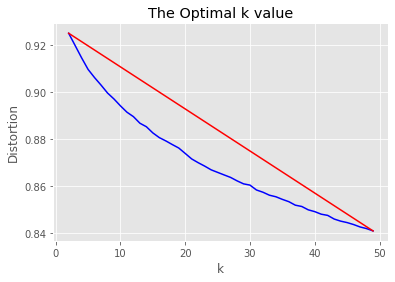

In [59]:
#Plotting the distortions
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Optimal k value')
plt.show()

In [60]:
#K means algorithm with optimal k value, here optimal k value is between 18 to 25 
# we will use k=20 
k = 20 # defining K
kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1) #kmeans model
y_pred = kmeans.fit_predict(X_reduced_pca)
df['y'] = y_pred

In [61]:
df['y']

1053      8
1054      1
1055      6
1056      9
1057     16
         ..
30190     4
30191    10
30192     4
30193     0
30196    18
Name: y, Length: 27679, dtype: int32

In [62]:
#t-distributed stochastic neighbouring entities
#Dimensionality reduction, visualization for high dimensional dataset
#We use TSNE to reduce the dimensions of the data, bring down higher dimensions to 2D, i.e. x-y plane
from sklearn.manifold import TSNE

tsne_data = TSNE(verbose=1, perplexity=100, random_state=42) # computing tsne
X_embedded_data = tsne_data.fit_transform(X.toarray()) #transforming the data in array

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 27679 samples in 13.282s...
[t-SNE] Computed neighbors for 27679 samples in 4111.004s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27679
[t-SNE] Computed conditional probabilities for sample 2000 / 27679
[t-SNE] Computed conditional probabilities for sample 3000 / 27679
[t-SNE] Computed conditional probabilities for sample 4000 / 27679
[t-SNE] Computed conditional probabilities for sample 5000 / 27679
[t-SNE] Computed conditional probabilities for sample 6000 / 27679
[t-SNE] Computed conditional probabilities for sample 7000 / 27679
[t-SNE] Computed conditional probabilities for sample 8000 / 27679
[t-SNE] Computed conditional probabilities for sample 9000 / 27679
[t-SNE] Computed conditional probabilities for sample 10000 / 27679
[t-SNE] Computed conditional probabilities for sample 11000 / 27679
[t-SNE] Computed conditional probabilities for sample 12000 / 27679
[t-SNE] Computed conditional probabilities fo

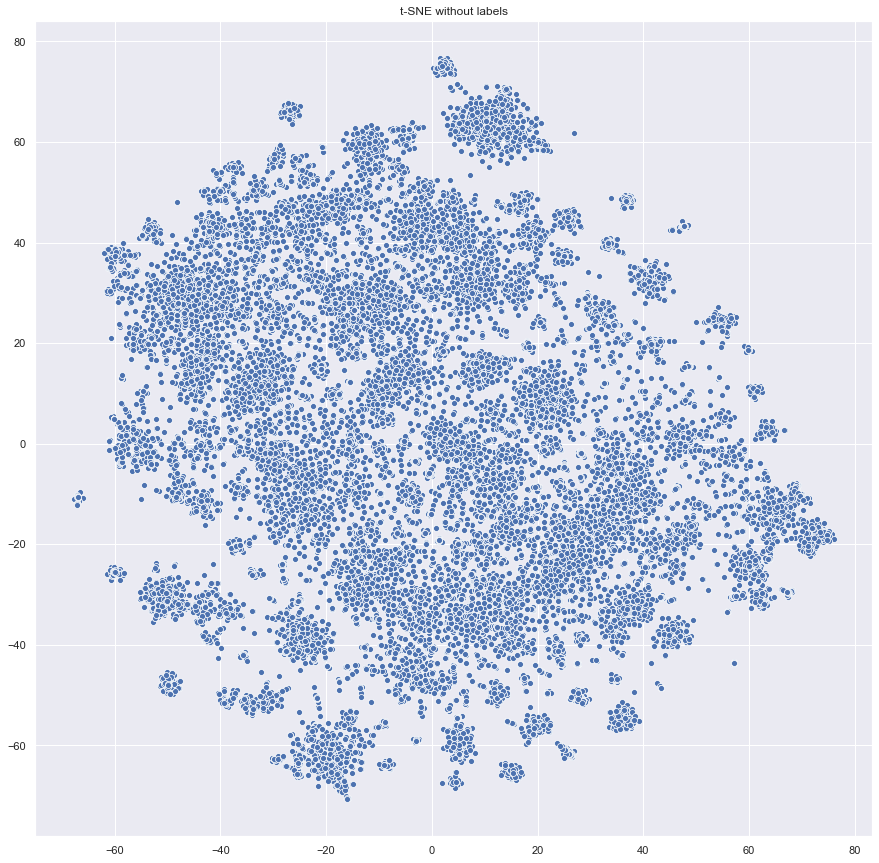

In [63]:
#PLotting data using matplotlib and seaborn
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings for the plot
sns.set(rc={'figure.figsize':(15,15)})

# colors for the plot
palette = sns.color_palette("bright", 1)

# plotting t-sne
sns.scatterplot(X_embedded_data[:,0], X_embedded_data[:,1], palette=palette)
plt.title('t-SNE without labels')
#saving plot on the disk
plt.savefig("D:/ITM Sem 2/Data Mining/Project/Plots/t-sne.png")
#displaying the plot
plt.show() #displaying the plot without labels 

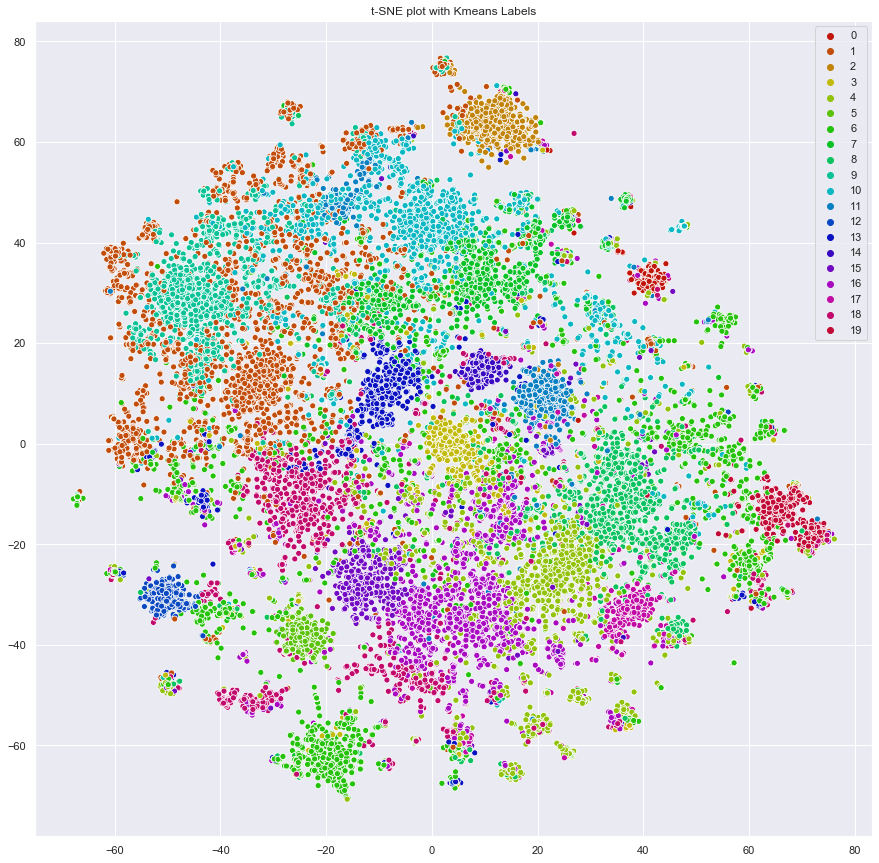

In [66]:
#Plotting data using matplot and seaborn modules
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings for the plot
sns.set(rc={'figure.figsize':(15, 15)})

# different colors for the plot
palette = sns.hls_palette(20, l=.4, s=.9)

# plottin the plot with different colors and labels
sns.scatterplot(X_embedded_data[:,0], X_embedded_data[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE plot with Kmeans Labels')
#saving plot on the disk
plt.savefig("D:/ITM Sem 2/Data Mining/Project/Plots/cluster_tsne.png")
#displaying the plot
plt.show()

In [67]:
#Topic modelling using LDA
#Defining topic for each cluster
#Feature extraction to extract features supported by ML algorithms from datasets containing texts and images
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
vectorizer_text = []

#Creating 20 vectorizers that will serve as topics for each labels
for i in range(0, 20):
    # Creating  vectorizer i.e creating topics, conversting collection of text documents into token counts
    vectorizer_text.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [69]:
vectorizer_text[0]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

In [70]:
vectorizer_text[1]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

In [73]:
#To vectorize the data in each from each cluster
vectorized_data = []

for current_cluster_data, cvec in enumerate(vectorizer_text):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster_data, 'processed_text']))
    except Exception as e:
        print("There are not much instances in cluster: " + str(current_cluster_data))
        vectorized_data.append(None)

In [74]:
#20 topics are created
len(vectorized_data)

20

In [75]:
# number of topics per cluster
PER_CLUSTER_TOPICS = 20

model_lda = []
for i in range(0, 20):
    # Latent Dirichlet Allocation Model - creating lables for the topics
    lda = LatentDirichletAllocation(n_components=PER_CLUSTER_TOPICS, max_iter=10, learning_method='online',verbose=False, random_state=42)
    model_lda.append(lda)


In [79]:
#Fitting all the LDA models to with respect to vectors
clusters_lda_data = []

for current_cluster_data, lda in enumerate(model_lda):
     #print("Current Cluster data: " + str(current_cluster_data))
    
    if vectorized_data[current_cluster_data] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster_data])))

In [87]:
#Extracting keywords for each cluster
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer_text, top_n=3):
    current_text = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer_text.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_text:
                keywords.append(word)
                current_text.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [88]:
#Appending all the keywords in all_keywords array
all_keywords = []
for current_vectorizer, lda in enumerate(model_lda):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizer_text[current_vectorizer]))

In [89]:
all_keywords[0][:10]

['patient',
 'sample',
 'hcov-emc',
 'nsp',
 'sars-cov',
 'genotype',
 'genome',
 'sars',
 'sas',
 'codon']

In [90]:
len(all_keywords)

20

In [93]:
#Saving the output on a location on the disk
f=open('D:/ITM Sem 2/Data Mining/Project/Topics/topics.txt','w')

count = 0

for ii in all_keywords:

    if vectorized_data[count] != None:
        f.write(', '.join(ii) + "\n")
    else:
        f.write("Not enough instances to be determined. \n")
        f.write(', '.join(ii) + "\n")
    count += 1

f.close()

In [95]:
#Converting to byte stream and storing data on the disk
import pickle

# save COVID-19 Data on the disk
pickle.dump(df, open("D:/ITM Sem 2/Data Mining/Project/Saving_files/df_covid.p", "wb" ))

# save t-SNE at a location on disk
pickle.dump(X_embedded_data, open("D:/ITM Sem 2/Data Mining/Project/Saving_files/X_embedded.p", "wb" ))

# save labels generated with k-means(20)
pickle.dump(y_pred, open("D:/ITM Sem 2/Data Mining/Project/Saving_files/y_pred.p", "wb" ))

In [104]:
#The data is now labeled. We will use classification algorithm to check accuracy of the classification
# function to print out classification model report
def classification_test(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
        
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")

In [105]:
#Bifurcating testing data and training data 
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train data size:", len(X_train)) #training size
print("X_test data size:", len(X_test), "\n") #testing size

X_train data size: 22143
X_test data size: 5536 



In [106]:
#Classification based on Stochastic Gradient Descent
#Importing modules for SGD classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD model building
sgd_classification = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=-1)
# training SGD data
sgd_classification.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_classification, X_train, y_train, cv=3, n_jobs=-1)

# print out the classification report
classification_test("Stochastic Gradient Descent Values for (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Values for (Training Set) :

Accuracy Score:  90.629 %
     Precision:  91.620 %
        Recall:  91.590 %


In [108]:
# cross validation predictions reports
sgd_pred = cross_val_predict(sgd_classification, X_test, y_test, cv=3, n_jobs=-1)

# print out the classification report
classification_test("Stochastic Gradient Descent Values for (Testing Set)", y_test, sgd_pred)

Stochastic Gradient Descent Values for (Training Set) :

Accuracy Score:  86.976 %
     Precision:  89.712 %
        Recall:  88.423 %


In [109]:
sgd_cv_score = cross_val_score(sgd_classification, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

Mean cv Score - SGD: 91.117 %
